In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
%matplotlib inline

In [2]:
proc = pd.read_csv('data/procedures.csv')
phy = pd.read_csv('data/physicians.csv')

In [3]:
phy['Cardiologist'] = pd.get_dummies(phy.specialty)['Cardiology']

In [4]:
phy.columns = ['physician_id','specialty','Cardiologist']

In [5]:
merged = pd.merge(proc, phy, left_on='physician_id',right_on='physician_id',how='outer')
indices=[]
for i,proc in enumerate(merged.procedure):
    w=[]
    w.append(proc.replace('_', ' '))
    if 'typically' in w[0].split():
        indices.append(i)

In [6]:
merged_not_typically = merged.drop(merged.index[list(indices)])
merged_not_typically = merged_not_typically.reset_index()
merged_not_typically.drop('index',axis=1,inplace=True)

In [7]:
merged_not_typically_no_un = merged_not_typically[merged_not_typically.specialty!='Unknown']

In [8]:
merged_not_typically_no_un.specialty.value_counts().head()

Cardiology              129897
Diagnostic Radiology     39139
Internal Medicine        22057
Family Practice          18463
Orthopedic Surgery        7406
Name: specialty, dtype: int64

In [9]:
d={}
for i,proc in enumerate(merged_not_typically_no_un.procedure_code):
    if proc not in d.keys():
        d[proc] = [merged_not_typically_no_un.specialty.iloc[i]]
    if proc in d.keys():
        d[proc].append(merged_not_typically_no_un.specialty.iloc[i])
        

In [10]:
len(d)

2908

In [11]:
d['99238']

['Family Practice',
 'Family Practice',
 'Pulmonary Disease',
 'Internal Medicine',
 'Cardiology',
 'Internal Medicine',
 'Internal Medicine',
 'Internal Medicine',
 'Internal Medicine',
 'Cardiology',
 'Internal Medicine',
 'Cardiology',
 'Cardiology',
 'Cardiology',
 'Internal Medicine',
 'Cardiology',
 'Cardiology',
 'Psychiatry',
 'Cardiology',
 'Cardiology',
 'Cardiology',
 'Cardiology',
 'Cardiology',
 'Internal Medicine',
 'Cardiology',
 'Cardiology',
 'Family Practice',
 'Cardiology',
 'Psychiatry',
 'Internal Medicine',
 'Cardiology',
 'Cardiology',
 'Cardiology',
 'Hematology/Oncology',
 'Cardiology',
 'Internal Medicine',
 'Internal Medicine',
 'Internal Medicine',
 'Psychiatry',
 'Cardiology',
 'Internal Medicine',
 'Gastroenterology',
 'Internal Medicine',
 'Psychiatry',
 'Cardiology',
 'Internal Medicine',
 'Cardiology',
 'Cardiology',
 'Family Practice',
 'Internal Medicine',
 'Internal Medicine',
 'Cardiology',
 'General Surgery',
 'Cardiology',
 'Cardiology',
 'Family 

In [12]:
merged_not_typically_only_un = merged_not_typically[merged_not_typically.specialty=='Unknown']

In [13]:
merged_not_typically_only_un.reset_index(drop=True, inplace=True)

In [14]:
merged_not_typically_only_un.specialty.value_counts()

Unknown    128501
Name: specialty, dtype: int64

In [15]:
some_uns = merged_not_typically_only_un.physician_id.unique()[:50]

In [16]:
merged_not_typically_only_un.head(10)

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
0,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14,Unknown,0
1,11,00142,anesthesia_for_lens_surgery,29,Unknown,0
2,11,00400,"anesthesia_for_procedure_on_skin_of_arms,_legs...",18,Unknown,0
3,11,00520,anesthesia_for_closed_procedure_in_chest,16,Unknown,0
4,11,00740,anesthesia_for_procedure_on_gastrointestinal_t...,14,Unknown,0
5,11,00810,anesthesia_for_procedure_on_lower_intestine_us...,39,Unknown,0
6,11,00910,anesthesia_for_procedure_on_urinary_system_inc...,33,Unknown,0
7,11,01214,anesthesia_for_open_total_hip_joint_replacement,11,Unknown,0
8,11,01402,anesthesia_for_open_or_endoscopic_total_knee_j...,16,Unknown,0
9,11,01630,anesthesia_for_open_or_endoscopic_procedure_at...,16,Unknown,0


In [17]:
merged_not_typically_only_un[merged_not_typically_only_un.physician_id==11]

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
1,11,00142,anesthesia_for_lens_surgery,29,Unknown,0
2,11,00400,"anesthesia_for_procedure_on_skin_of_arms,_legs...",18,Unknown,0
3,11,00520,anesthesia_for_closed_procedure_in_chest,16,Unknown,0
4,11,00740,anesthesia_for_procedure_on_gastrointestinal_t...,14,Unknown,0
5,11,00810,anesthesia_for_procedure_on_lower_intestine_us...,39,Unknown,0
6,11,00910,anesthesia_for_procedure_on_urinary_system_inc...,33,Unknown,0
7,11,01214,anesthesia_for_open_total_hip_joint_replacement,11,Unknown,0
8,11,01402,anesthesia_for_open_or_endoscopic_total_knee_j...,16,Unknown,0
9,11,01630,anesthesia_for_open_or_endoscopic_procedure_at...,16,Unknown,0
10,11,64415,"injection_of_anesthetic_agent,_brachial_(arm)_...",21,Unknown,0


In [18]:
some_uns

array([  1,  11,  13,  16,  17,  22,  32,  33,  34,  35,  37,  46,  48,
        49,  51,  54,  55,  58,  66,  74,  77,  81,  82,  84,  85,  87,
        88,  96, 101, 109, 111, 114, 115, 119, 120, 123, 126, 132, 143,
       146, 147, 148, 150, 153, 161, 163, 168, 169, 171, 172], dtype=int64)

In [19]:
for un in some_uns:
    print(un,'Doc with id ', merged_not_typically_only_un.physician_id.unique()[un], \
          'has performed ',Counter(d[merged_not_typically_only_un.procedure_code.unique()[un]]).most_common()[:3],\
         'since his procedures codes include: ', \
          merged_not_typically_only_un[merged_not_typically_only_un.physician_id==un]['procedure_code'])
    

1 Doc with id  11 has performed  [('Anesthesiology', 347), ('Pain Management', 2), ('Critical Care (Intensivists)', 1)] since his procedures codes include:  0    76942
Name: procedure_code, dtype: object
11 Doc with id  46 has performed  [('Anesthesiology', 34), ('Pain Management', 3), ('Internal Medicine', 2)] since his procedures codes include:  1     00142
2     00400
3     00520
4     00740
5     00810
6     00910
7     01214
8     01402
9     01630
10    64415
11    64445
12    64447
13    64450
14    76942
Name: procedure_code, dtype: object
13 Doc with id  49 has performed  [('Anesthesiology', 51), ('Physical Medicine and Rehabilitation', 4), ('Internal Medicine', 3)] since his procedures codes include:  15    92004
16    92012
17    92133
Name: procedure_code, dtype: object
16 Doc with id  55 has performed  [('Ophthalmology', 370)] since his procedures codes include:  18    66821
19    66984
20    76514
21    83861
22    92002
23    92004
24    92012
25    92014
26    92060
27 

101 Doc with id  373 has performed  [('Cardiology', 3082), ('Cardiac Electrophysiology', 61), ('Internal Medicine', 13)] since his procedures codes include:  282    33228
283    33282
284    85610
285    92928
286    93000
287    93010
288    93227
289    93280
290    93306
291    93458
292    93460
293    93880
294    93924
Name: procedure_code, dtype: object
109 Doc with id  403 has performed  [('Otolaryngology', 173), ('Ophthalmology', 4), ('Allergy/Immunology', 2)] since his procedures codes include:  295    78452
296    85610
297    93000
298    93010
299    93015
300    93225
301    93227
302    93306
303    93306
304    99238
305    A9502
306    J2785
Name: procedure_code, dtype: object
111 Doc with id  407 has performed  [('Otolaryngology', 6)] since his procedures codes include:  307    0296T
308    0298T
309    92960
310    93000
311    93010
312    93015
313    93016
314    93018
315    93225
316    93227
317    93280
318    93288
319    93289
320    93306
321    93306
322  

This is a great way to validate our centrality estimation.

### Degree Centrality: 
The number of ties that a node has.
### In-Degree : 
Count of the number of ties directed to the node.
### Out-Degree : 
Count of the number of ties a node directs to other nodes

Our procedure codes have a very high in-degree and our specialties have a very high out-degree since we're assuming a directed graph that points from a specialty to a procedure

In [20]:
procs = merged_not_typically.specialty.value_counts()

In [21]:
procs_no_un = procs.index.drop('Unknown')

In [22]:
d1= {}
for i in range(len(procs_no_un)):
    if procs_no_un[i] not in d1.keys():
        d1[procs_no_un[i]]= list(merged_not_typically[merged_not_typically.specialty==procs_no_un[i]]['procedure_code'].unique())

In [23]:
g = nx.DiGraph(d1)

In [24]:
g.number_of_edges()

10366

In [25]:
g.number_of_nodes()

2978

In [26]:
nx.degree_centrality(g)

{'Cardiology': 0.29761504870675176,
 'Diagnostic Radiology': 0.19617064158548875,
 'Internal Medicine': 0.26200873362445415,
 'Family Practice': 0.21330198186093383,
 'Orthopedic Surgery': 0.1390661740006718,
 'Ophthalmology': 0.07490762512596573,
 'Anesthesiology': 0.10077258985555929,
 'Emergency Medicine': 0.09069533087000335,
 'Hematology/Oncology': 0.09271078266711454,
 'Dermatology': 0.06214309707759489,
 'Pathology': 0.04769902586496473,
 'Urology': 0.08330534094726234,
 'Gastroenterology': 0.05811219348337252,
 'Pulmonary Disease': 0.06751763520322472,
 'Obstetrics/Gynecology': 0.07557944239166946,
 'Otolaryngology': 0.06382264024185422,
 'Neurology': 0.0987571380584481,
 'Radiation Oncology': 0.04501175680214981,
 'General Surgery': 0.13268390997648638,
 'Nephrology': 0.06415854887470608,
 'Physical Medicine and Rehabilitation': 0.07759489418878066,
 'Vascular Surgery': 0.06516627477326167,
 'Rheumatology': 0.06751763520322472,
 'Cardiac Electrophysiology': 0.04299630500503863

Cardiology, Internal Medicine, Family Practice and Diagnostic Radiology - all have the high Degree Centralities because they have the highest number of node connections in this dataset.

In [27]:
g.neighbors('Cardiology')

['36247',
 '75625',
 '75716',
 '78492',
 '92920',
 '93000',
 '93015',
 '93306',
 '93458',
 '93880',
 '93923',
 '93924',
 '93925',
 '93965',
 '93970',
 'A9555',
 'J0280',
 'J1245',
 'Q9967',
 '36415',
 '78452',
 '85610',
 '93010',
 '93016',
 '93018',
 '93228',
 '93308',
 '93312',
 '93320',
 '93321',
 '93325',
 '93350',
 '93351',
 '93922',
 '93978',
 '96374',
 'A9500',
 'A9502',
 'J2785',
 '33208',
 '92928',
 '92960',
 '93225',
 '93227',
 '93270',
 '93272',
 '93459',
 '93567',
 '99238',
 '99291',
 '93279',
 '93280',
 '93293',
 '93294',
 '99239',
 'G0250',
 '93288',
 '93460',
 '71020',
 '93224',
 '93971',
 'J7050',
 '93296',
 '33228',
 '93041',
 '93283',
 '93284',
 '93295',
 '80053',
 '80061',
 '83880',
 '93268',
 '93281',
 '99495',
 '93282',
 'J0151',
 '36475',
 '93042',
 '93454',
 '93784',
 '99236',
 '80048',
 '84443',
 '85025',
 '93226',
 '99217',
 'G0180',
 'A9505',
 '92941',
 'Q9957',
 '76970',
 '93976',
 '93979',
 '99283',
 '36223',
 '36225',
 '36245',
 '93290',
 '93297',
 '93307',


In [28]:
g.neighbors('00142')

[]

So it seems that our Directed Graph cannot calculate the neighbours for a node with no outdegree(i.e a procedure_code where a bunch of specialties point to it, but that procedure_code itself doesnt point to anything)

Let's make an undirected Graph of the same dictionary and see how it fares.

In [29]:
undirected_g = nx.Graph(d1)

In [30]:
undirected_g.neighbors('00142')

['Anesthesiology', 'Pain Management', 'Critical Care (Intensivists)']

Some promising results. These results are extremely similar to the ones we have derived as a result of a Counter

Let's try another example

In [31]:
undirected_g.neighbors('92250')

['Internal Medicine', 'Family Practice', 'Ophthalmology', 'Neurology']

In [32]:
undirected_g.neighbors('76942')

['Cardiology',
 'Diagnostic Radiology',
 'Internal Medicine',
 'Family Practice',
 'Orthopedic Surgery',
 'Anesthesiology',
 'Emergency Medicine',
 'Urology',
 'Gastroenterology',
 'Otolaryngology',
 'Neurology',
 'Radiation Oncology',
 'General Surgery',
 'Nephrology',
 'Physical Medicine and Rehabilitation',
 'Vascular Surgery',
 'Rheumatology',
 'Endocrinology',
 'General Practice',
 'Interventional Pain Management',
 'Interventional Radiology',
 'Pain Management',
 'Hand Surgery',
 'Pediatric Medicine',
 'Surgical Oncology',
 'Sports Medicine',
 'Physician Assistant']

In [33]:
dee={}
for un in some_uns:
    for proc in merged_not_typically_only_un[merged_not_typically_only_un.physician_id==un]['procedure_code'].values:
        if un not in dee.keys():
            dee[un] = undirected_g.neighbors(proc)
        if un in dee.keys():
            dee[un] += undirected_g.neighbors(proc)

In [34]:
dee

{1: ['Cardiology',
  'Diagnostic Radiology',
  'Internal Medicine',
  'Family Practice',
  'Orthopedic Surgery',
  'Anesthesiology',
  'Emergency Medicine',
  'Urology',
  'Gastroenterology',
  'Otolaryngology',
  'Neurology',
  'Radiation Oncology',
  'General Surgery',
  'Nephrology',
  'Physical Medicine and Rehabilitation',
  'Vascular Surgery',
  'Rheumatology',
  'Endocrinology',
  'General Practice',
  'Interventional Pain Management',
  'Interventional Radiology',
  'Pain Management',
  'Hand Surgery',
  'Pediatric Medicine',
  'Surgical Oncology',
  'Sports Medicine',
  'Physician Assistant',
  'Cardiology',
  'Diagnostic Radiology',
  'Internal Medicine',
  'Family Practice',
  'Orthopedic Surgery',
  'Anesthesiology',
  'Emergency Medicine',
  'Urology',
  'Gastroenterology',
  'Otolaryngology',
  'Neurology',
  'Radiation Oncology',
  'General Surgery',
  'Nephrology',
  'Physical Medicine and Rehabilitation',
  'Vascular Surgery',
  'Rheumatology',
  'Endocrinology',
  'Ge

C:\Users\Yash\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


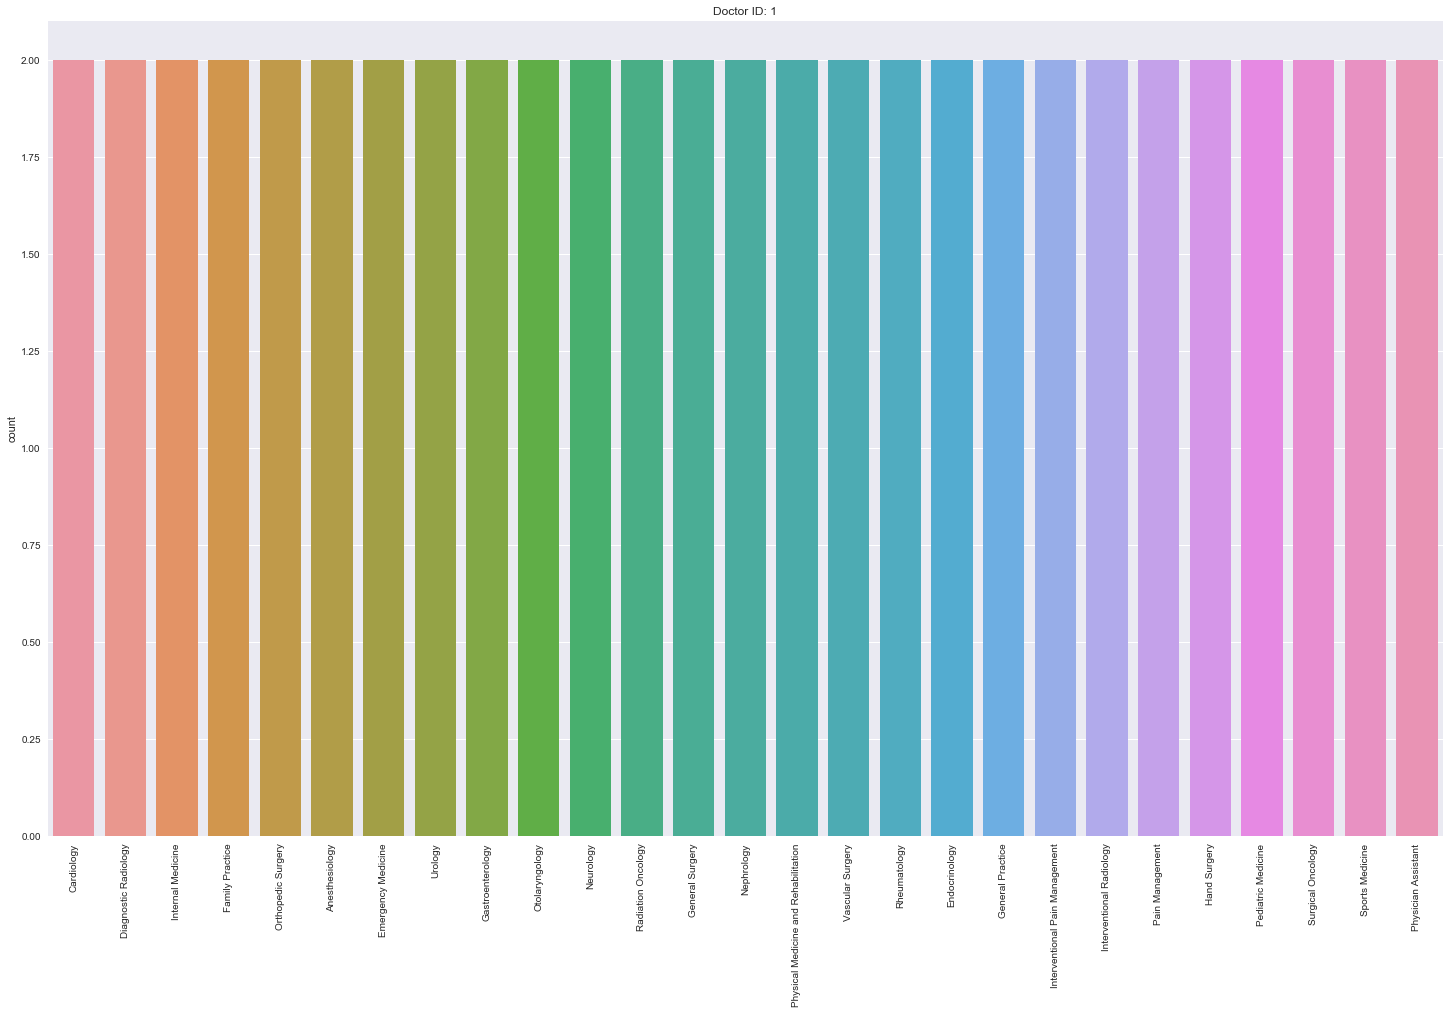

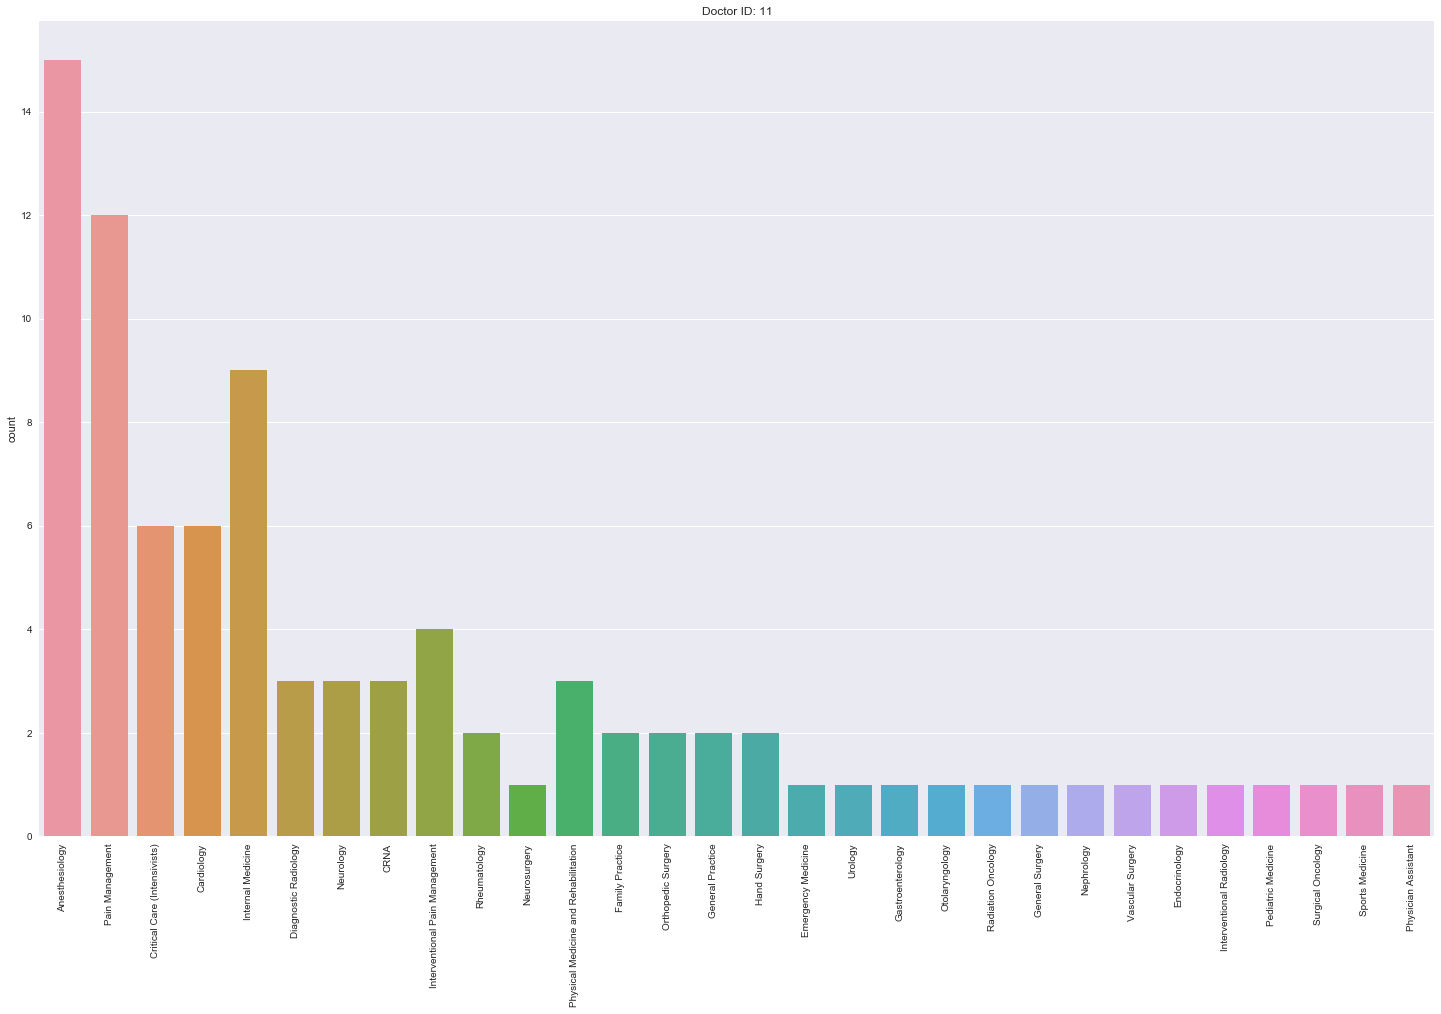

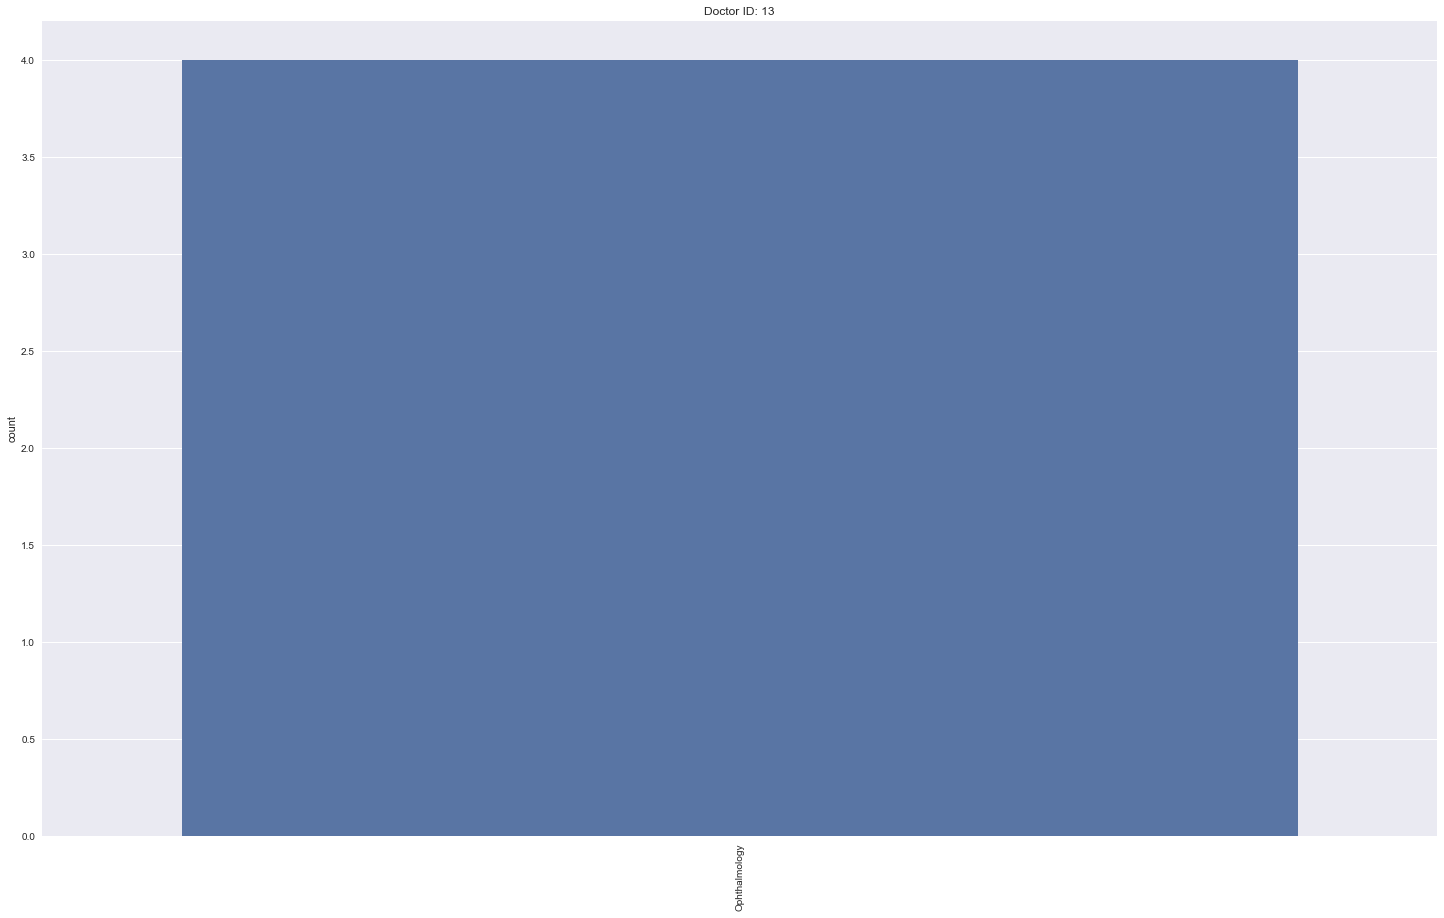

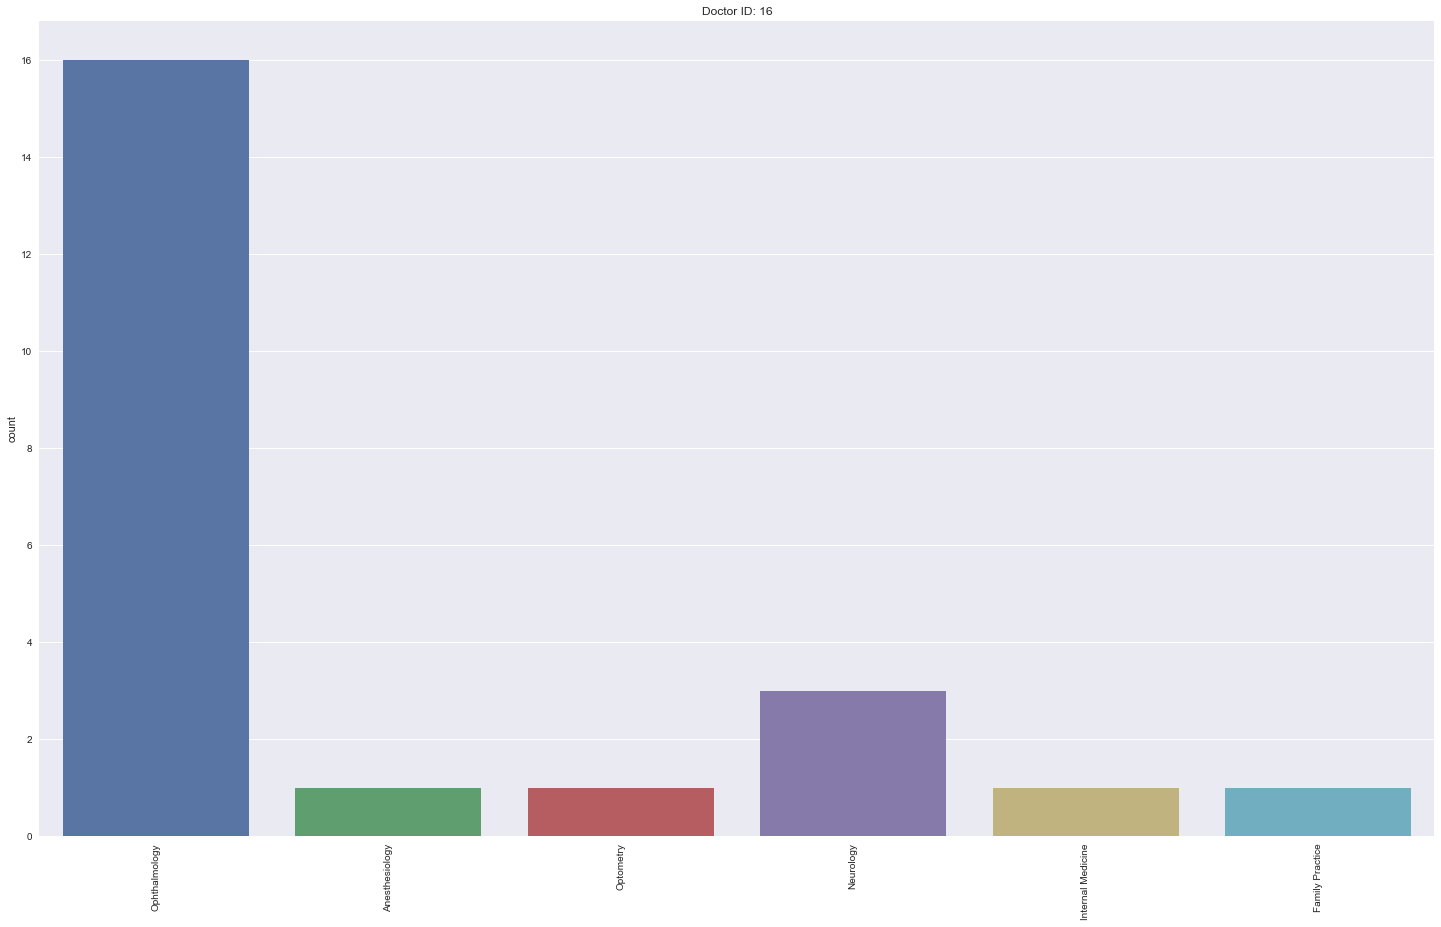

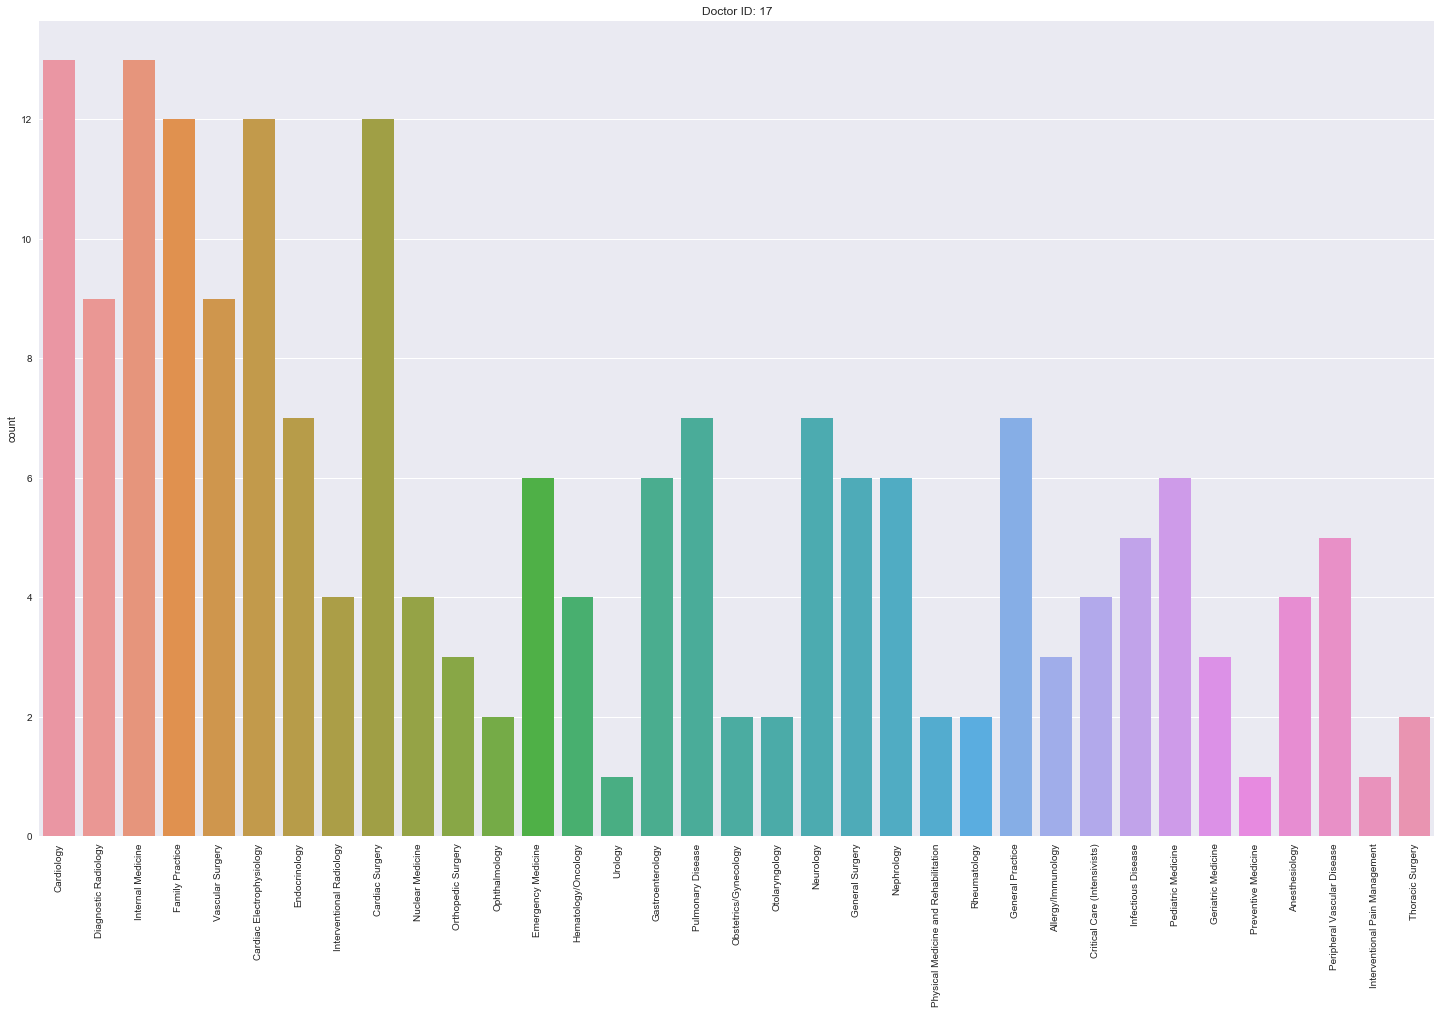

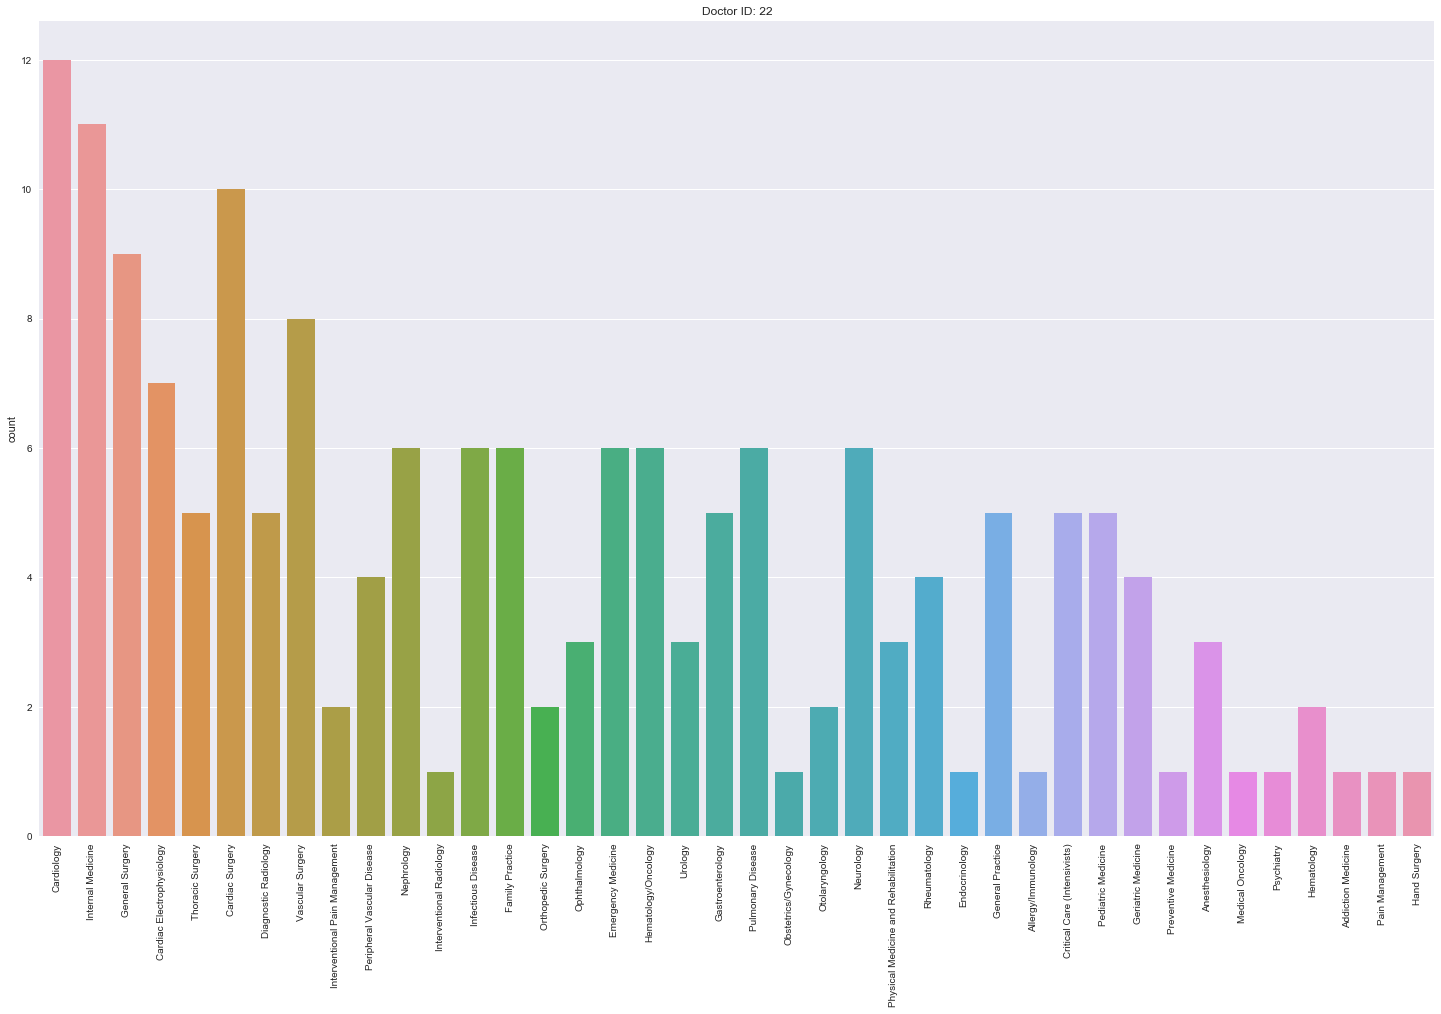

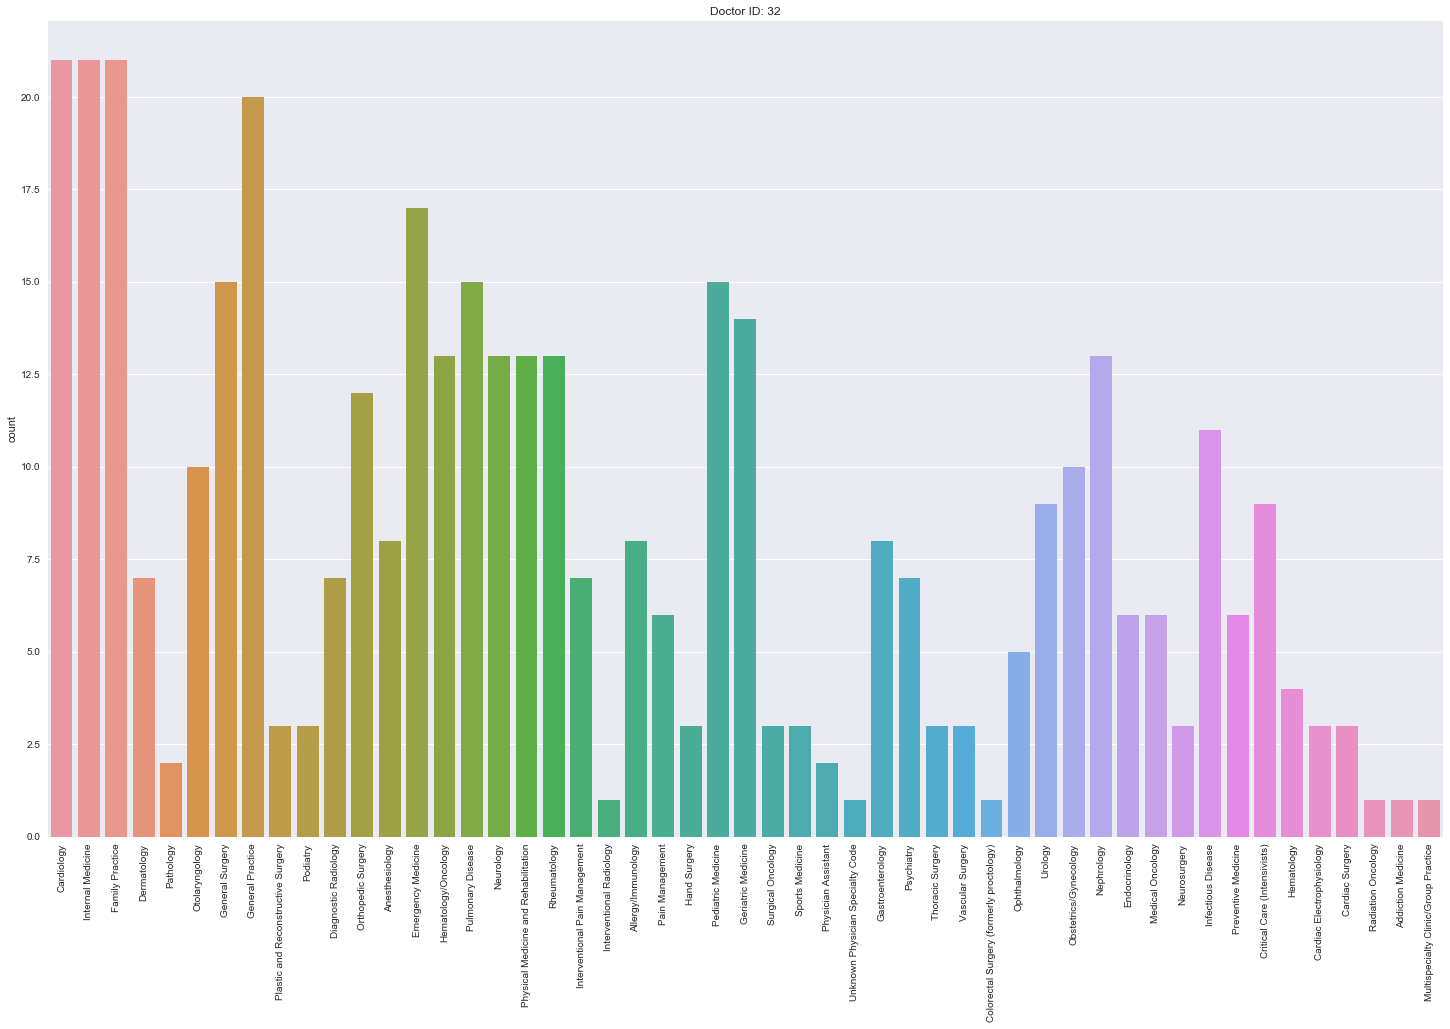

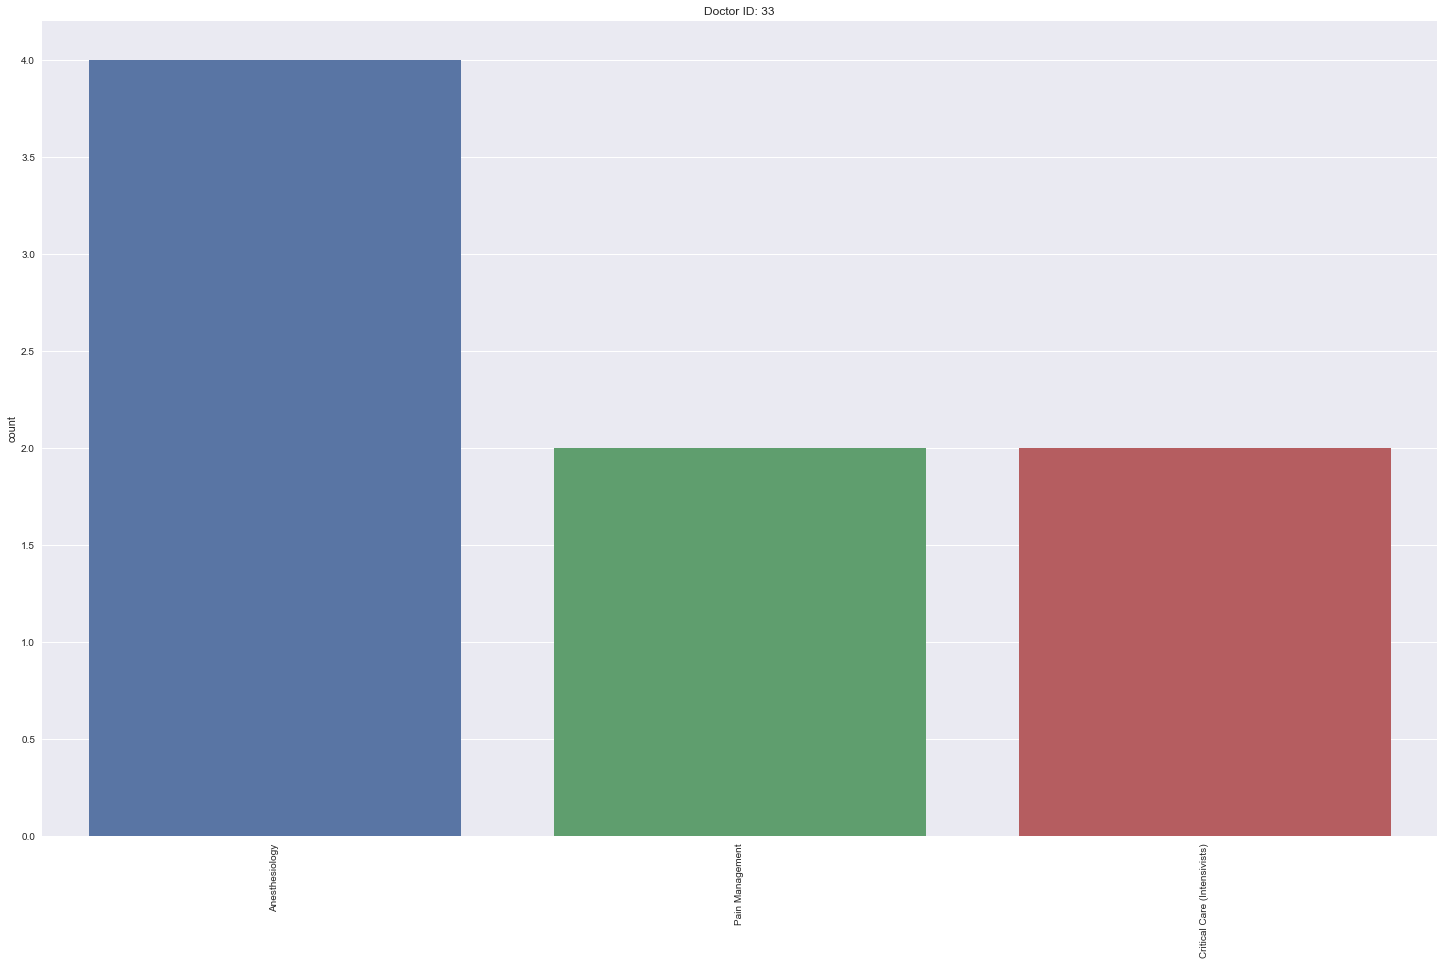

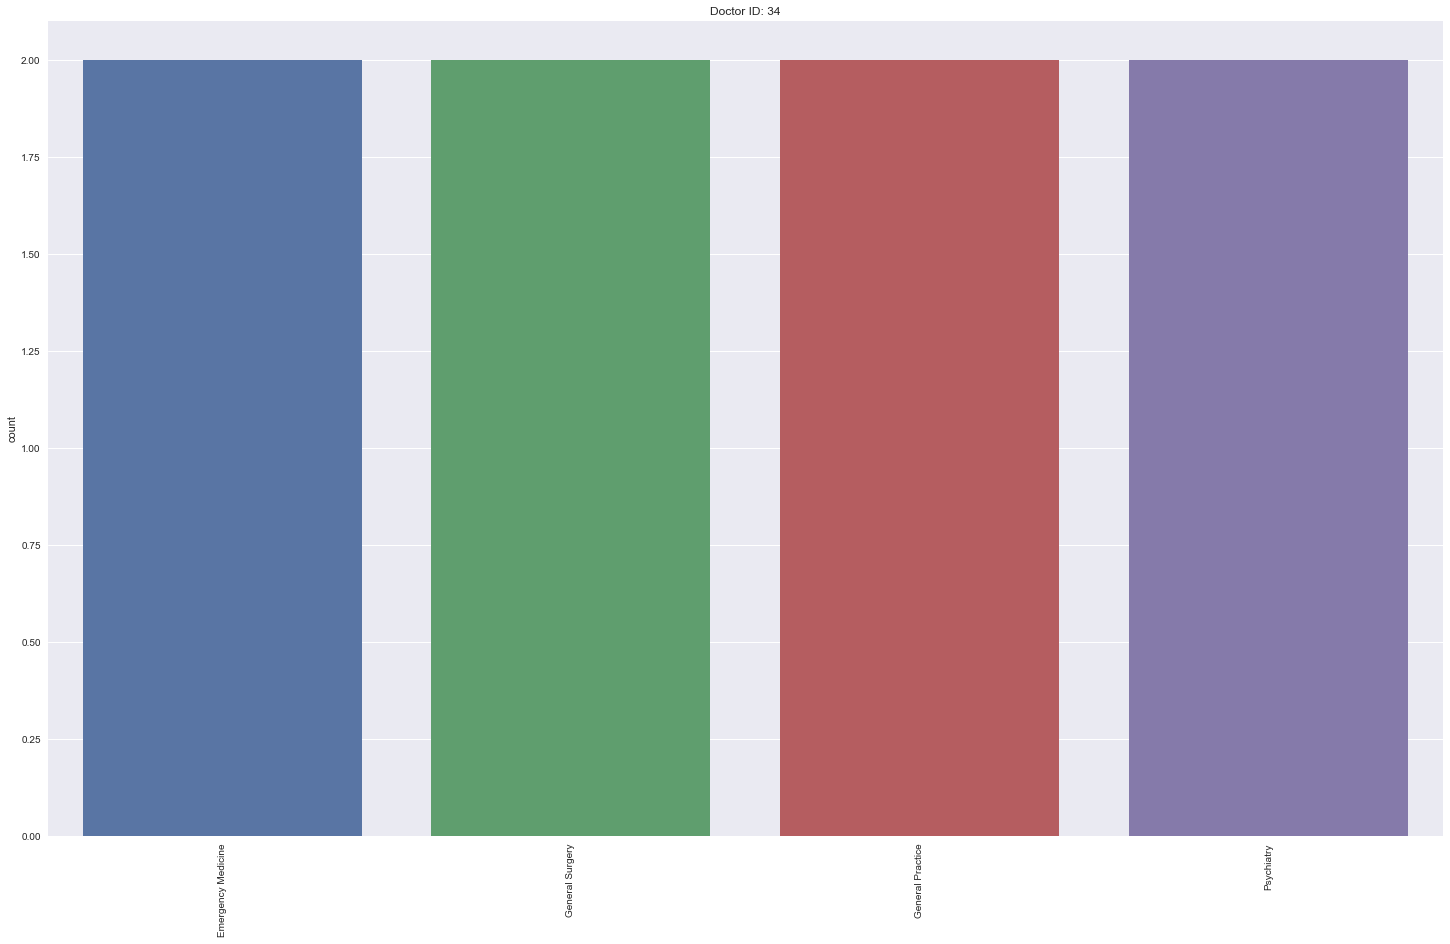

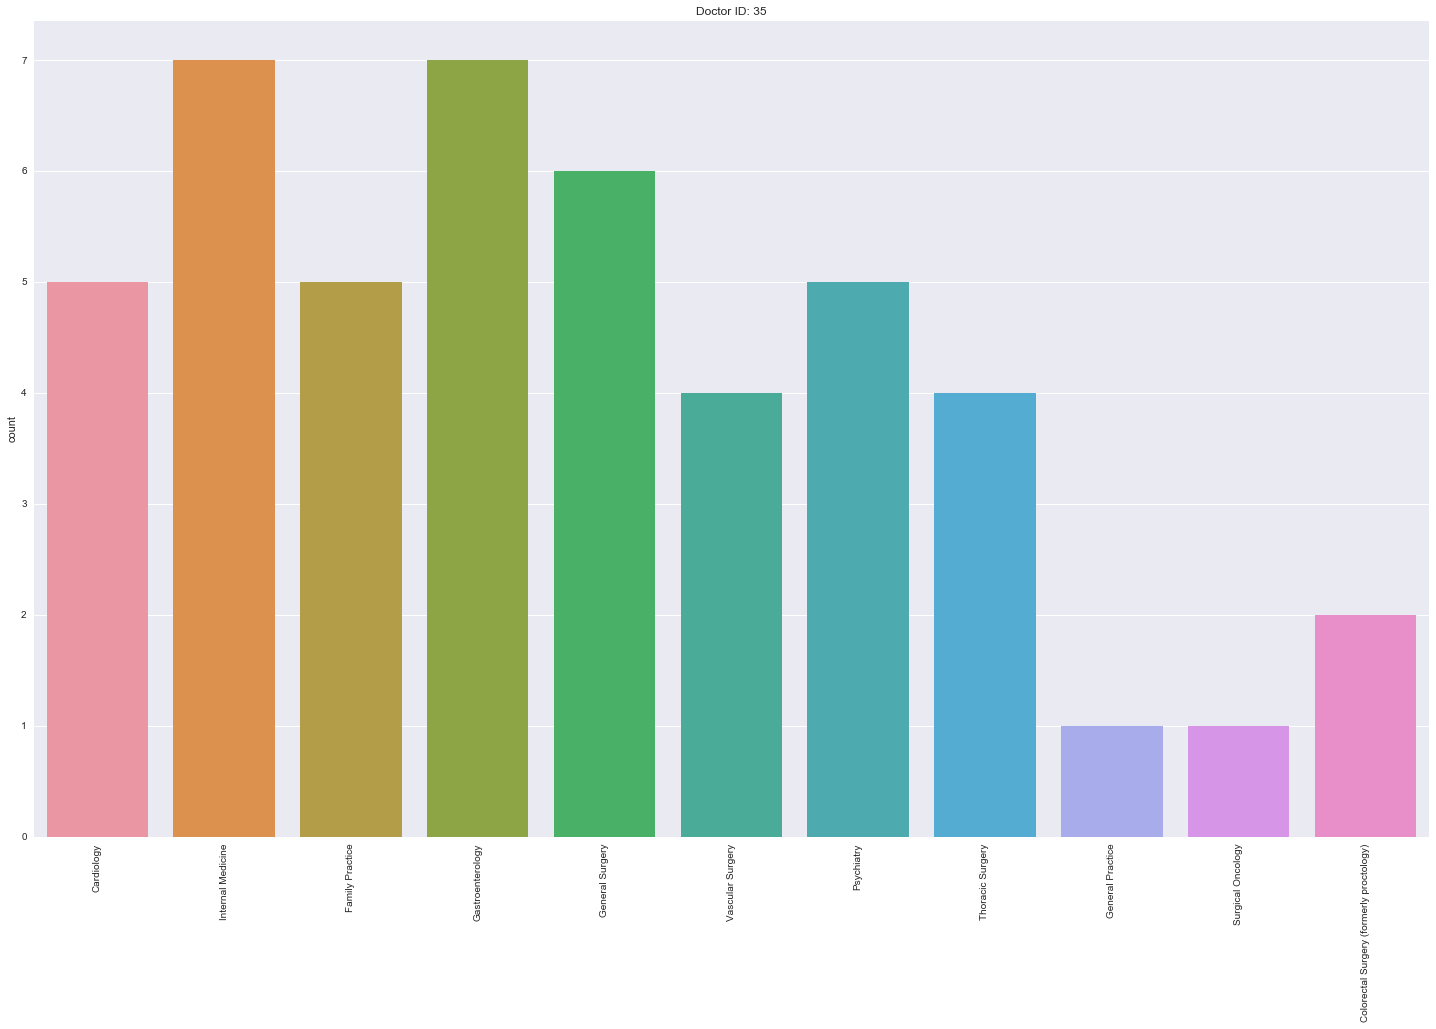

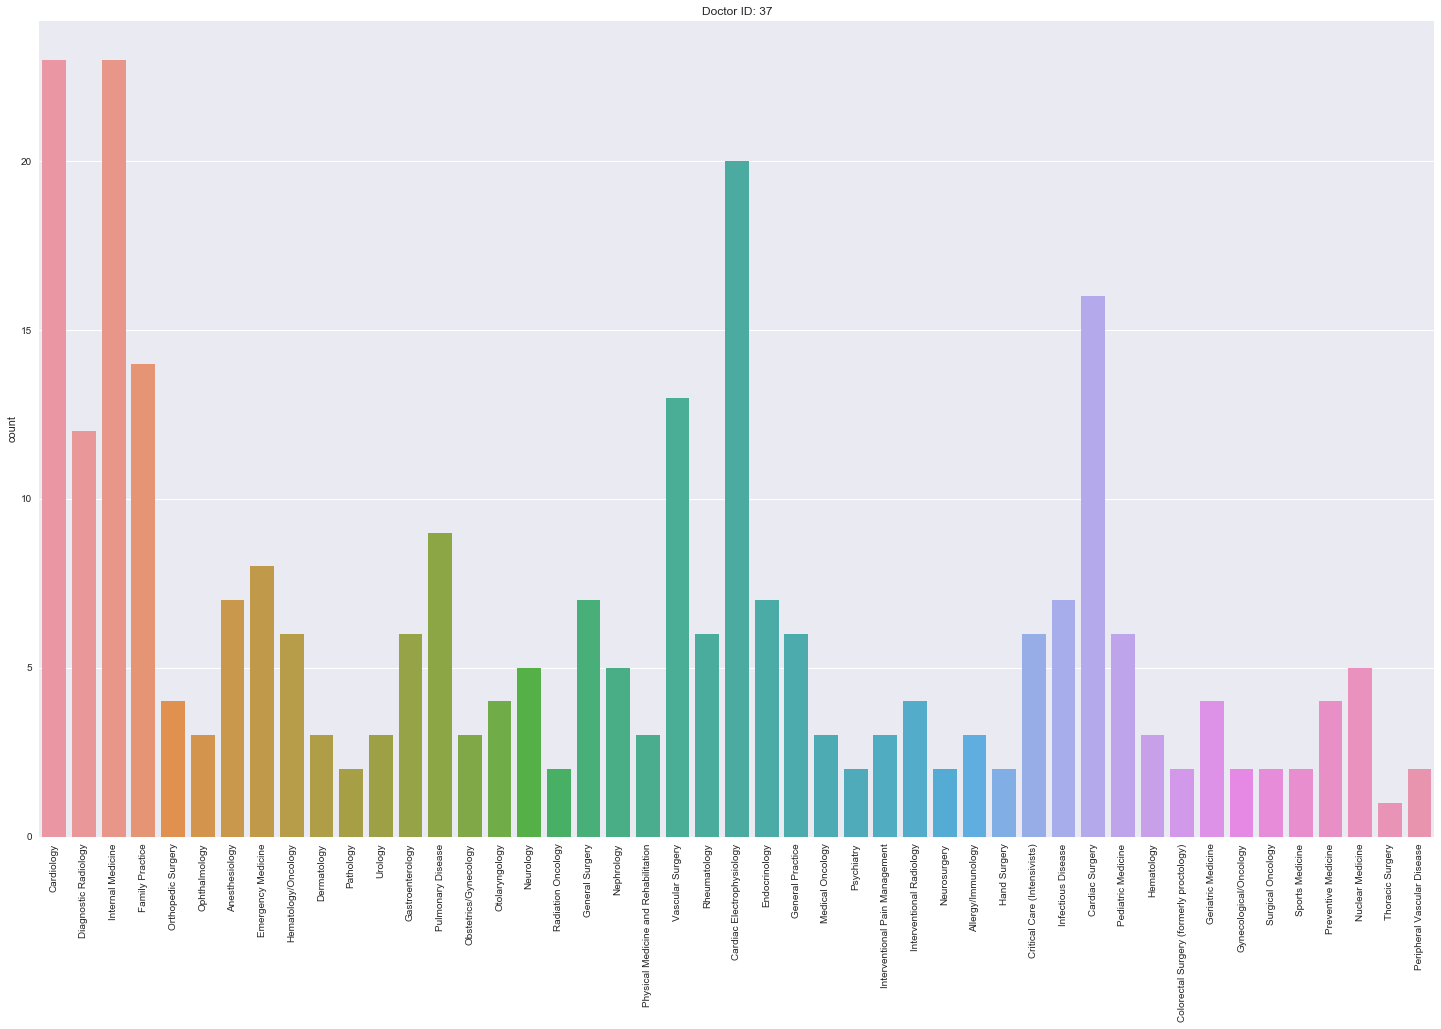

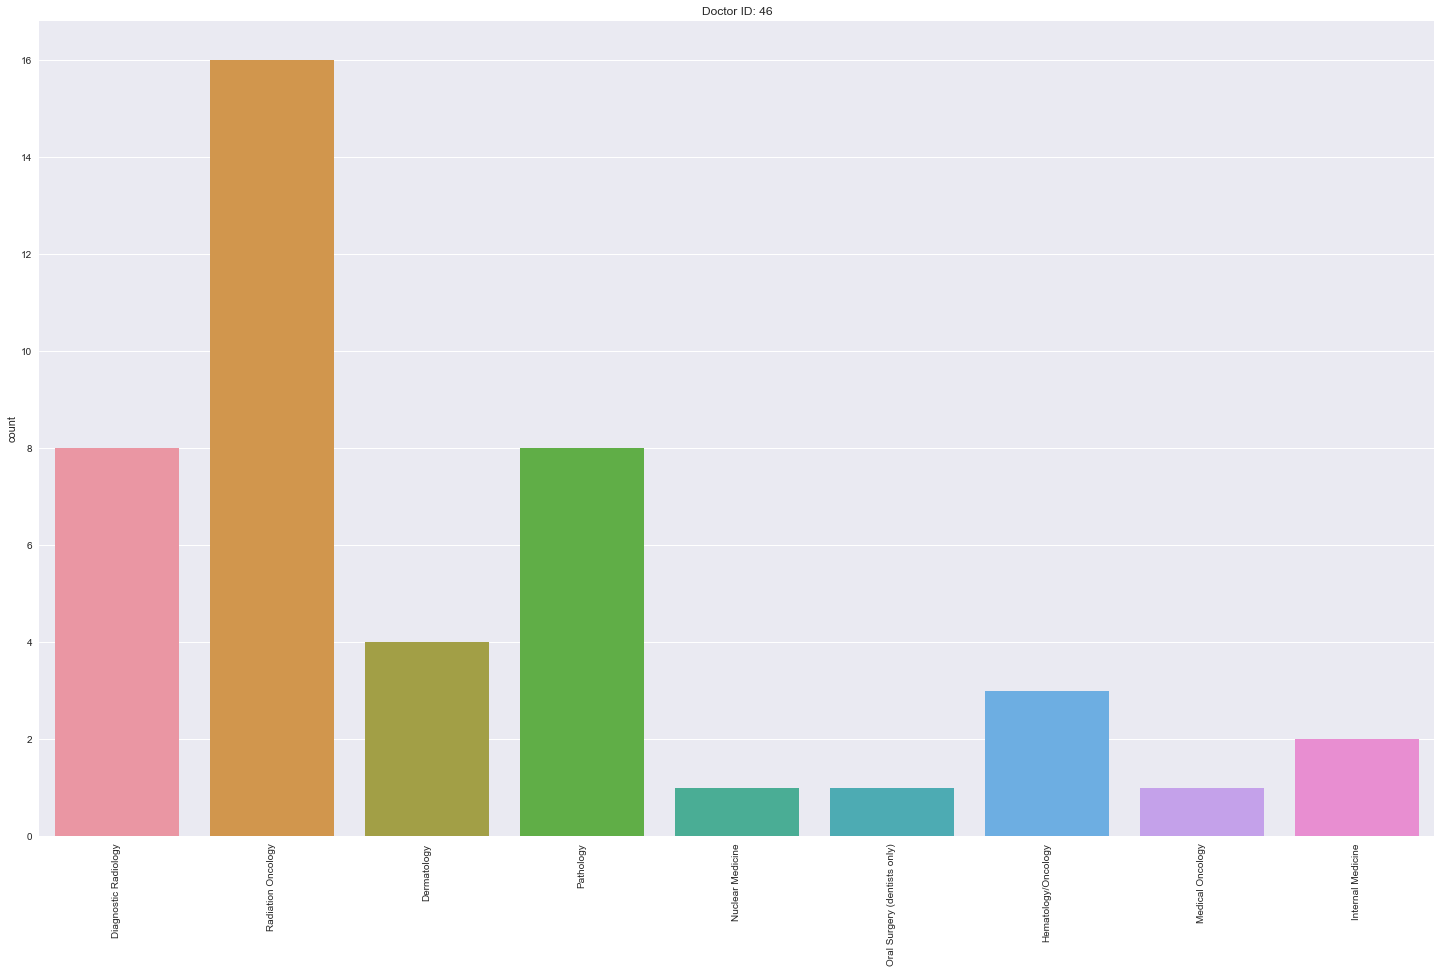

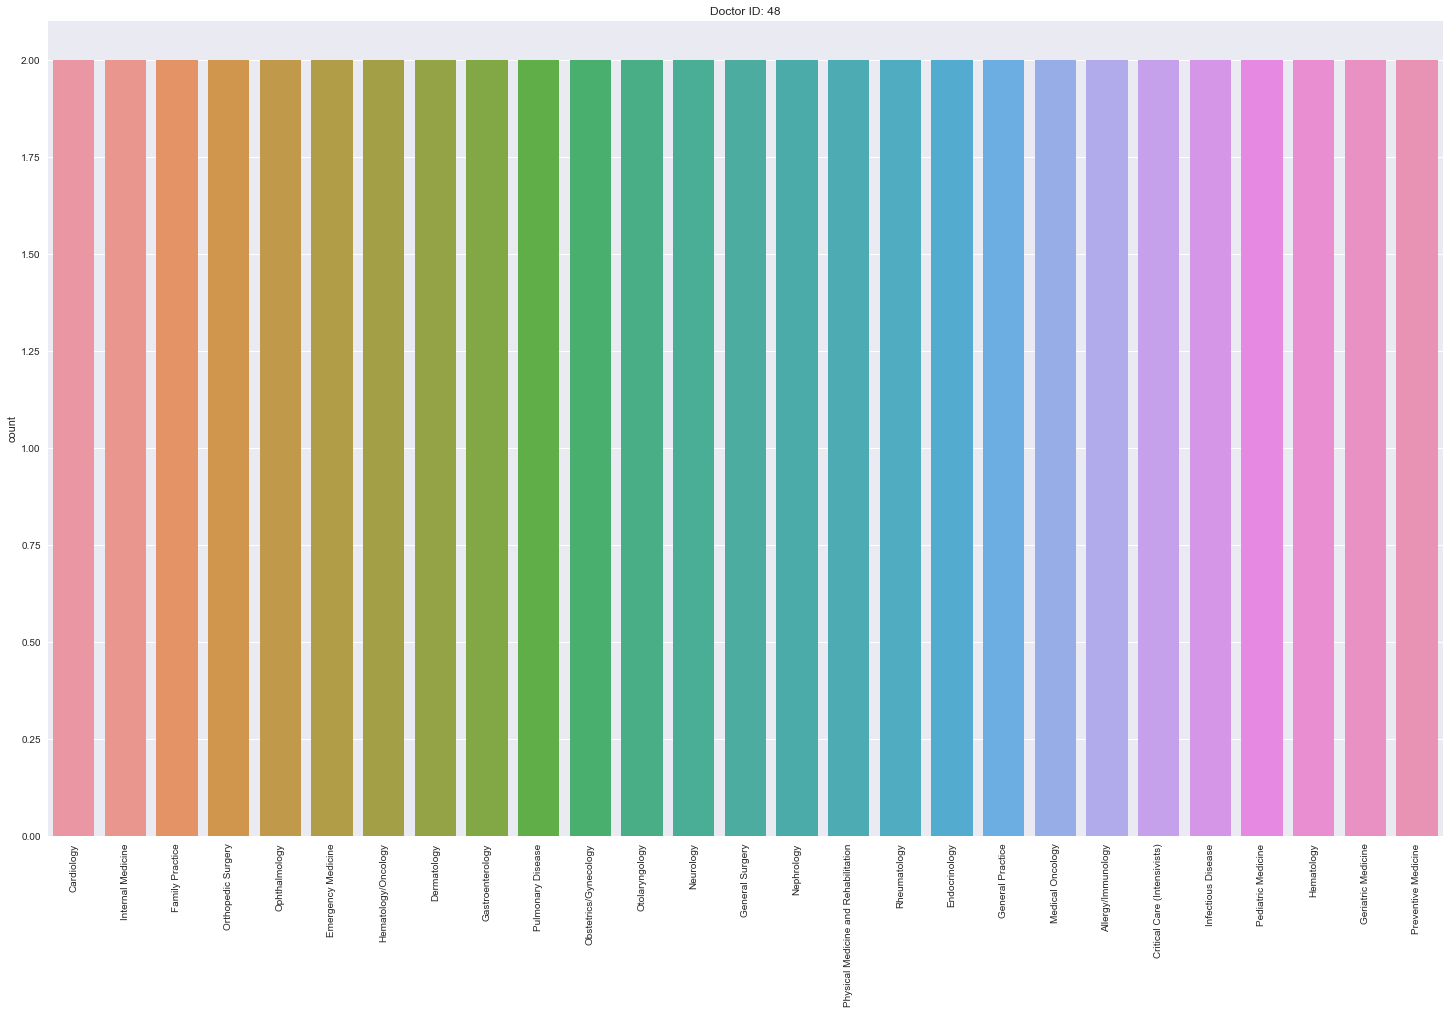

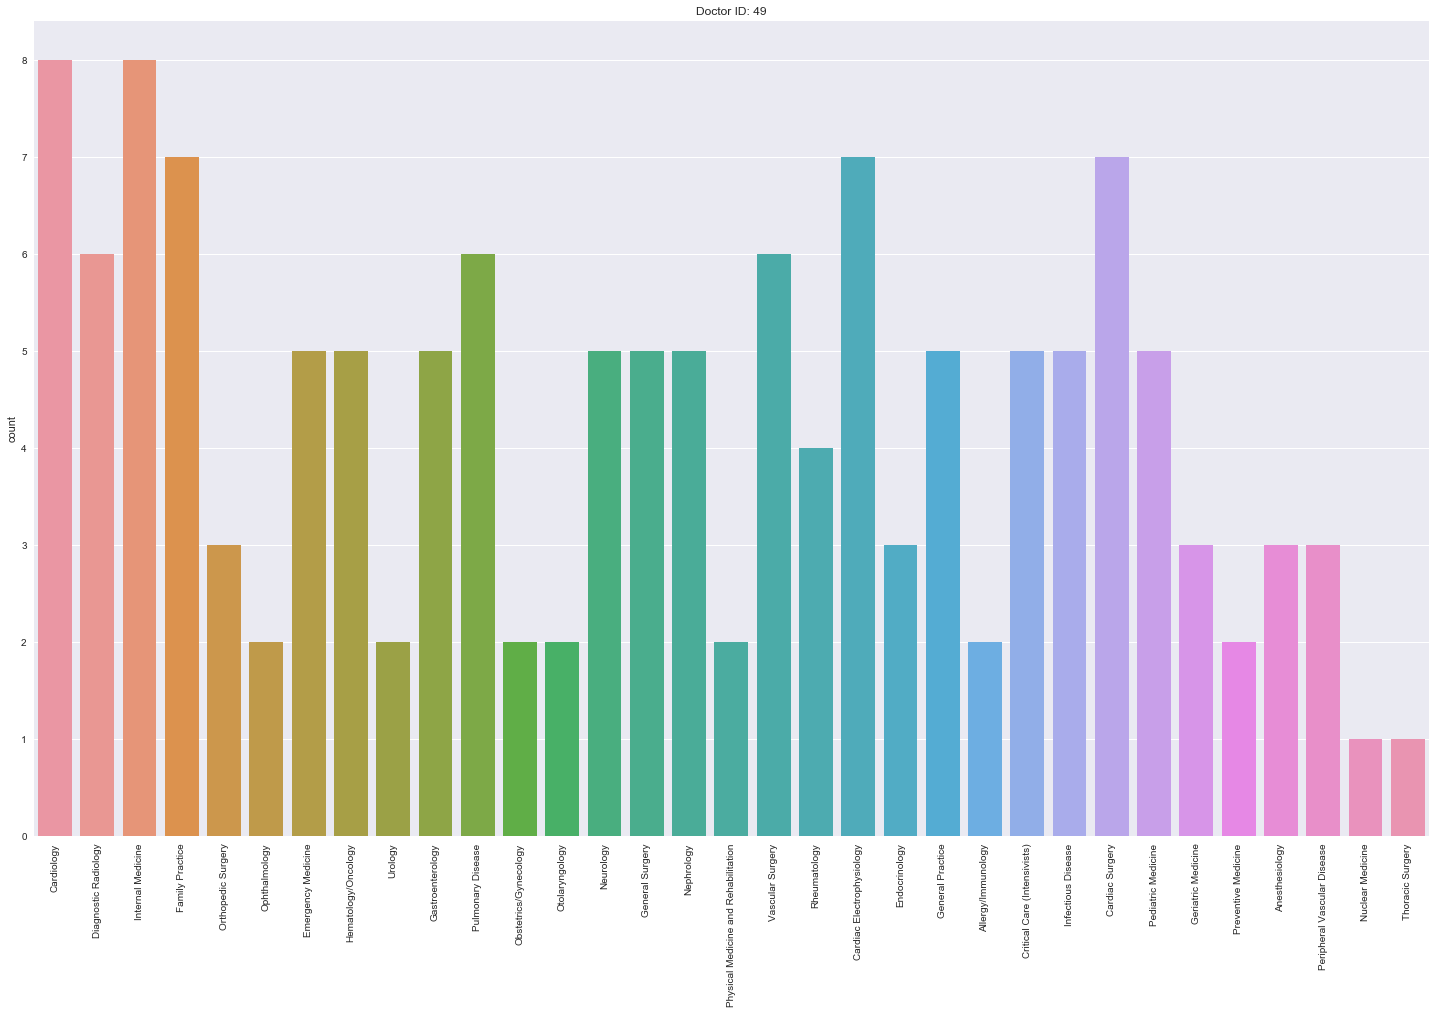

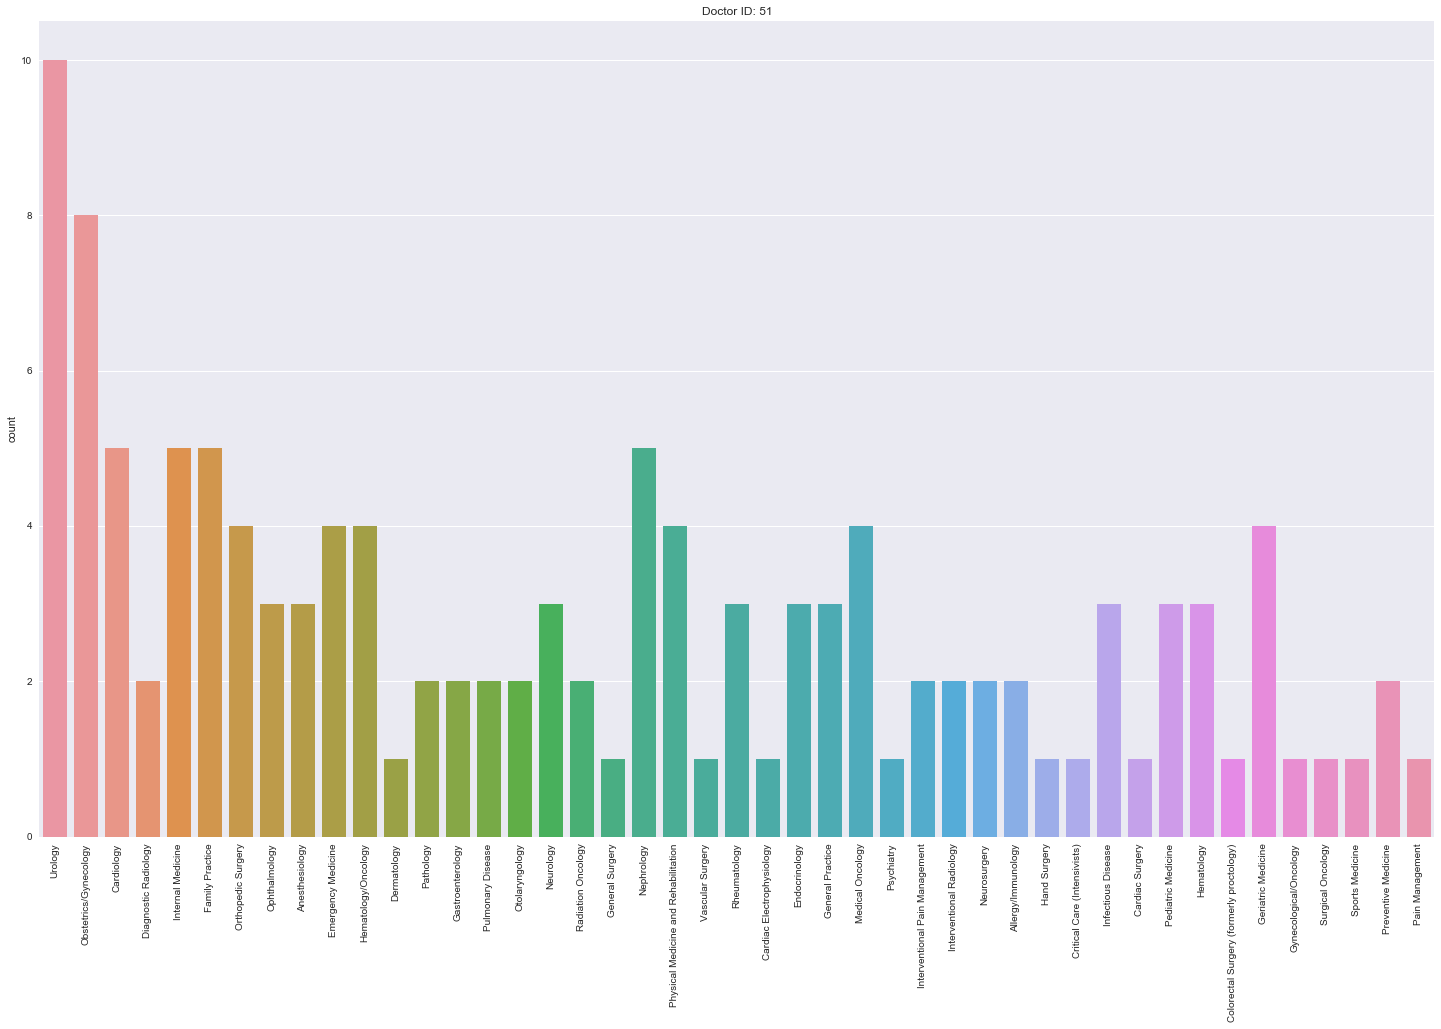

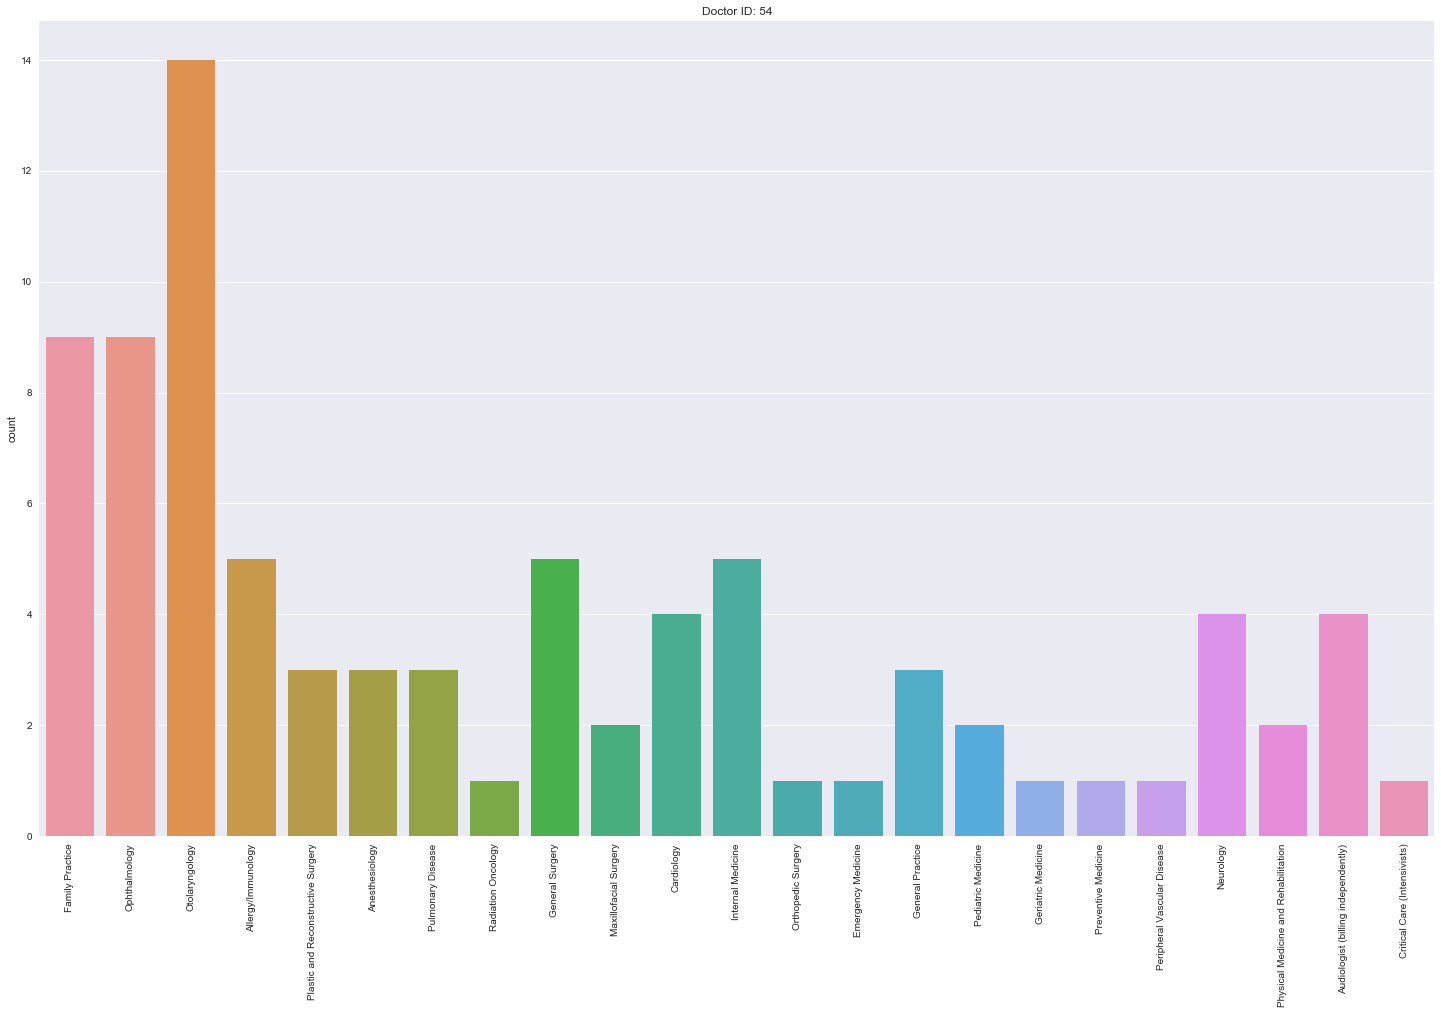

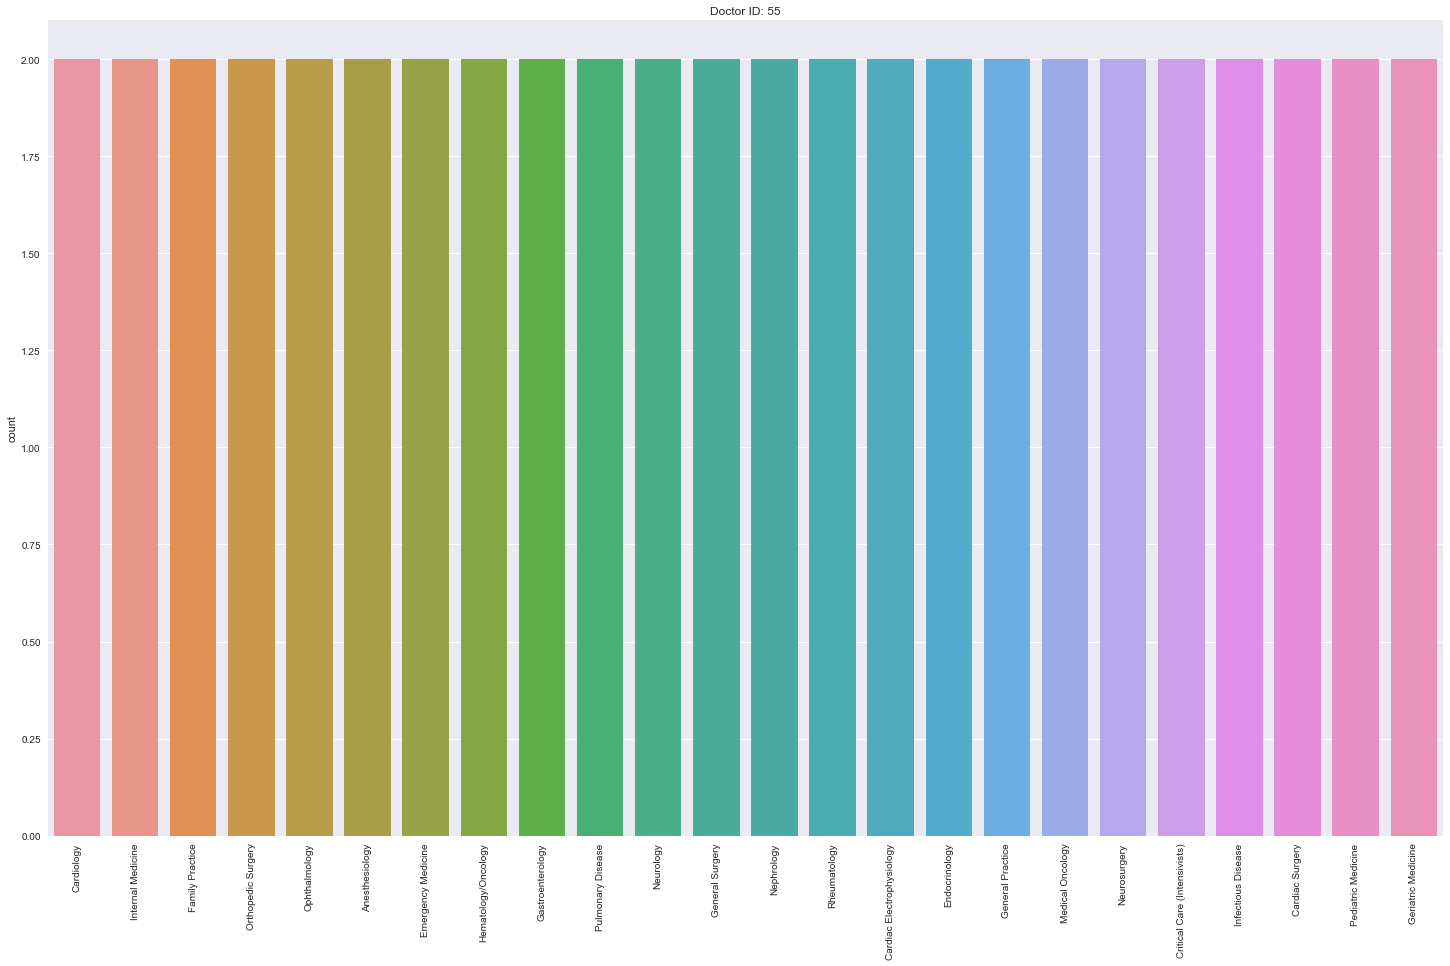

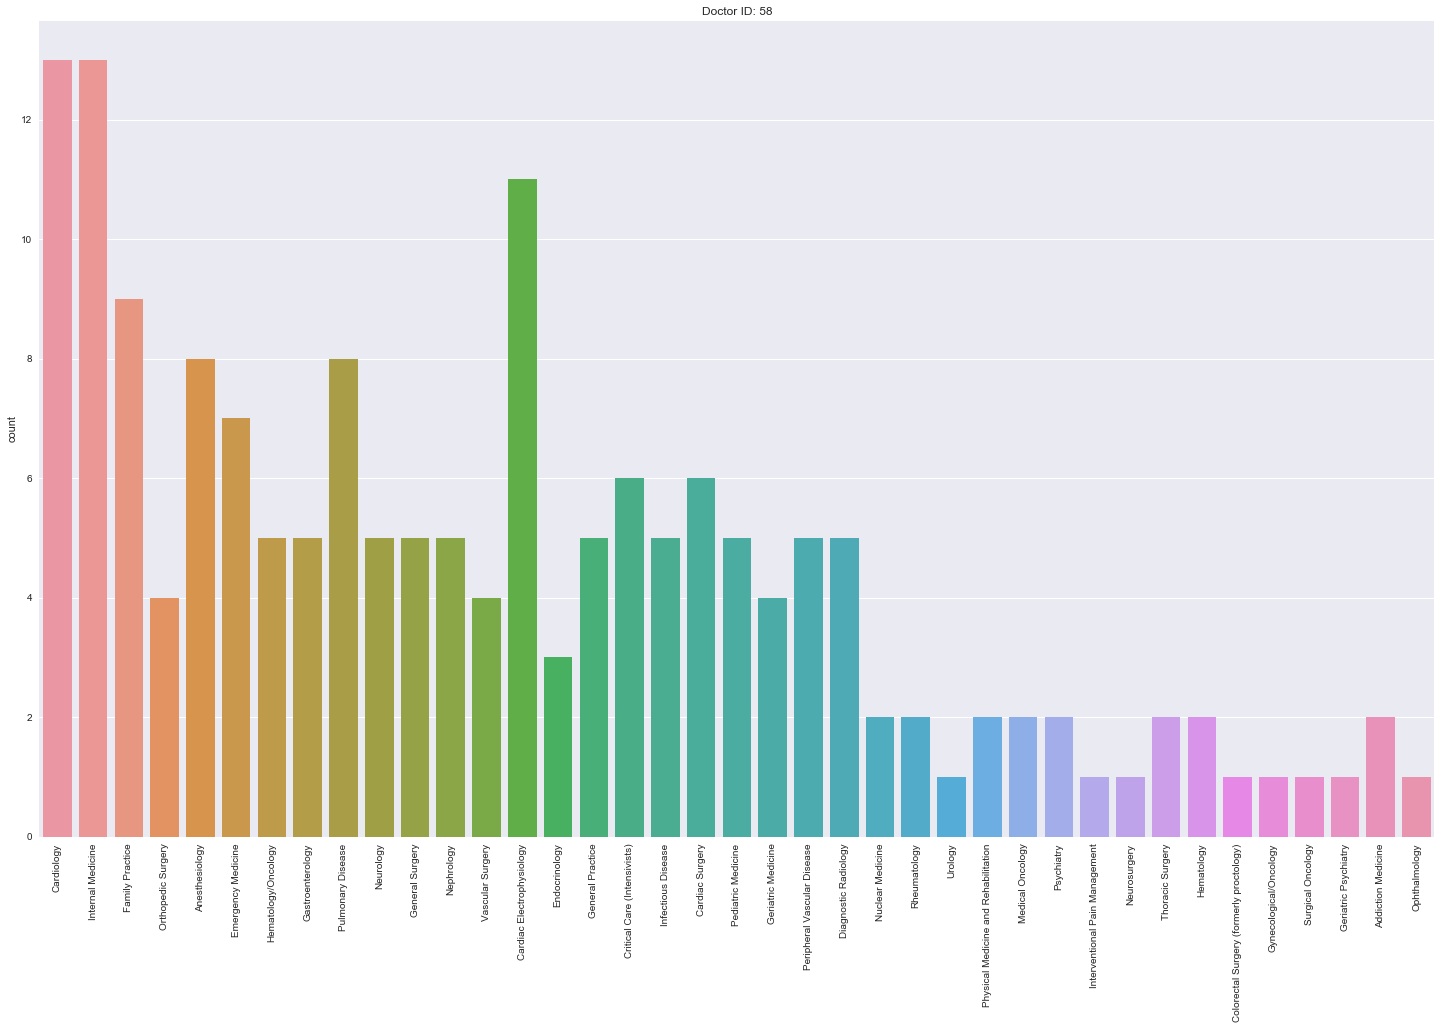

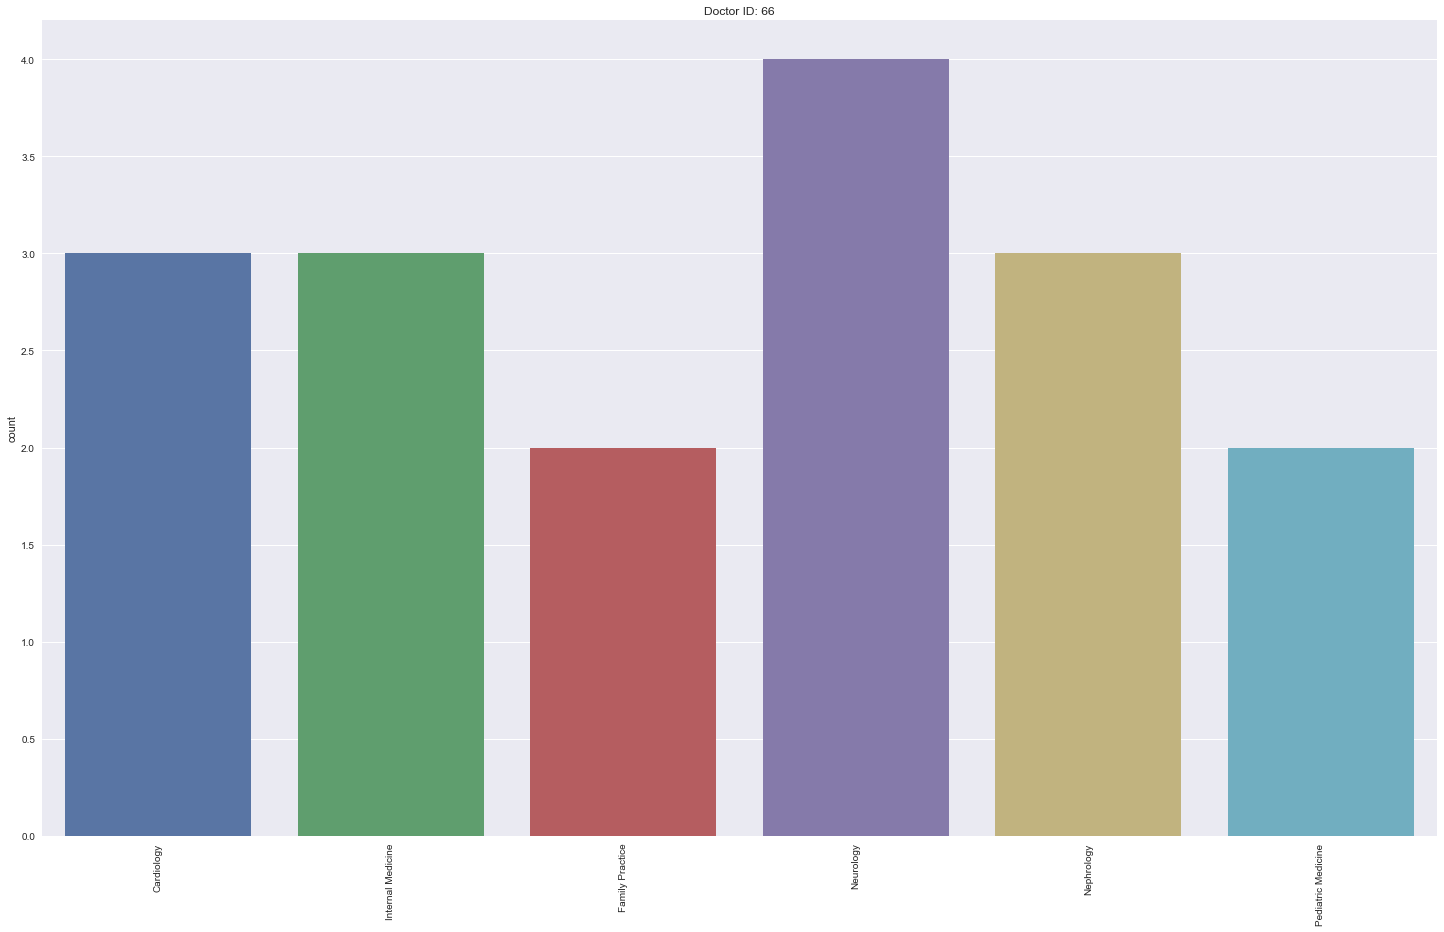

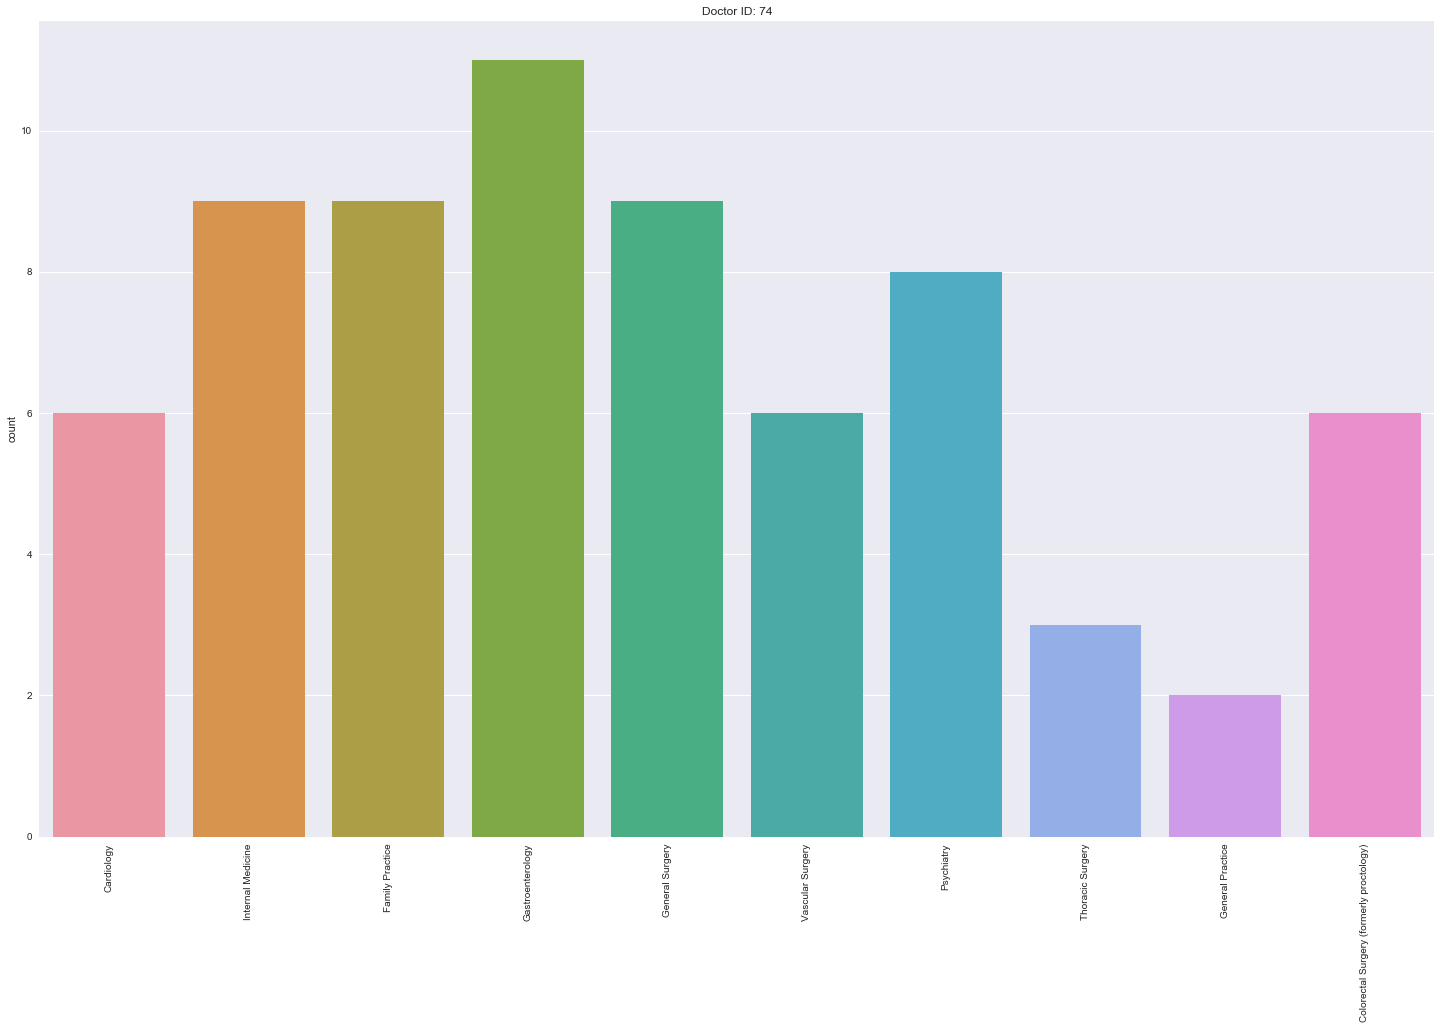

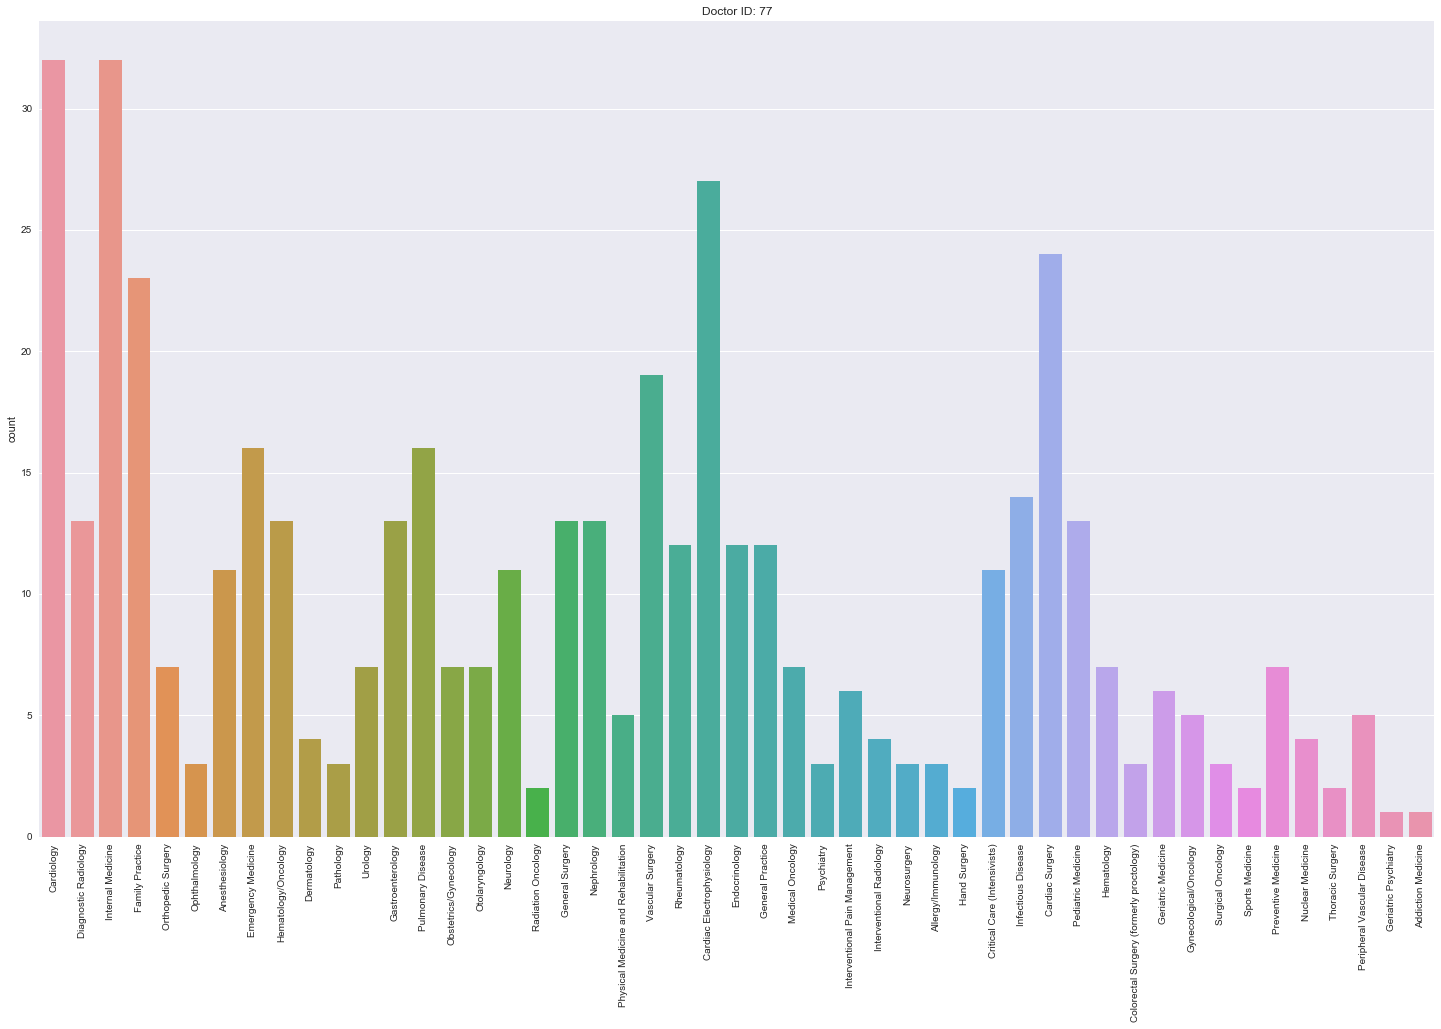

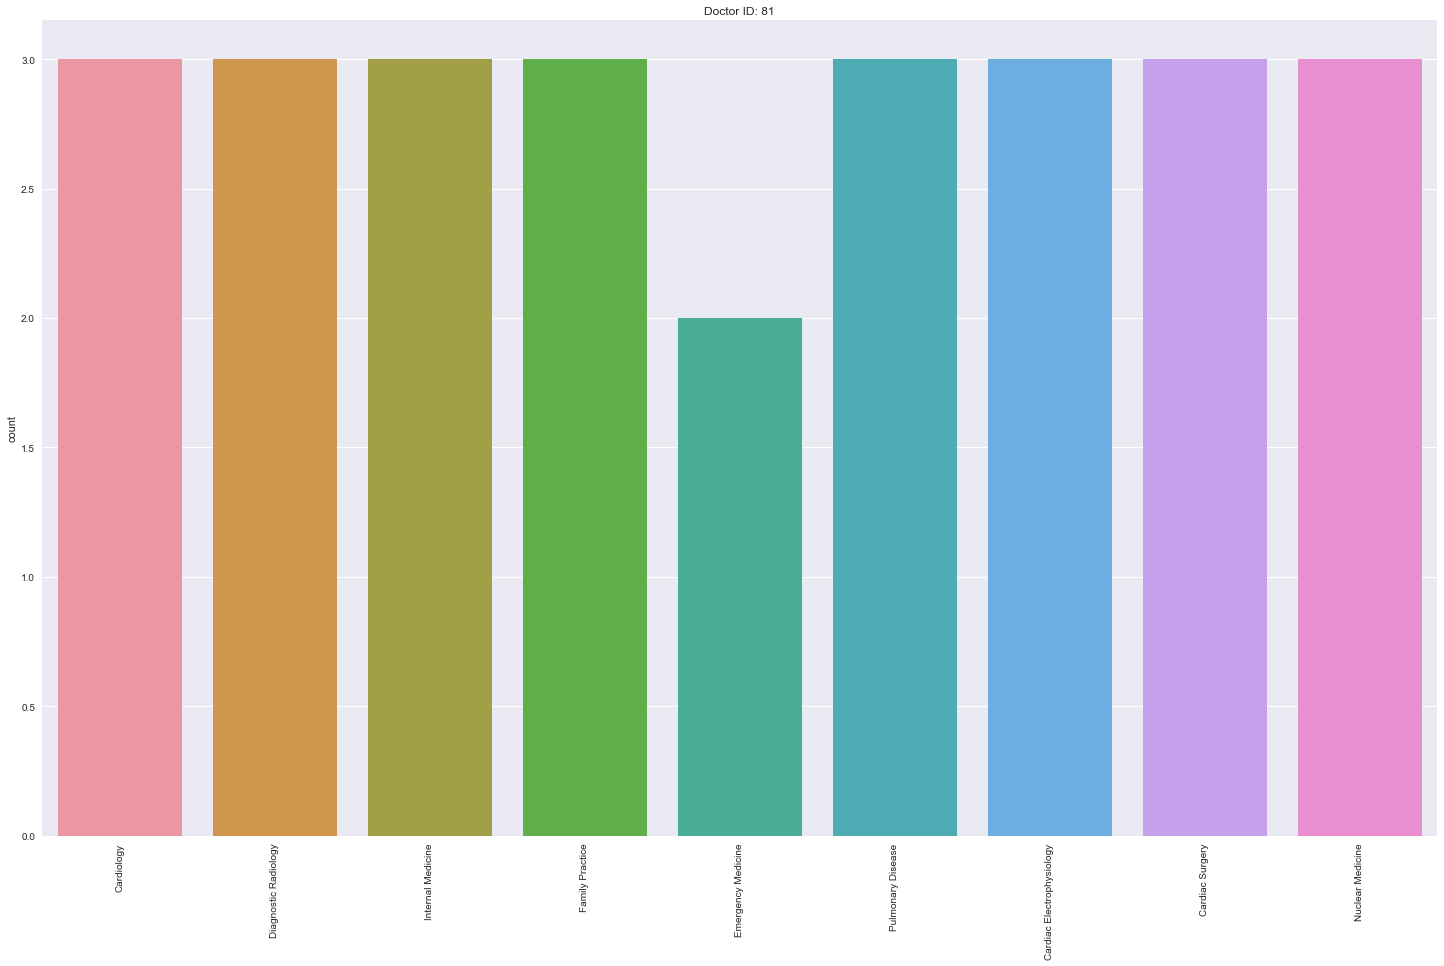

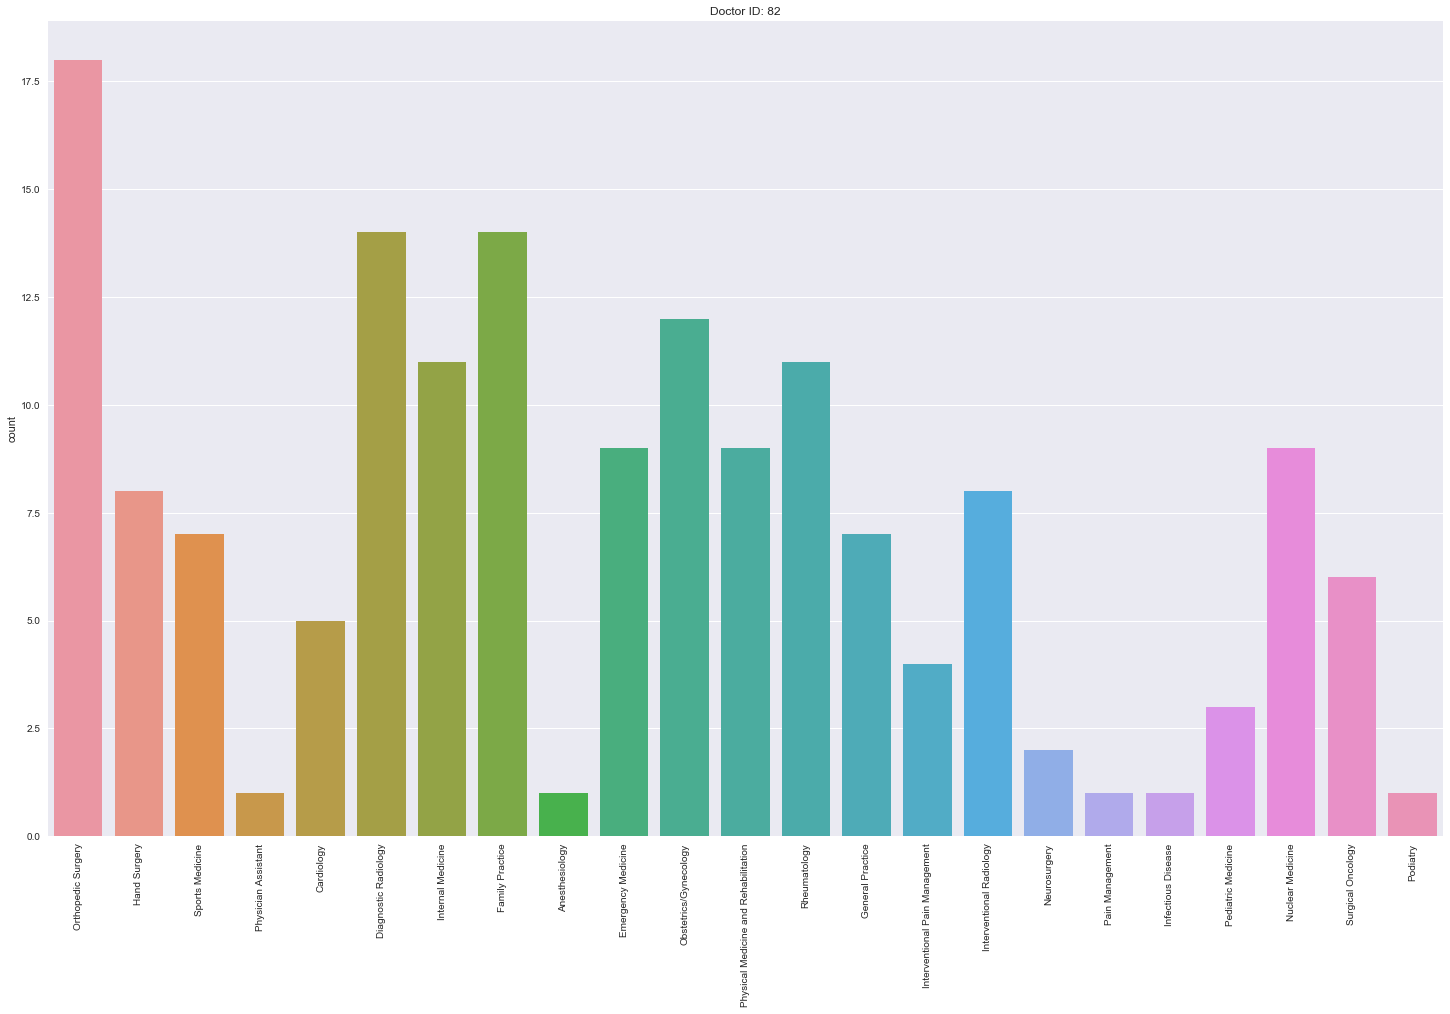

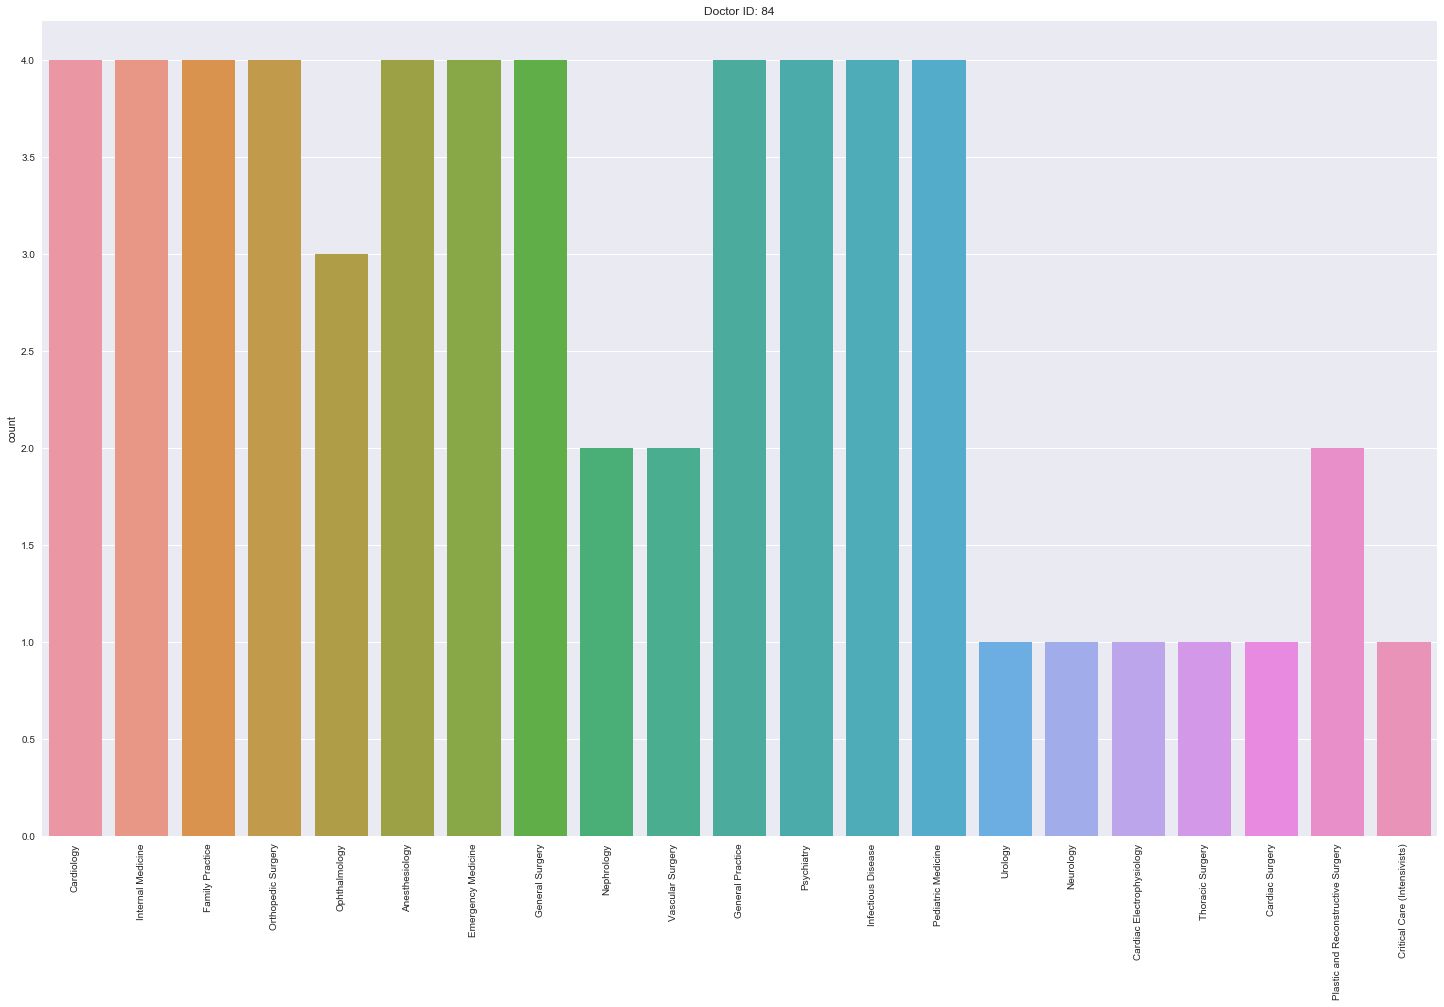

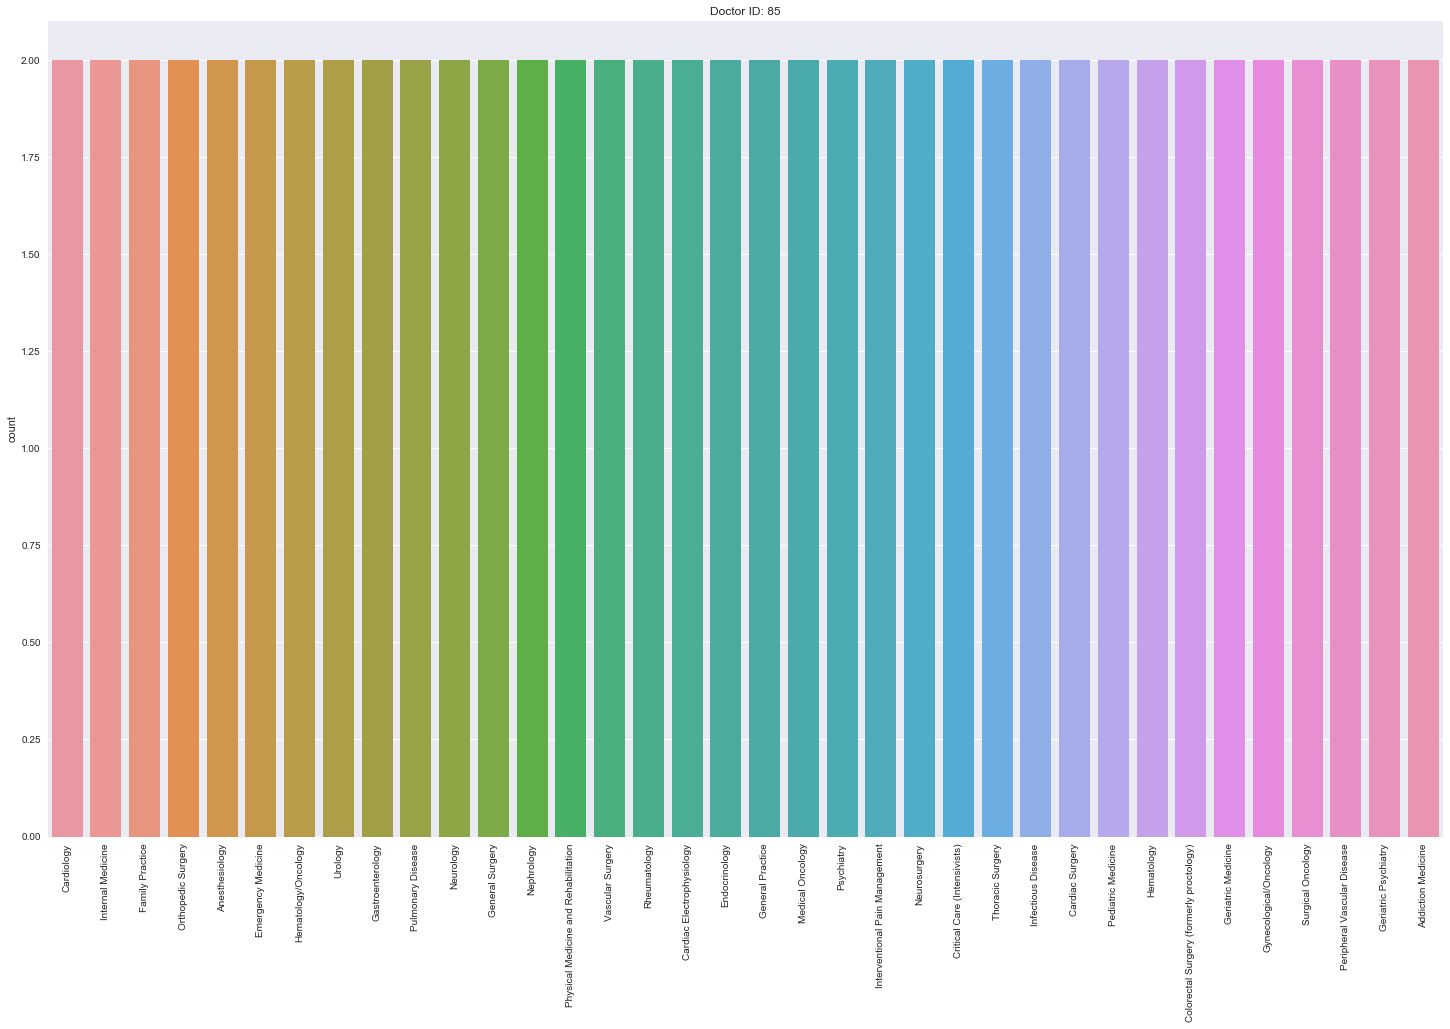

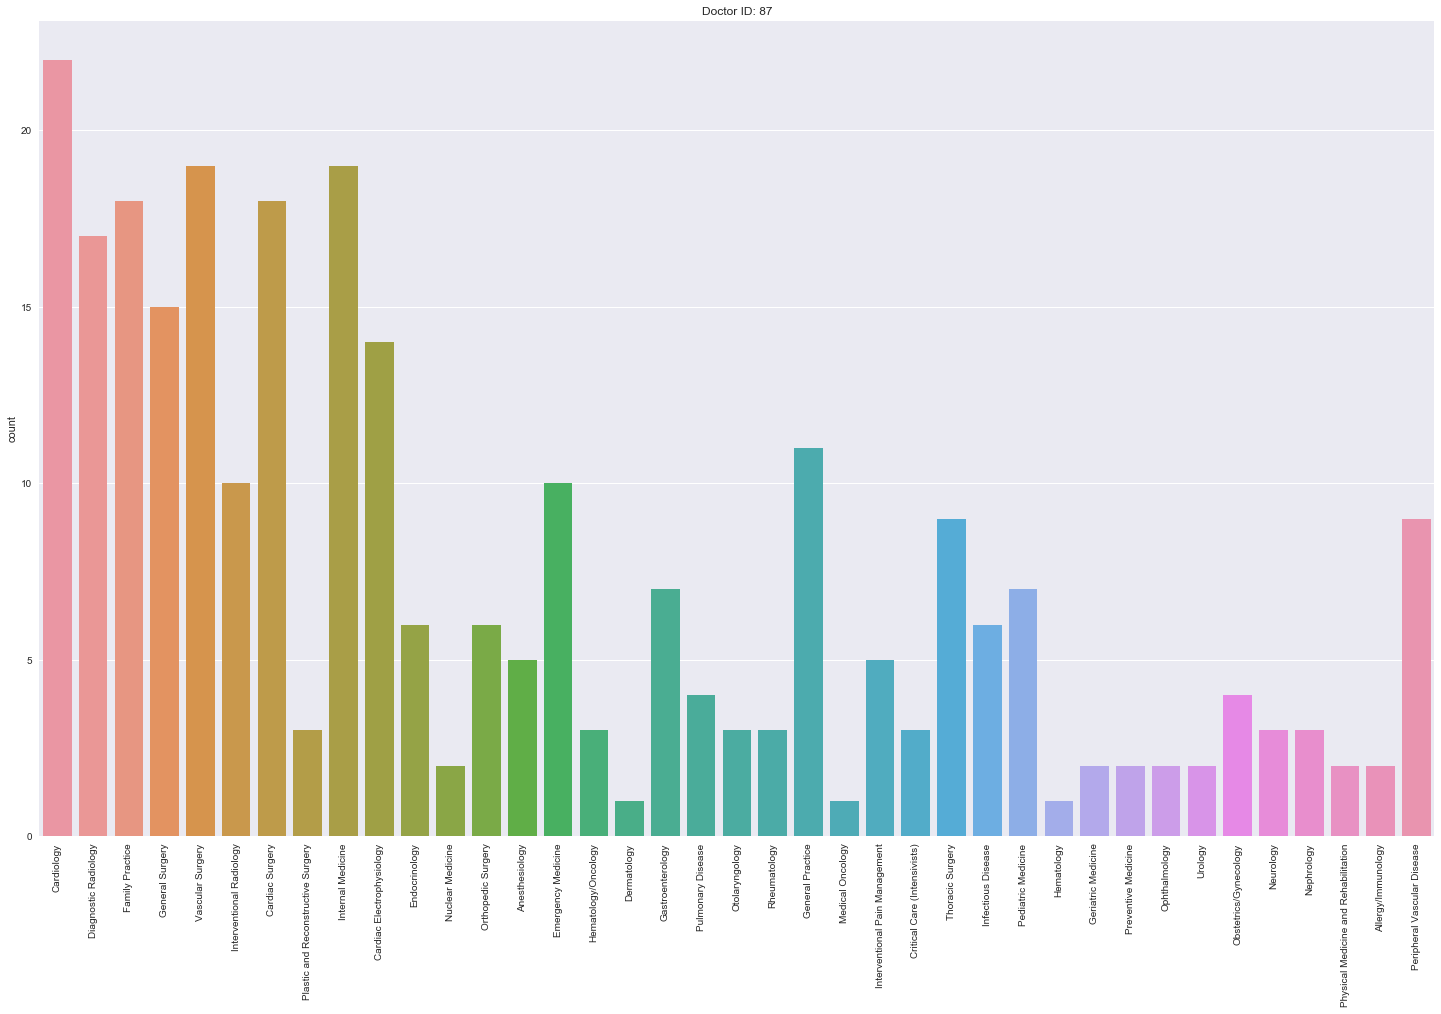

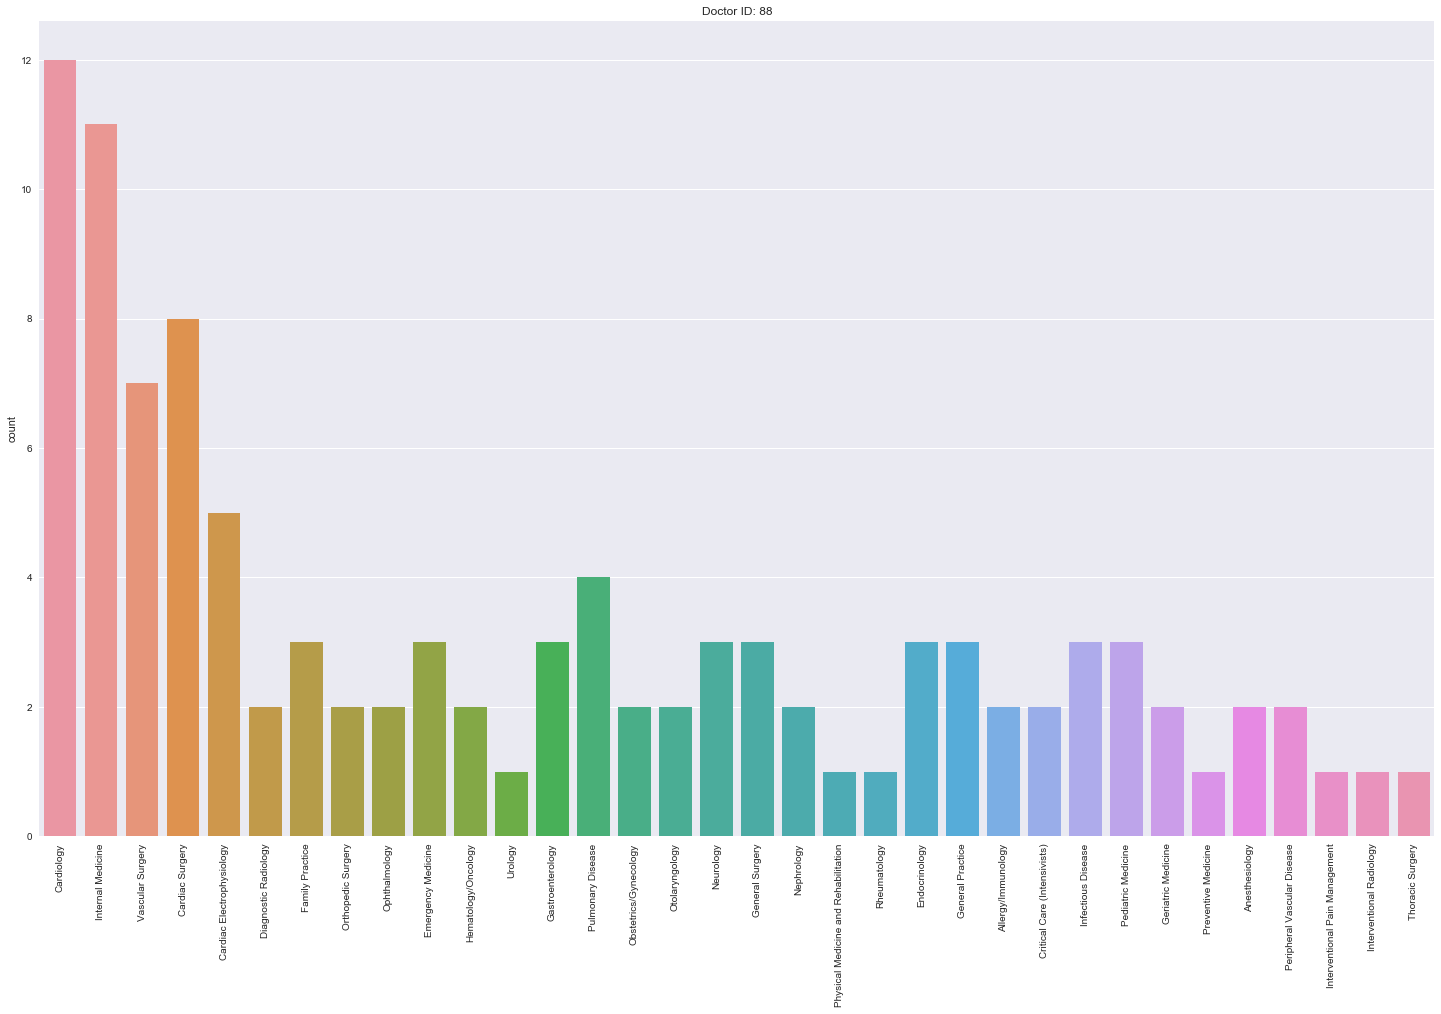

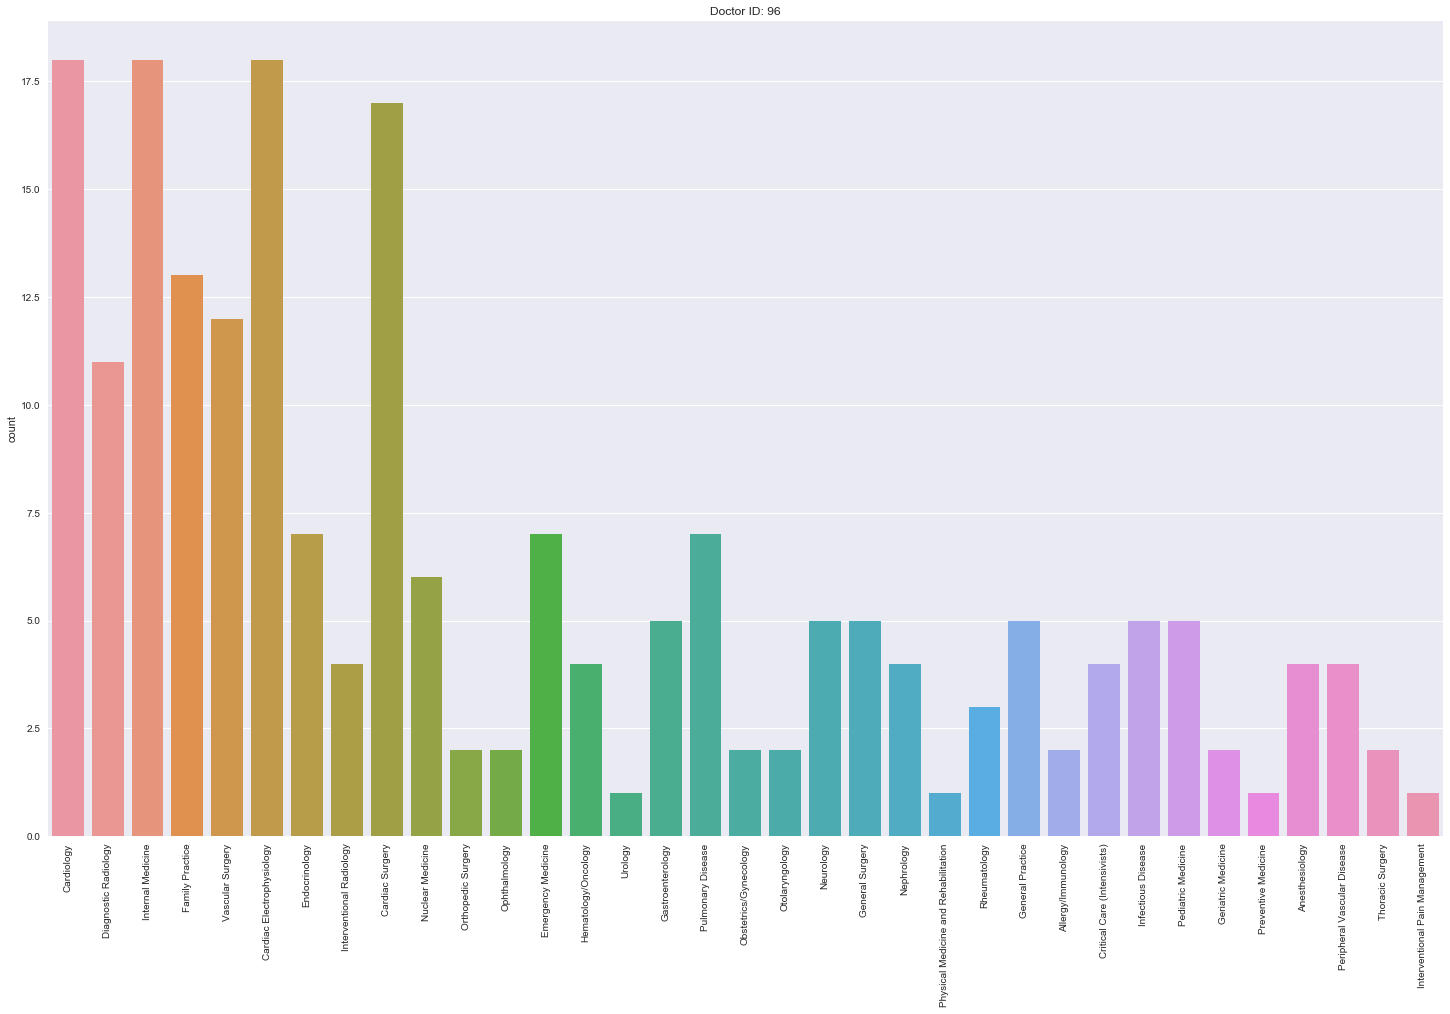

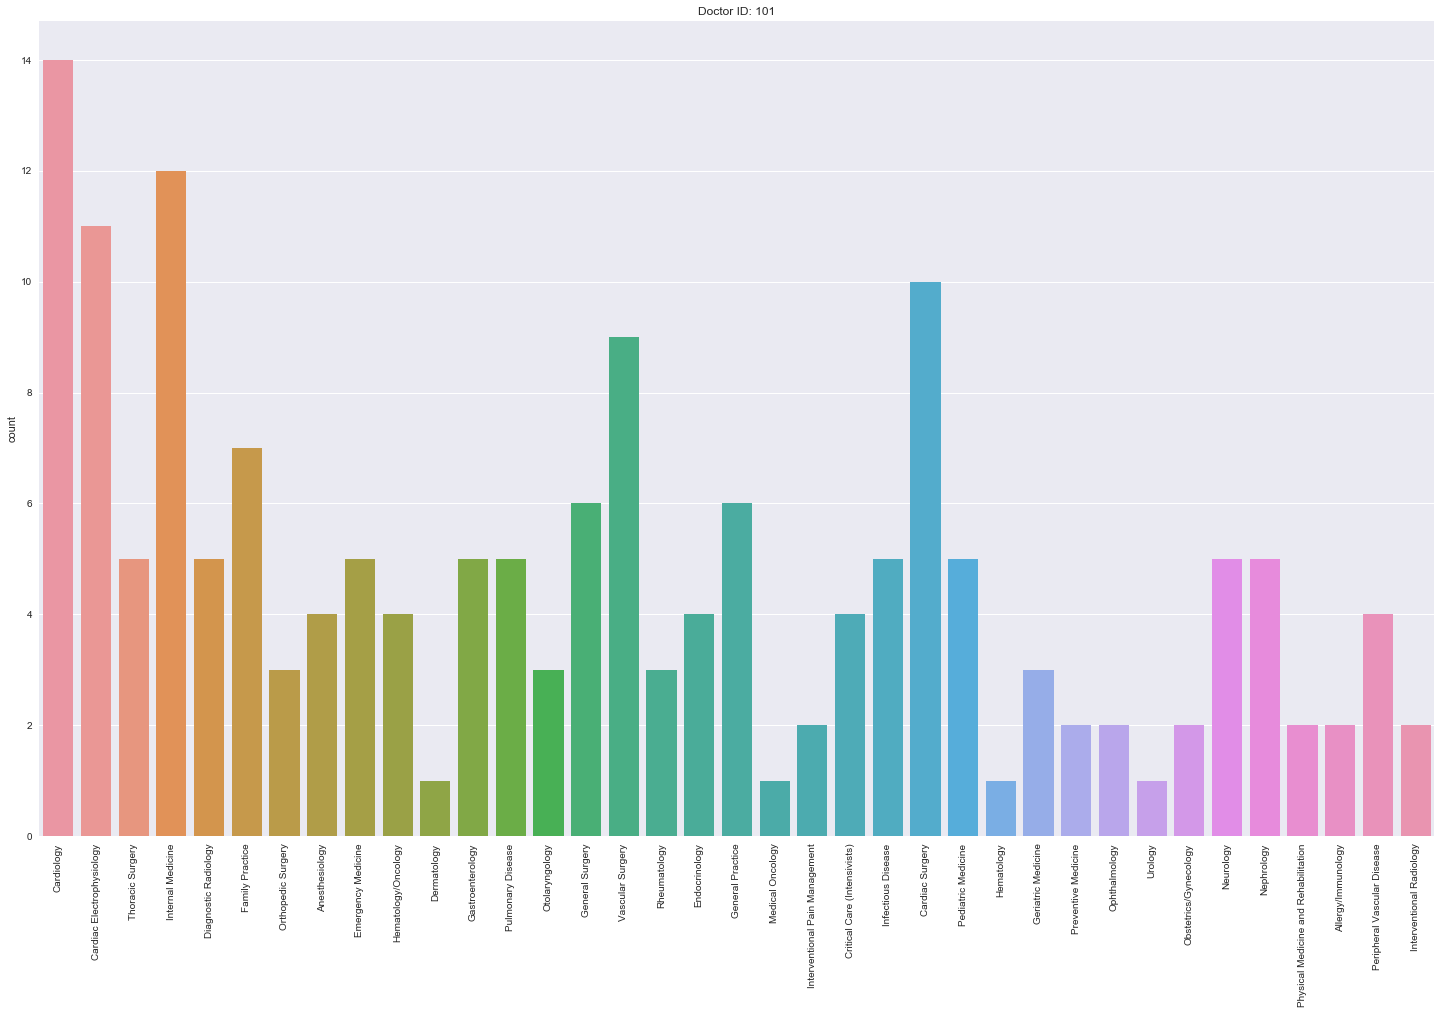

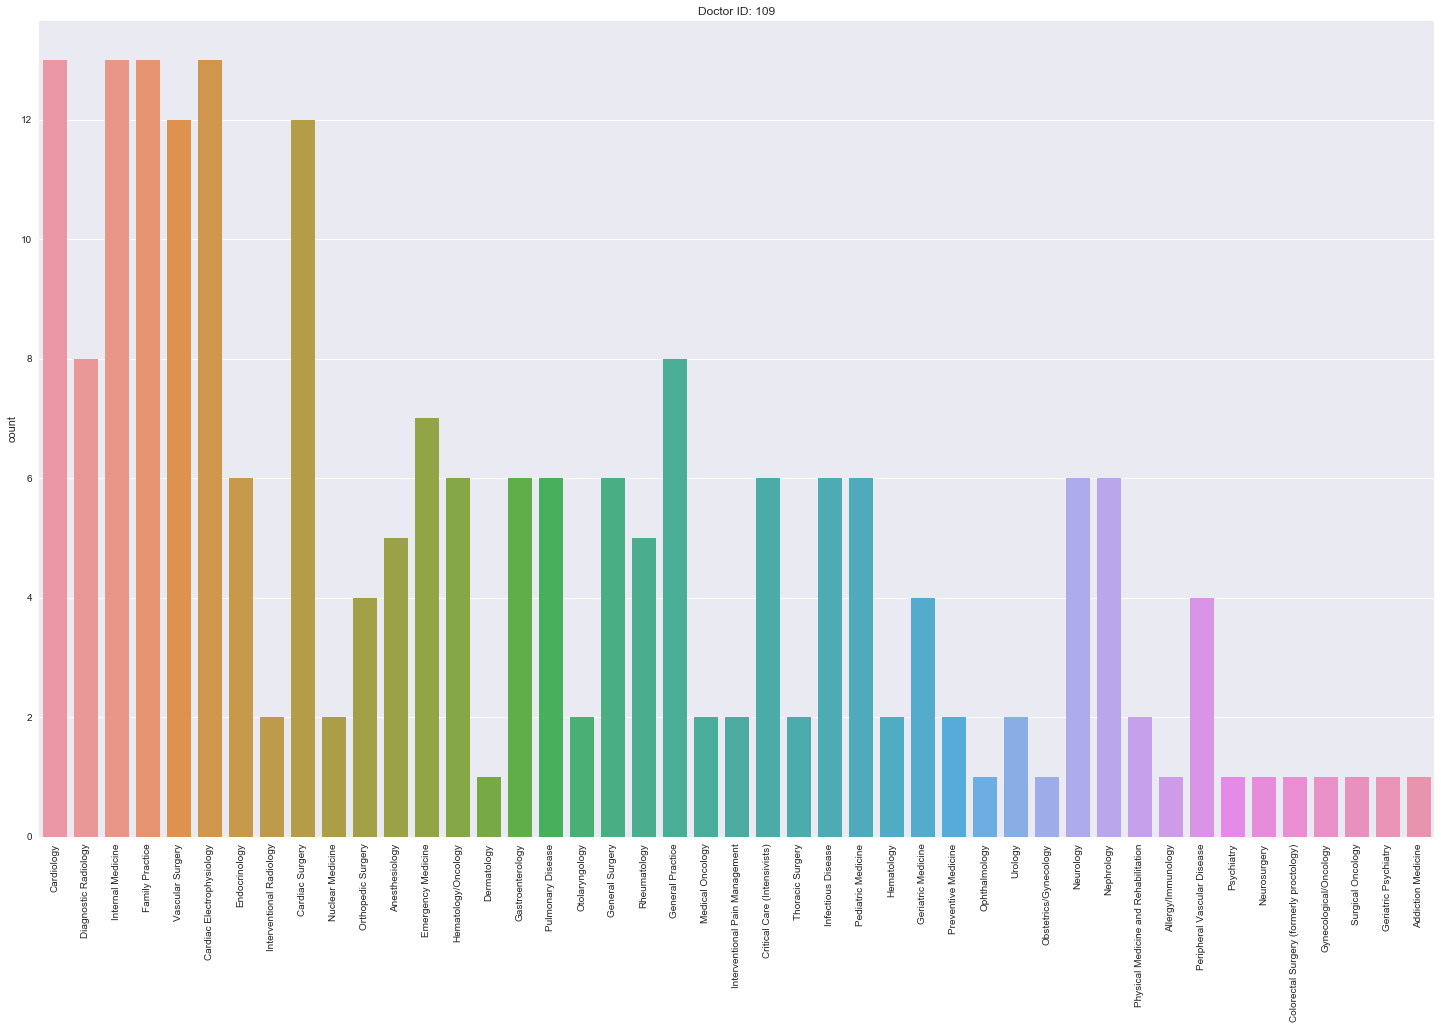

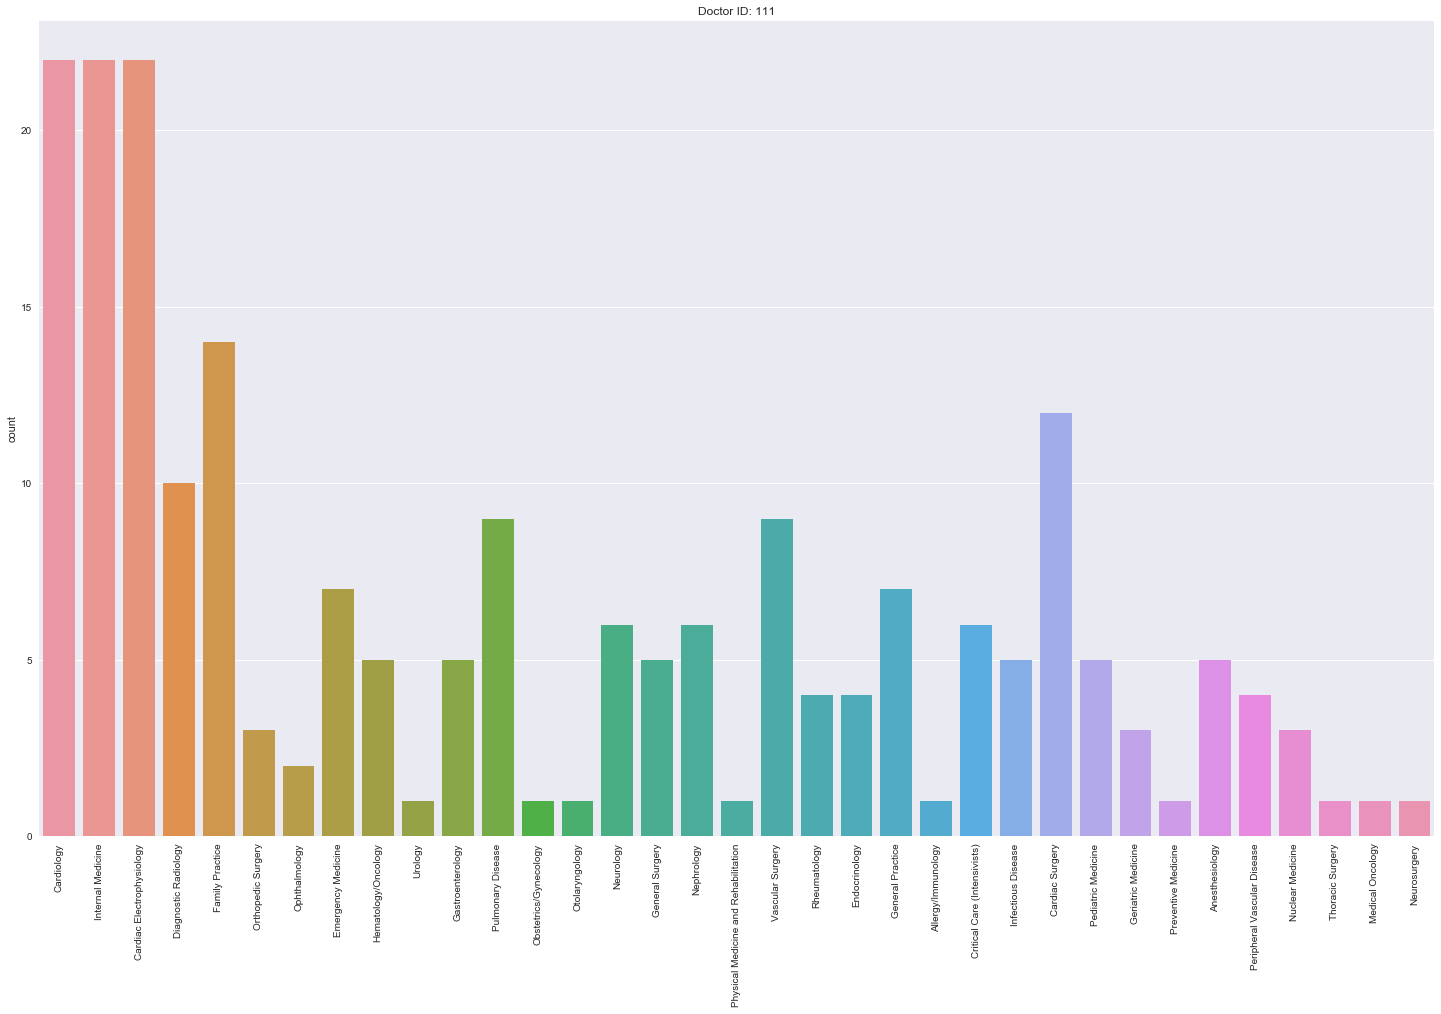

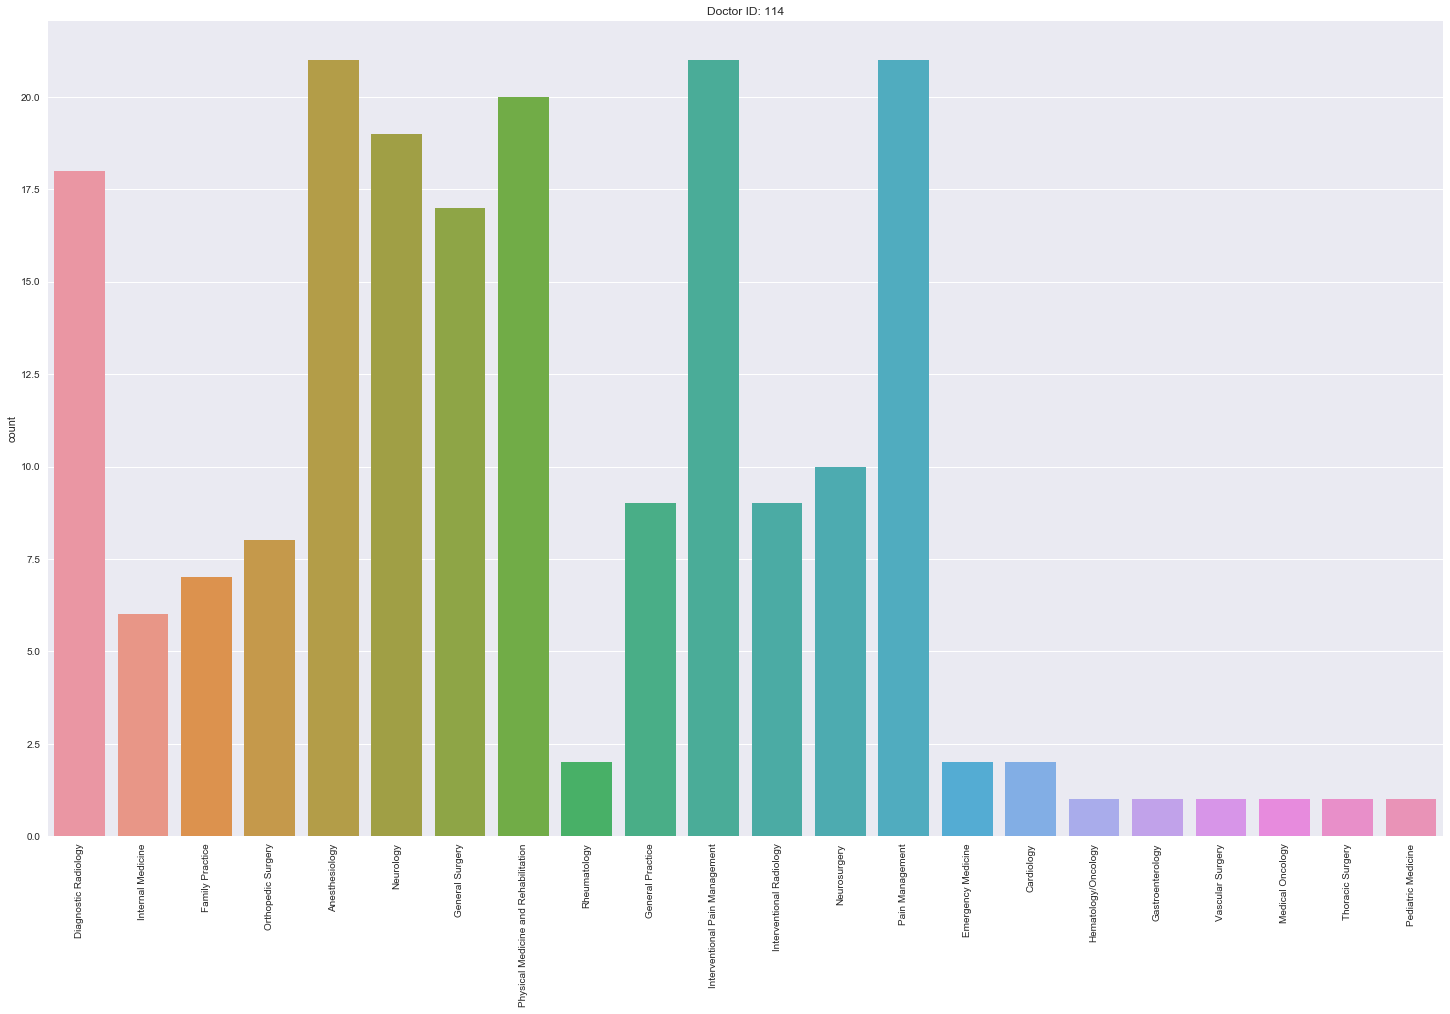

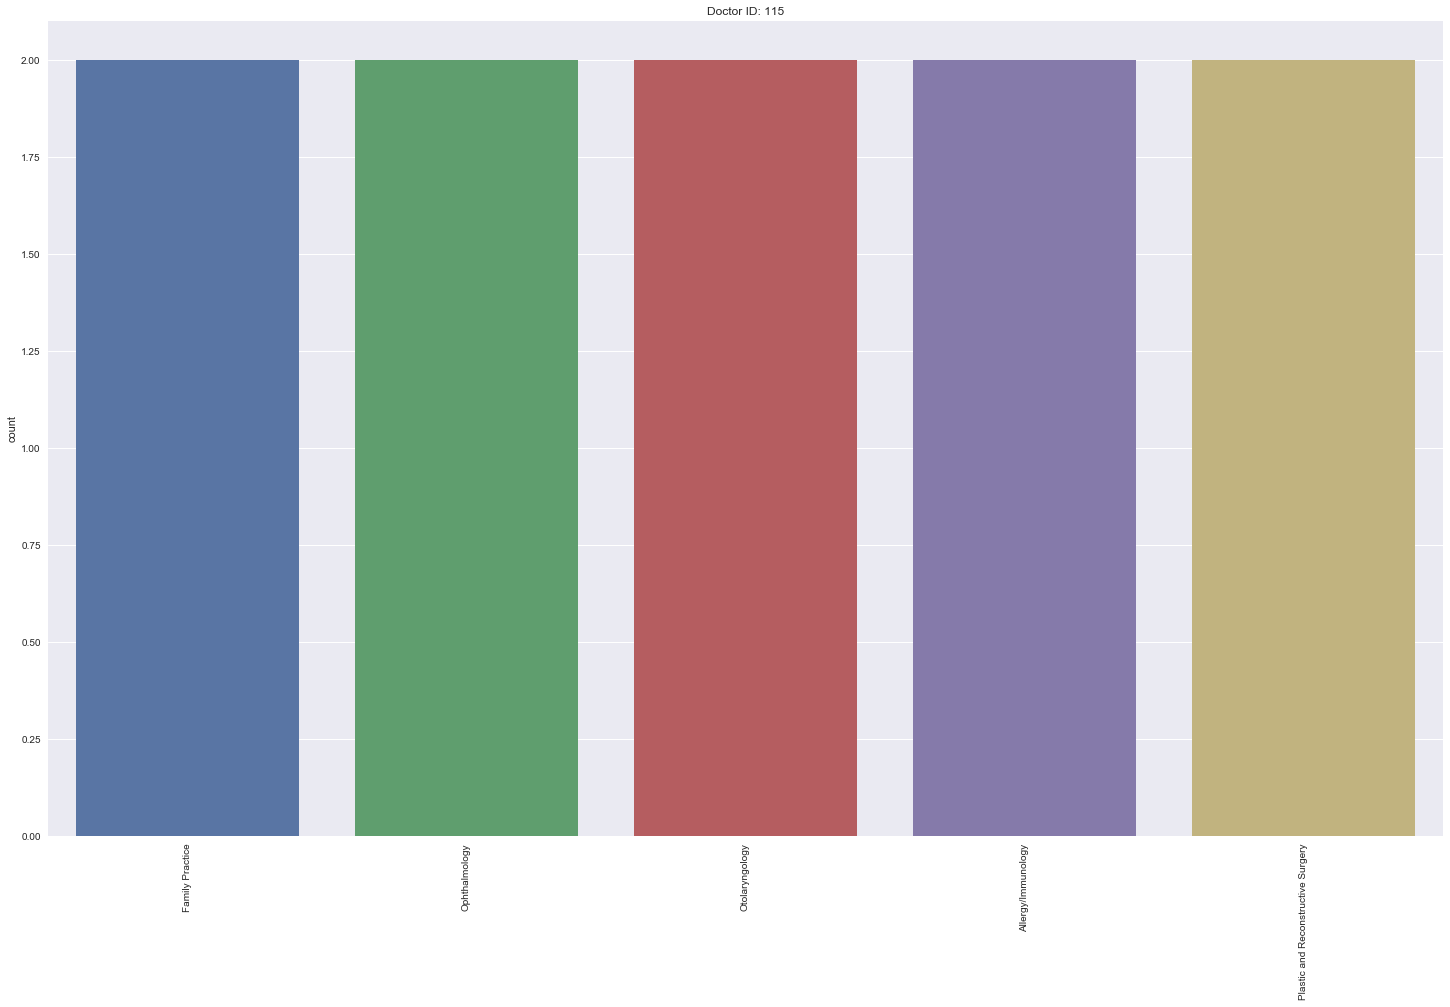

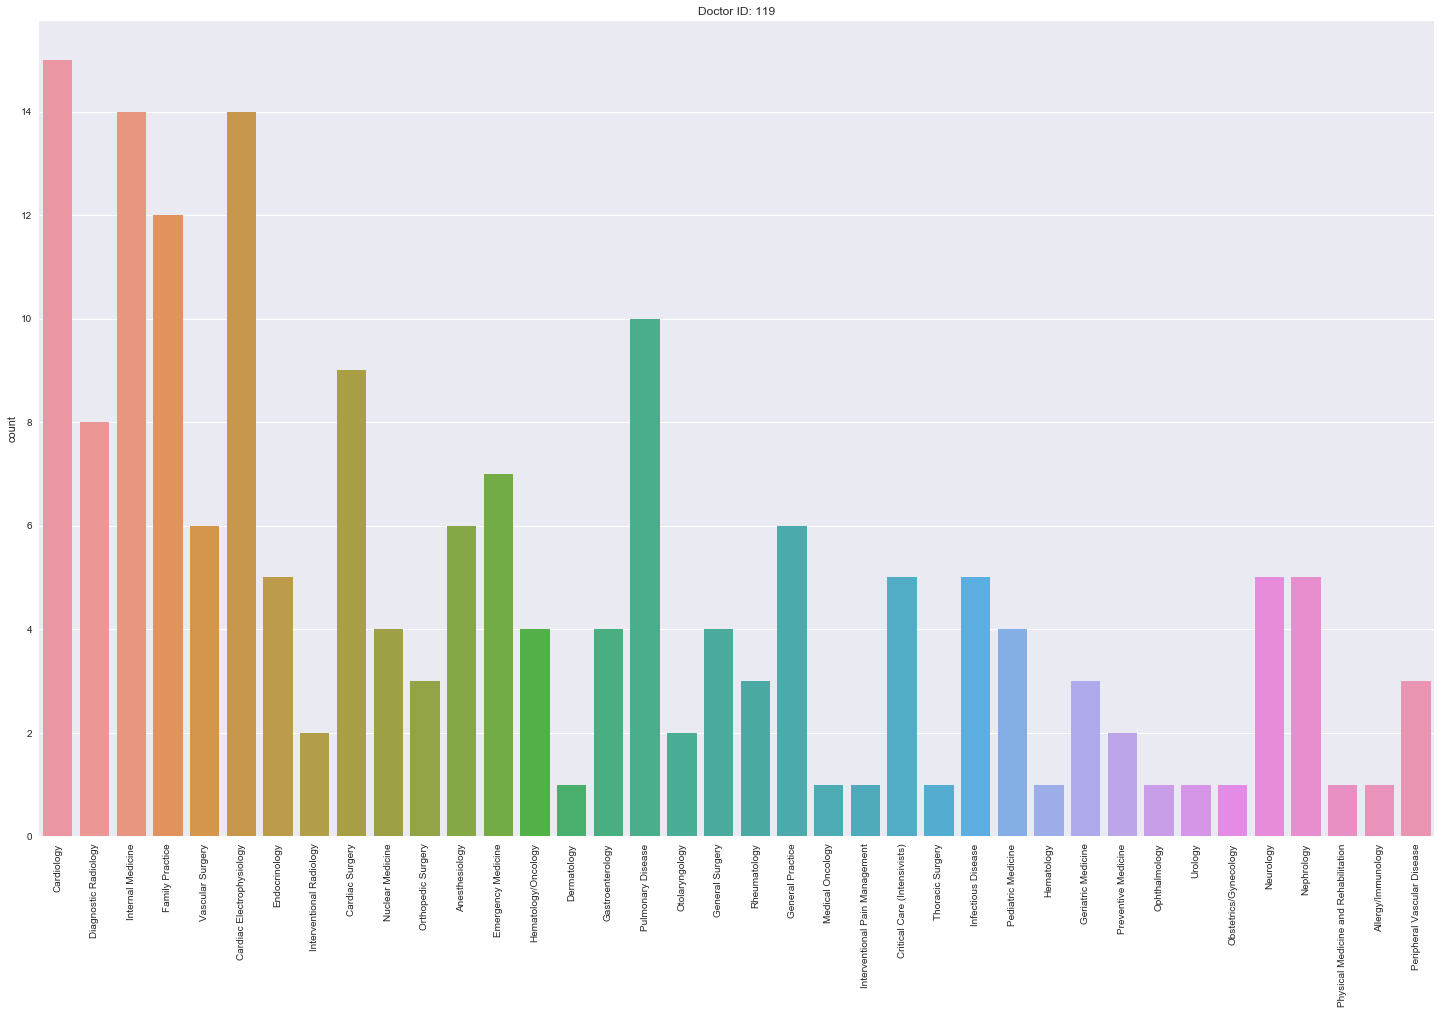

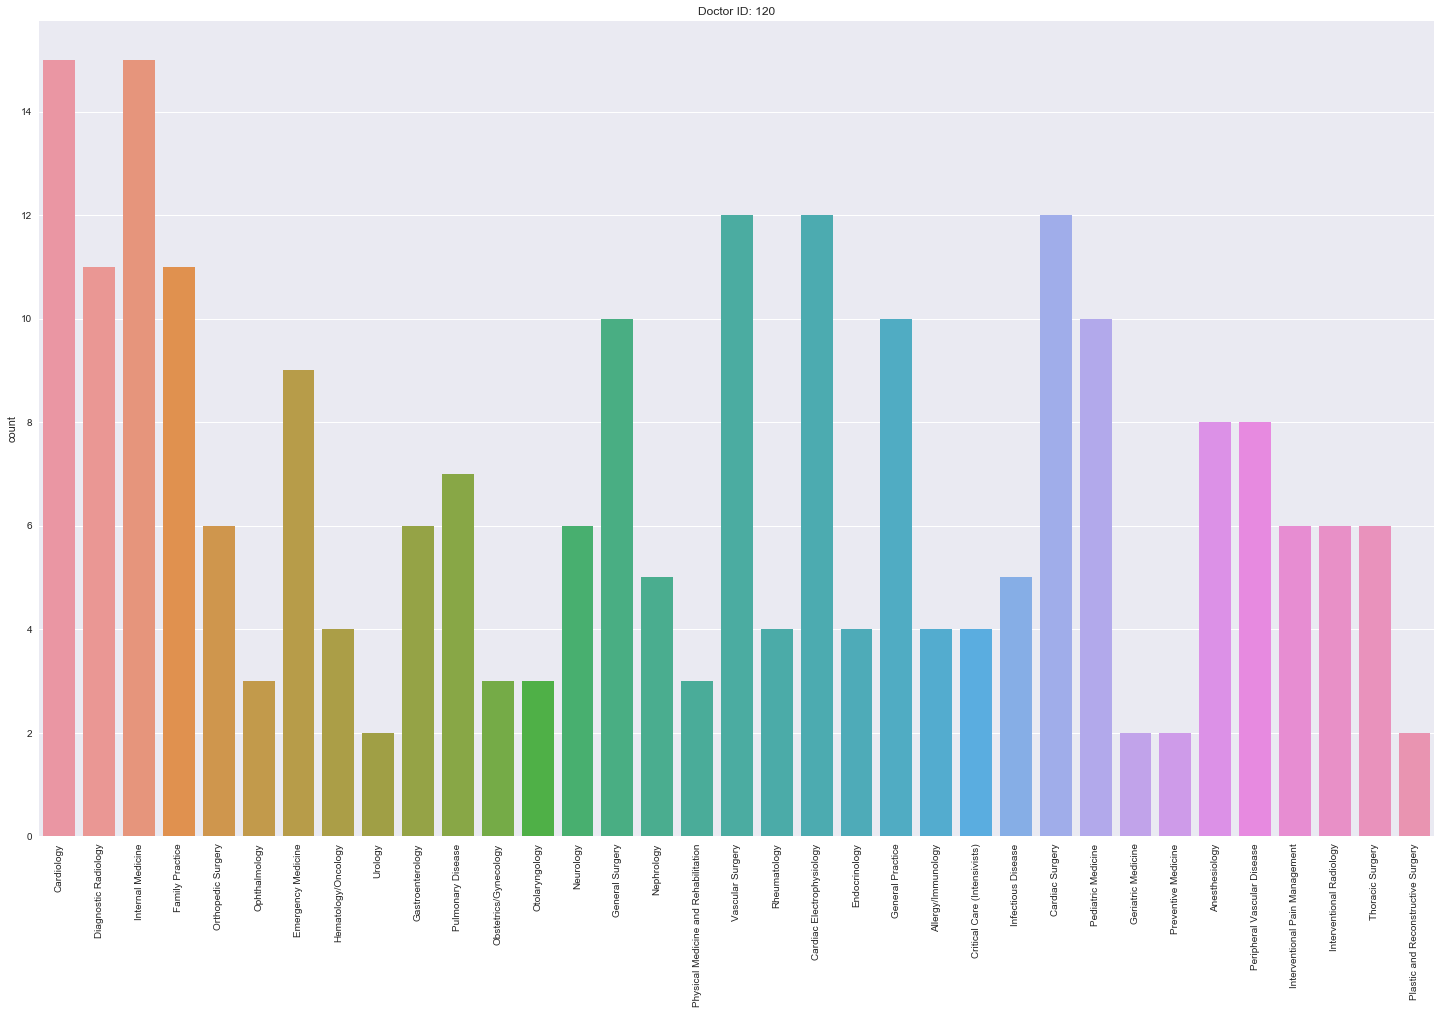

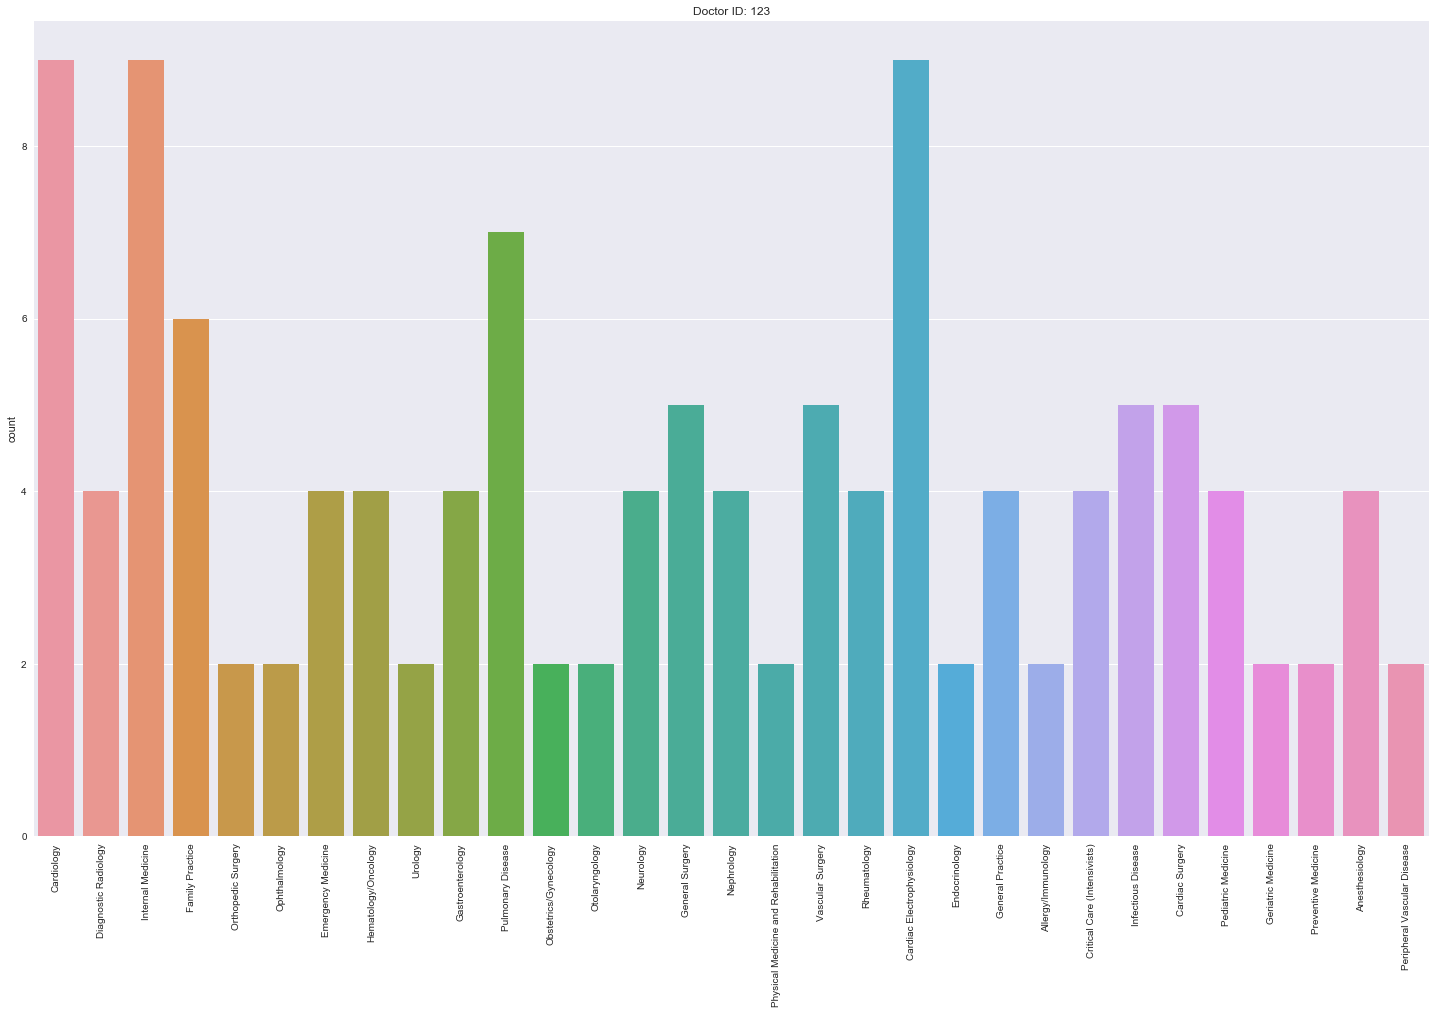

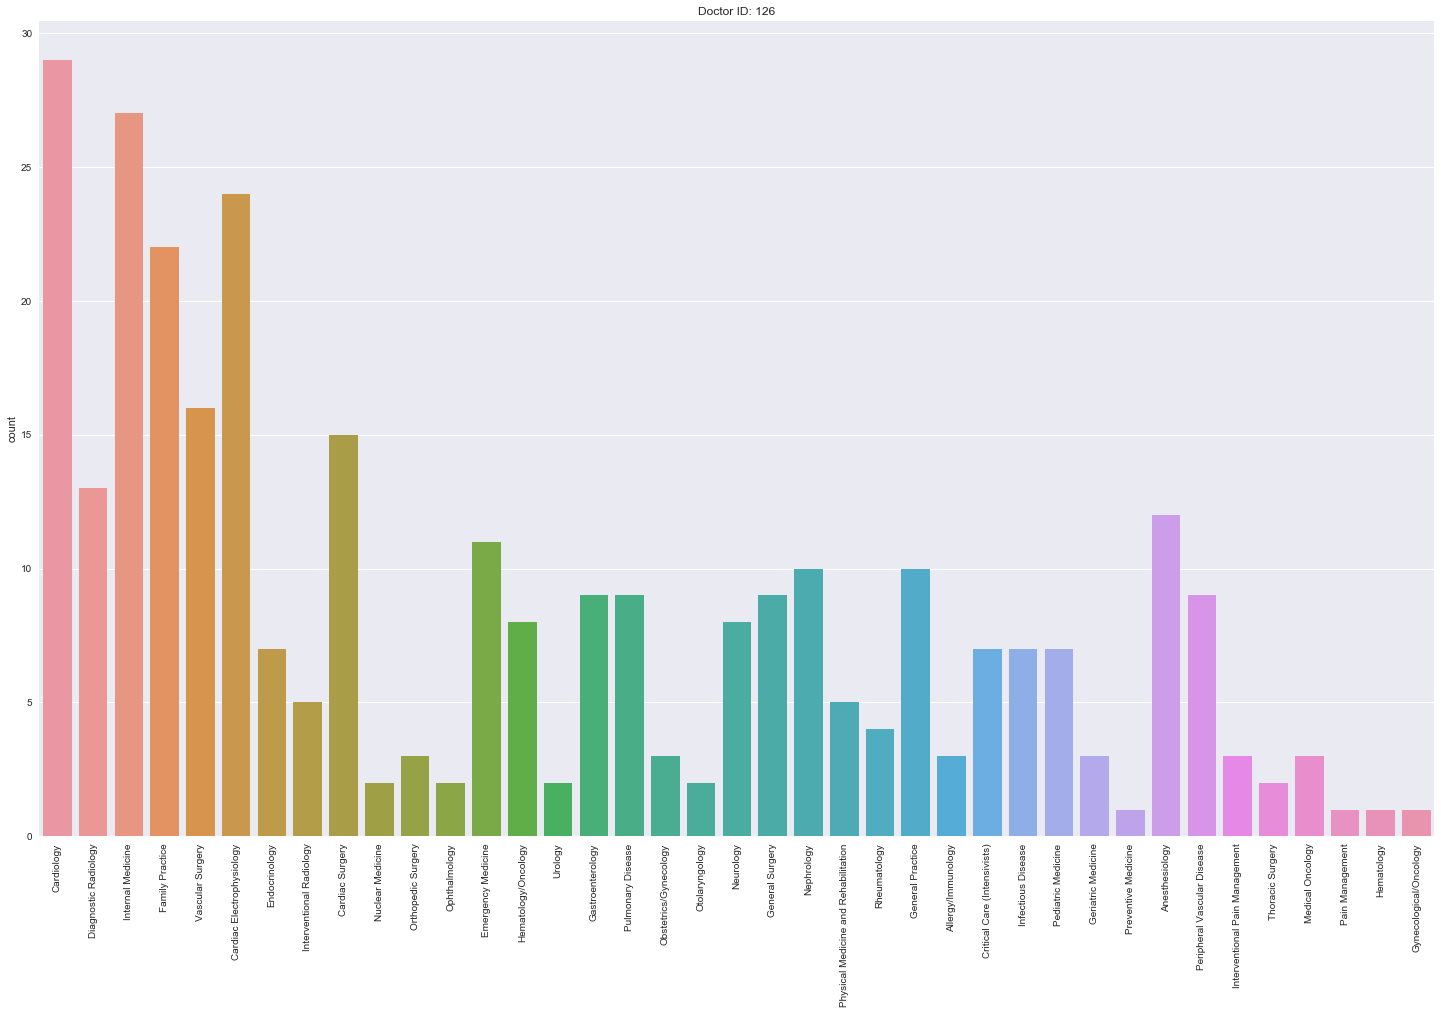

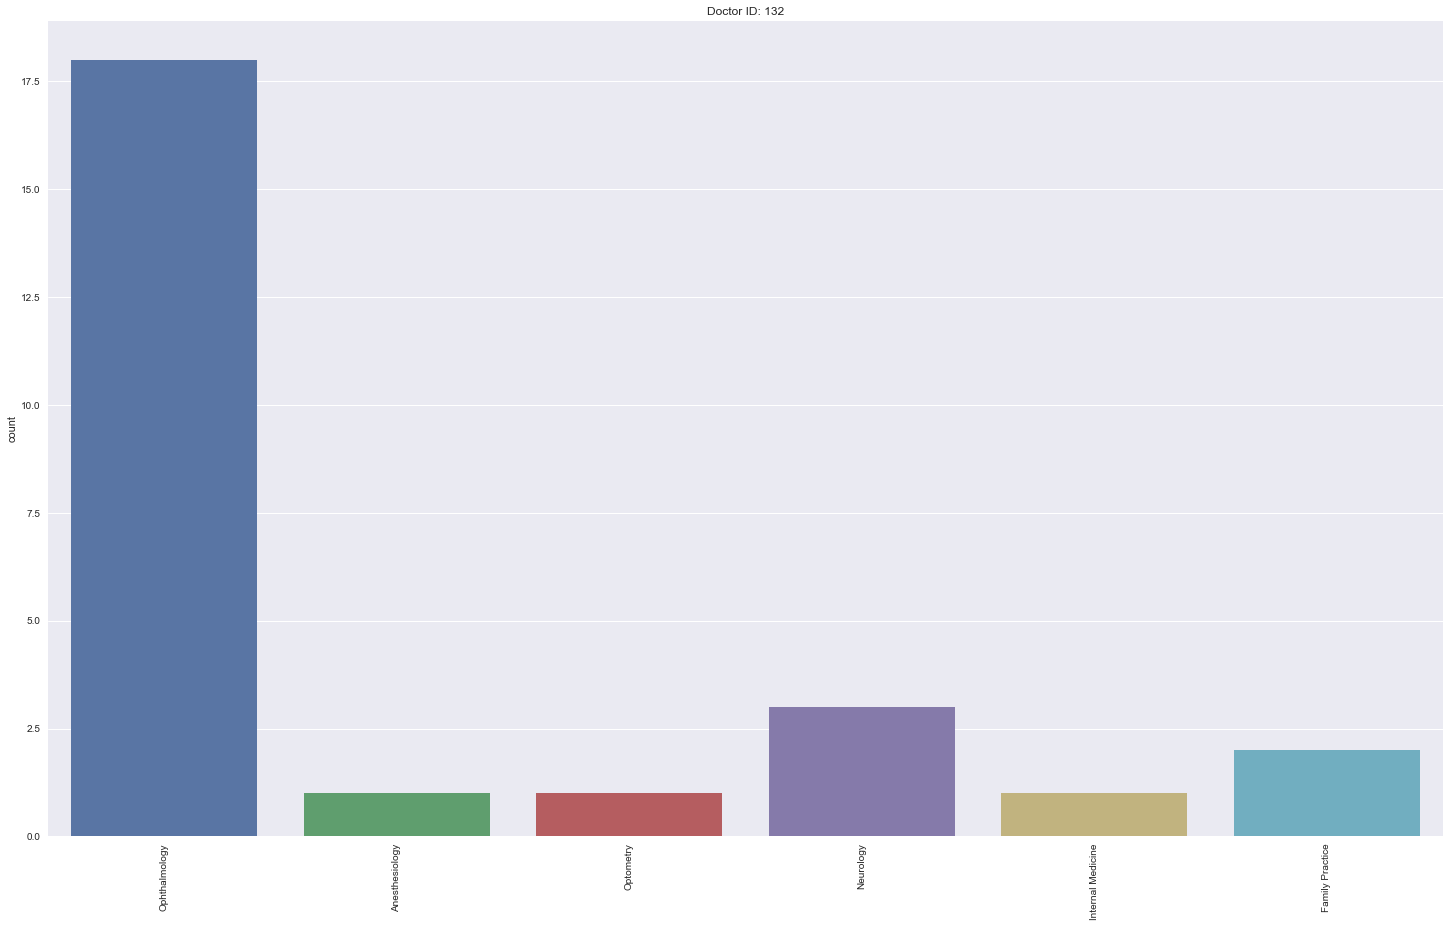

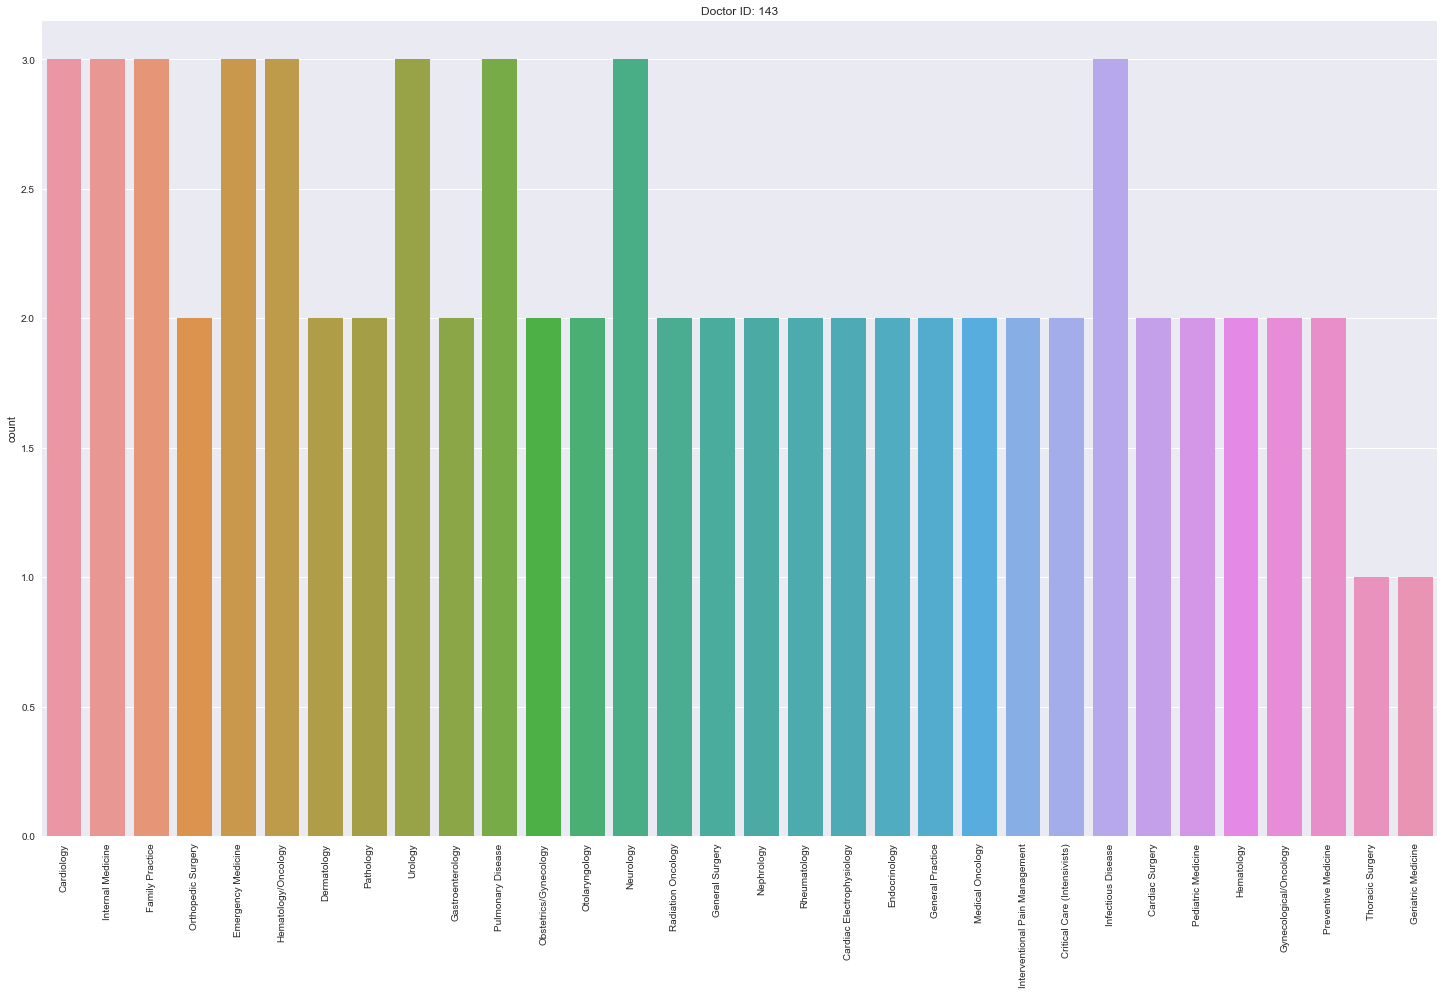

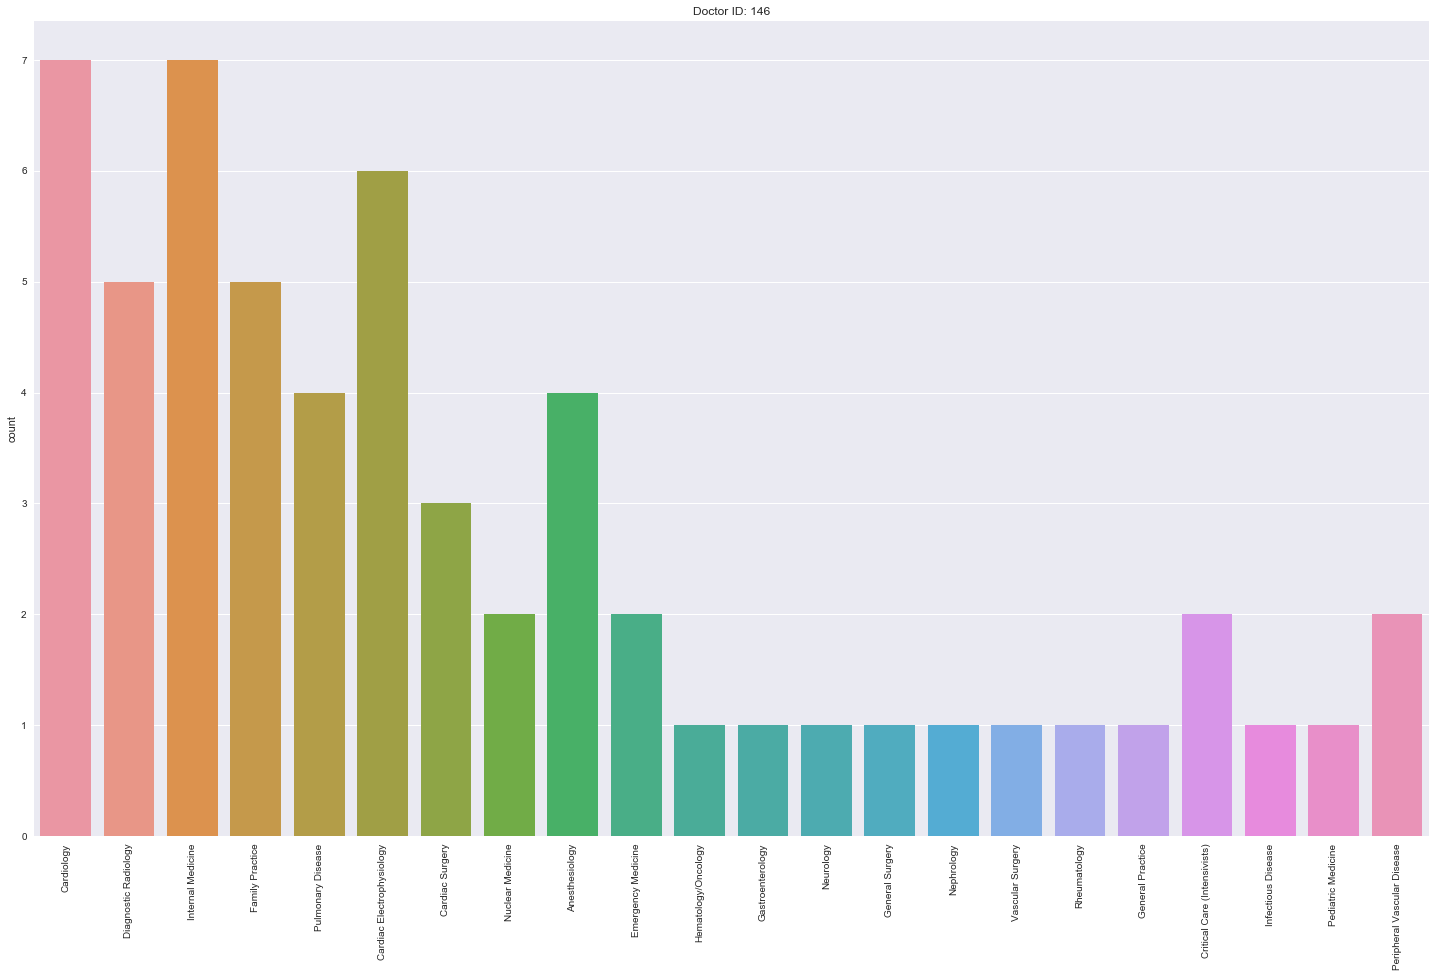

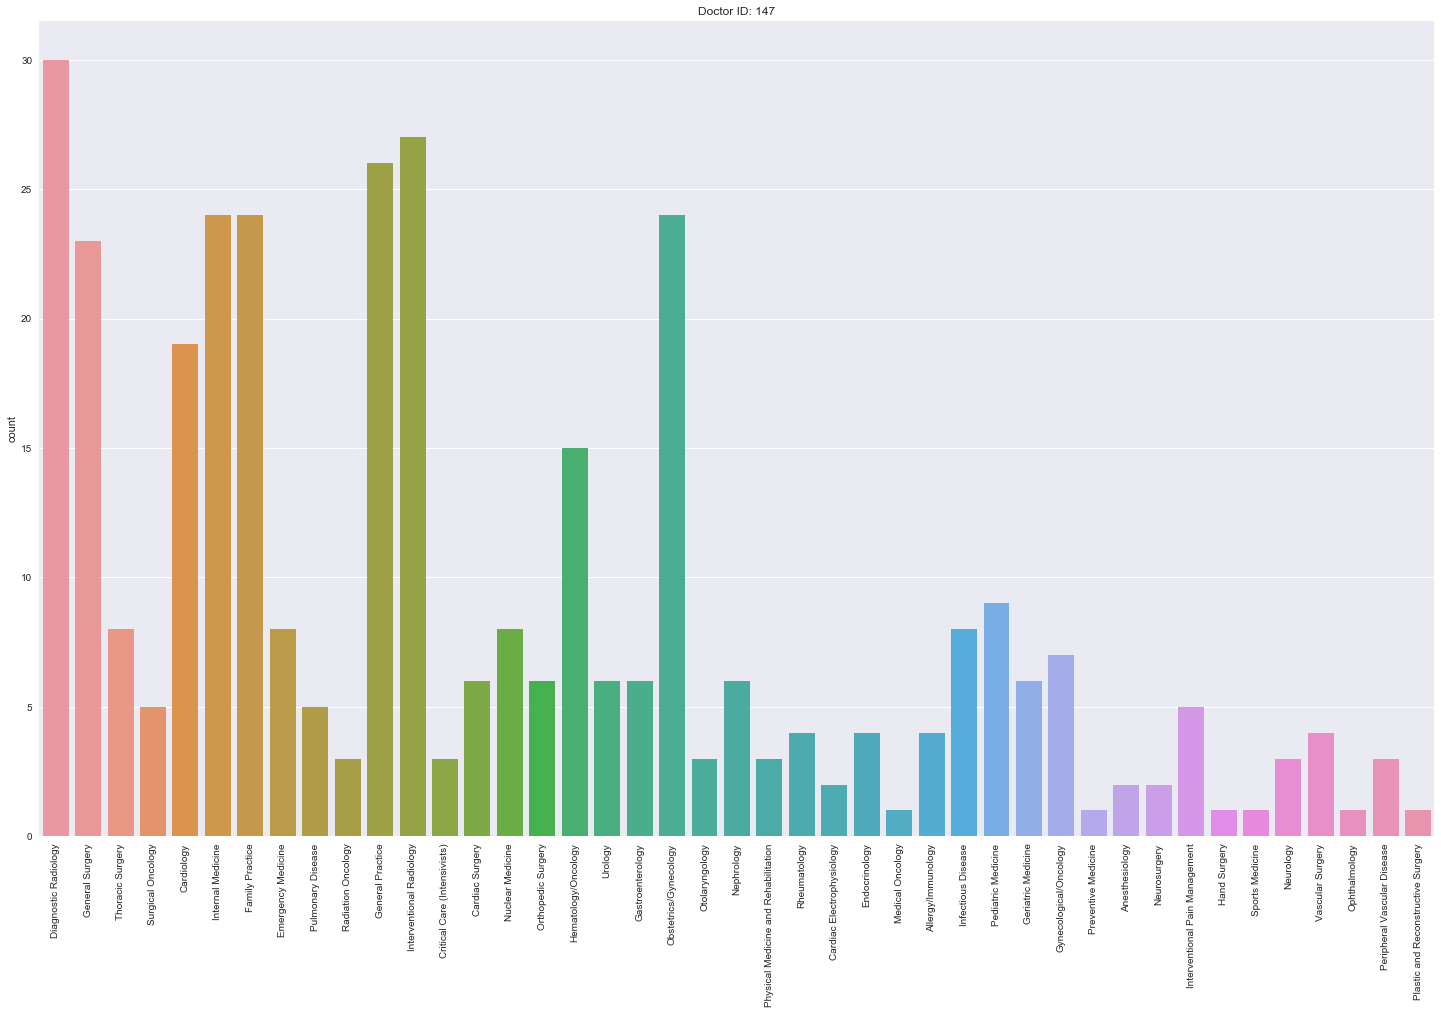

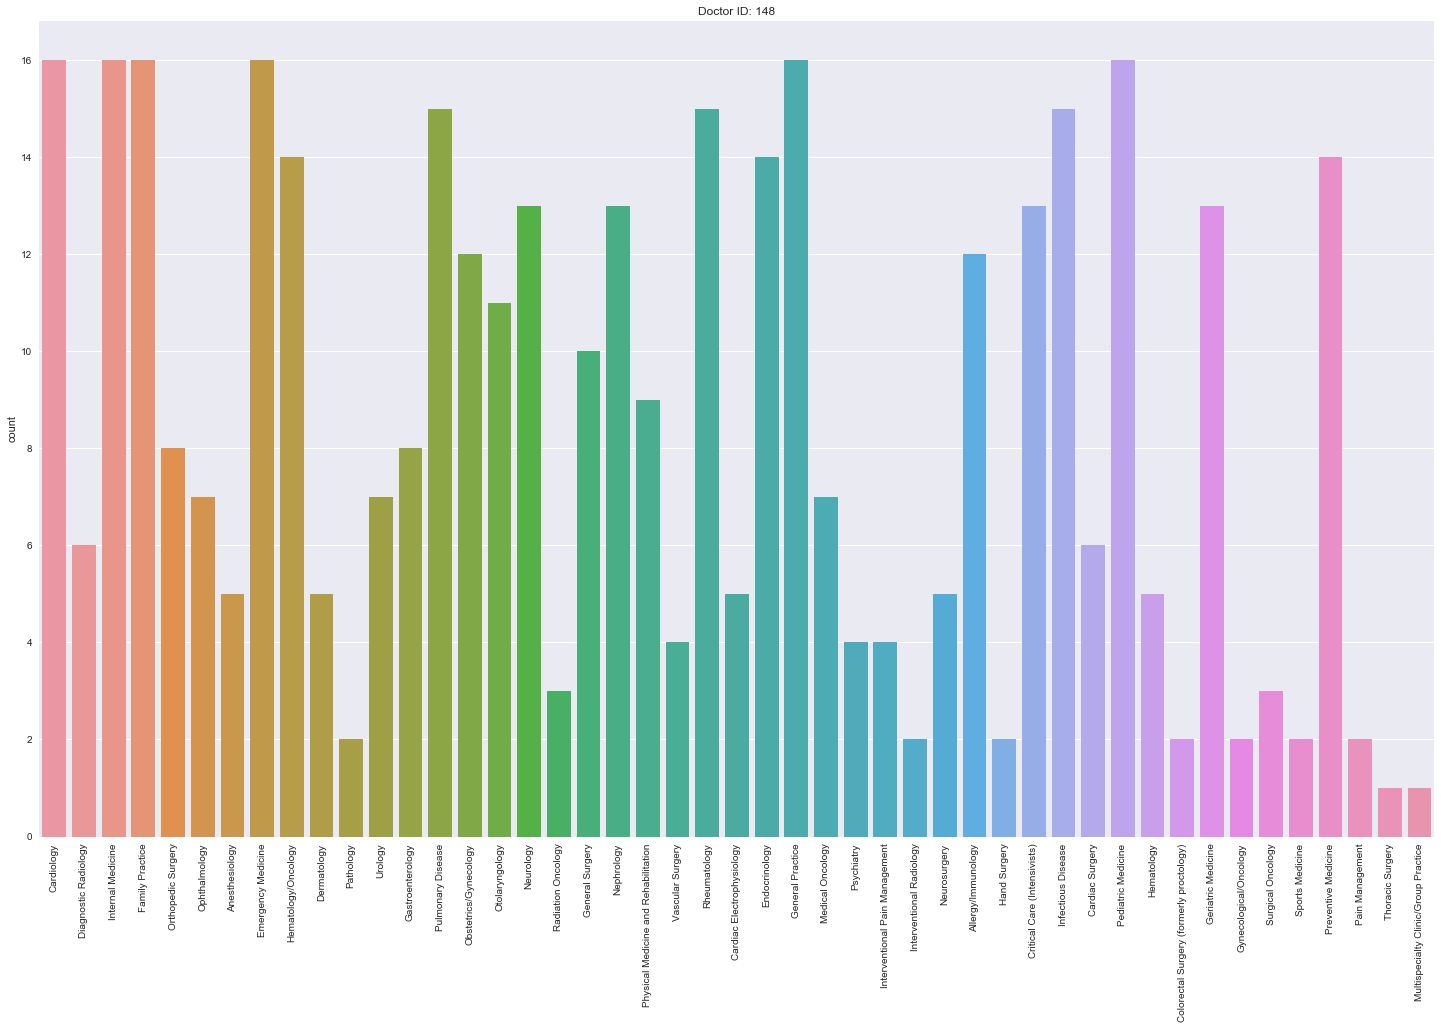

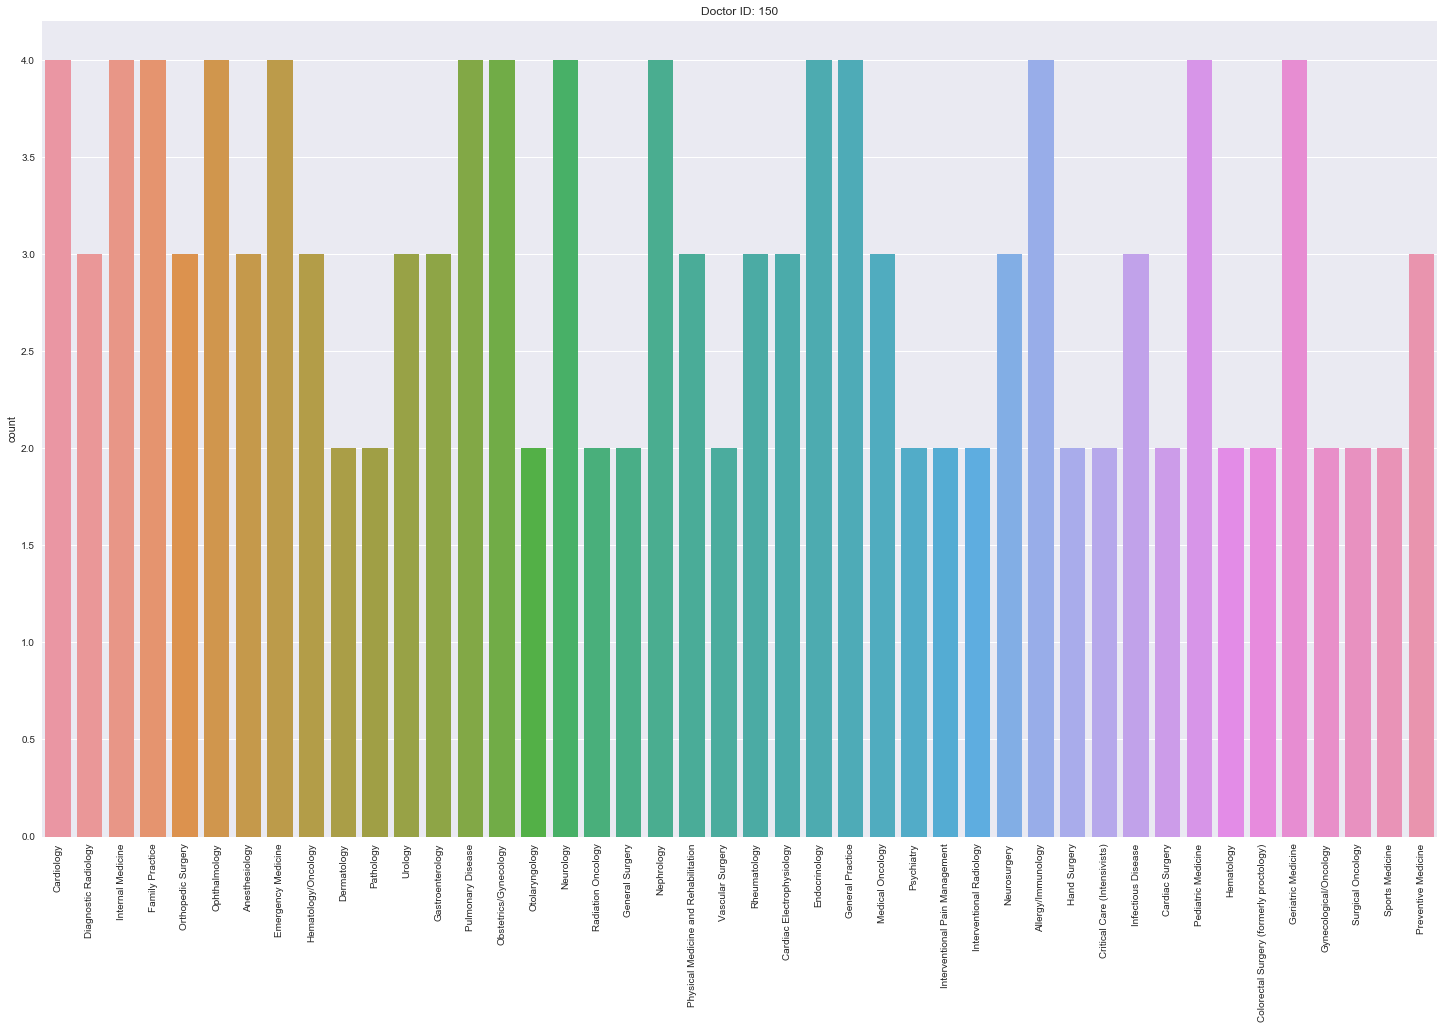

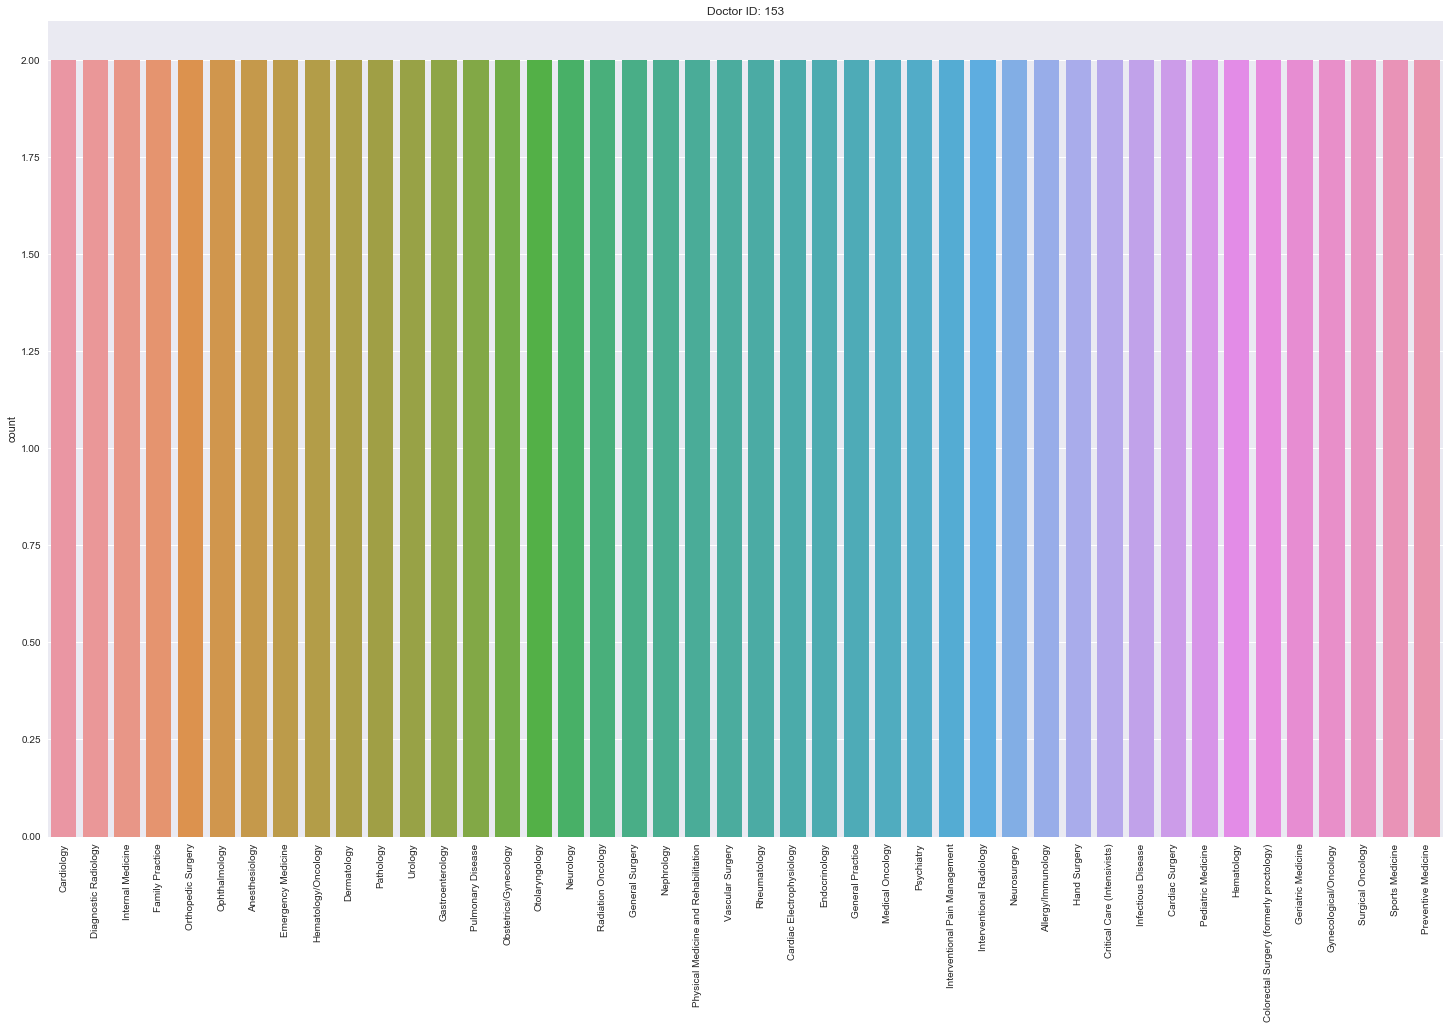

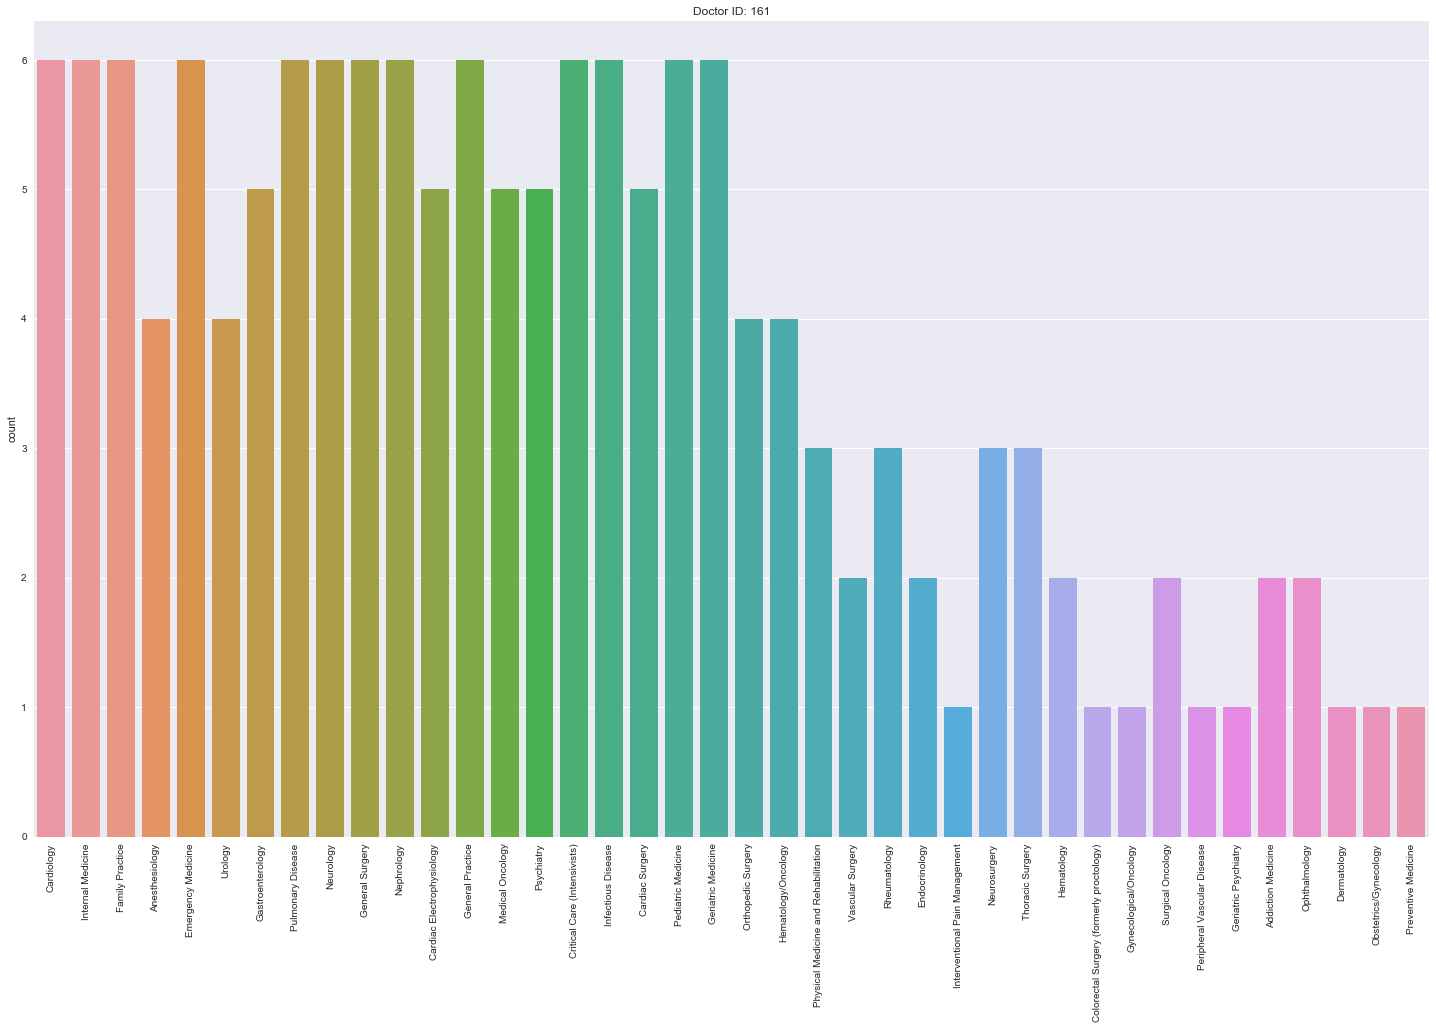

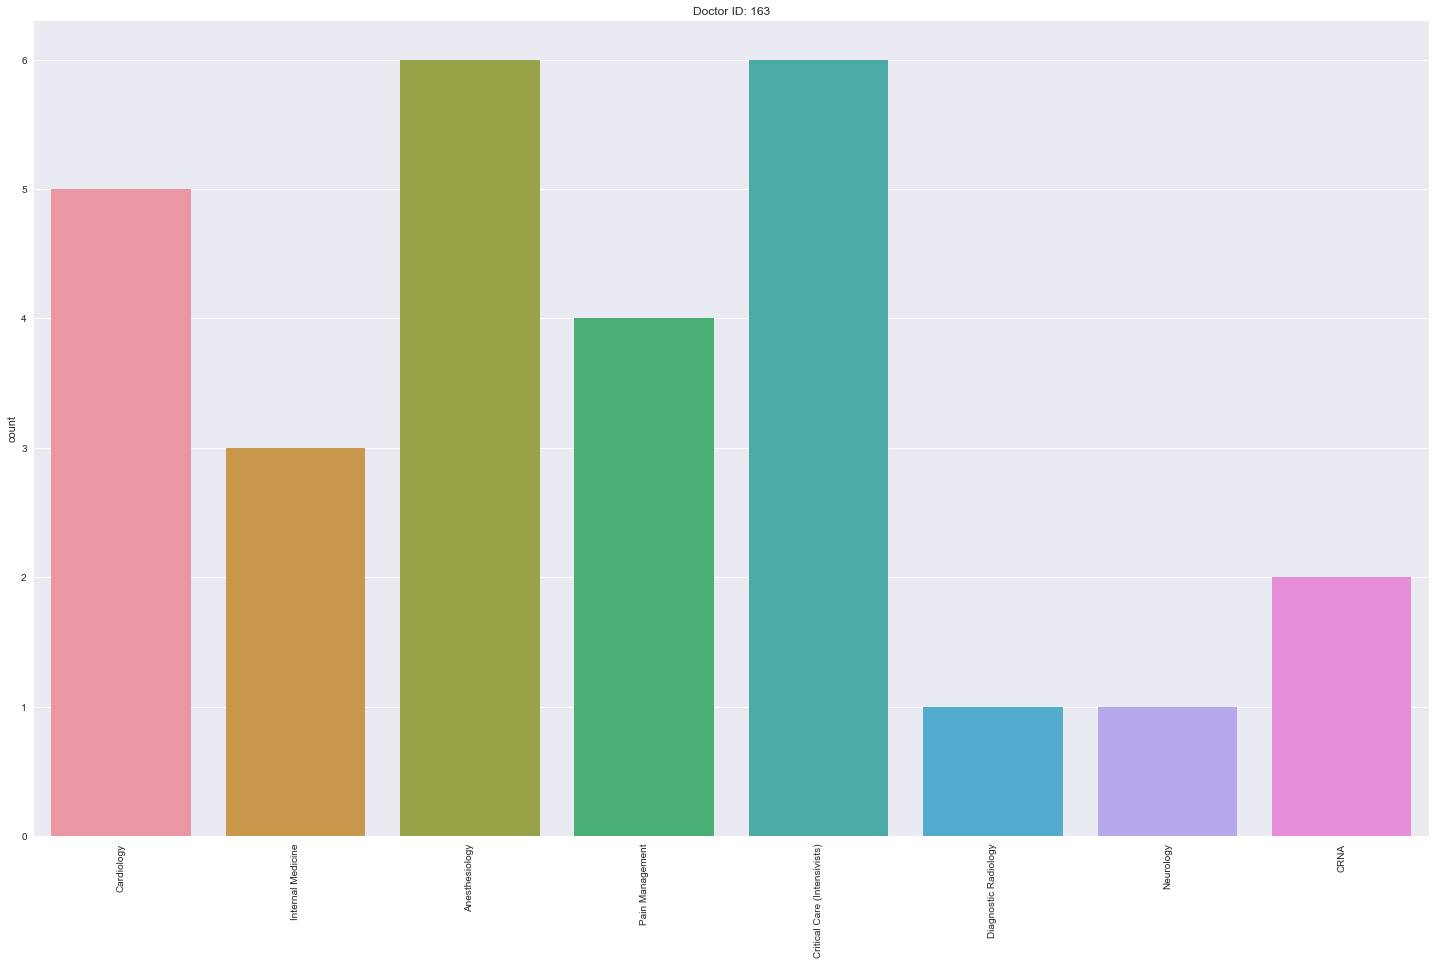

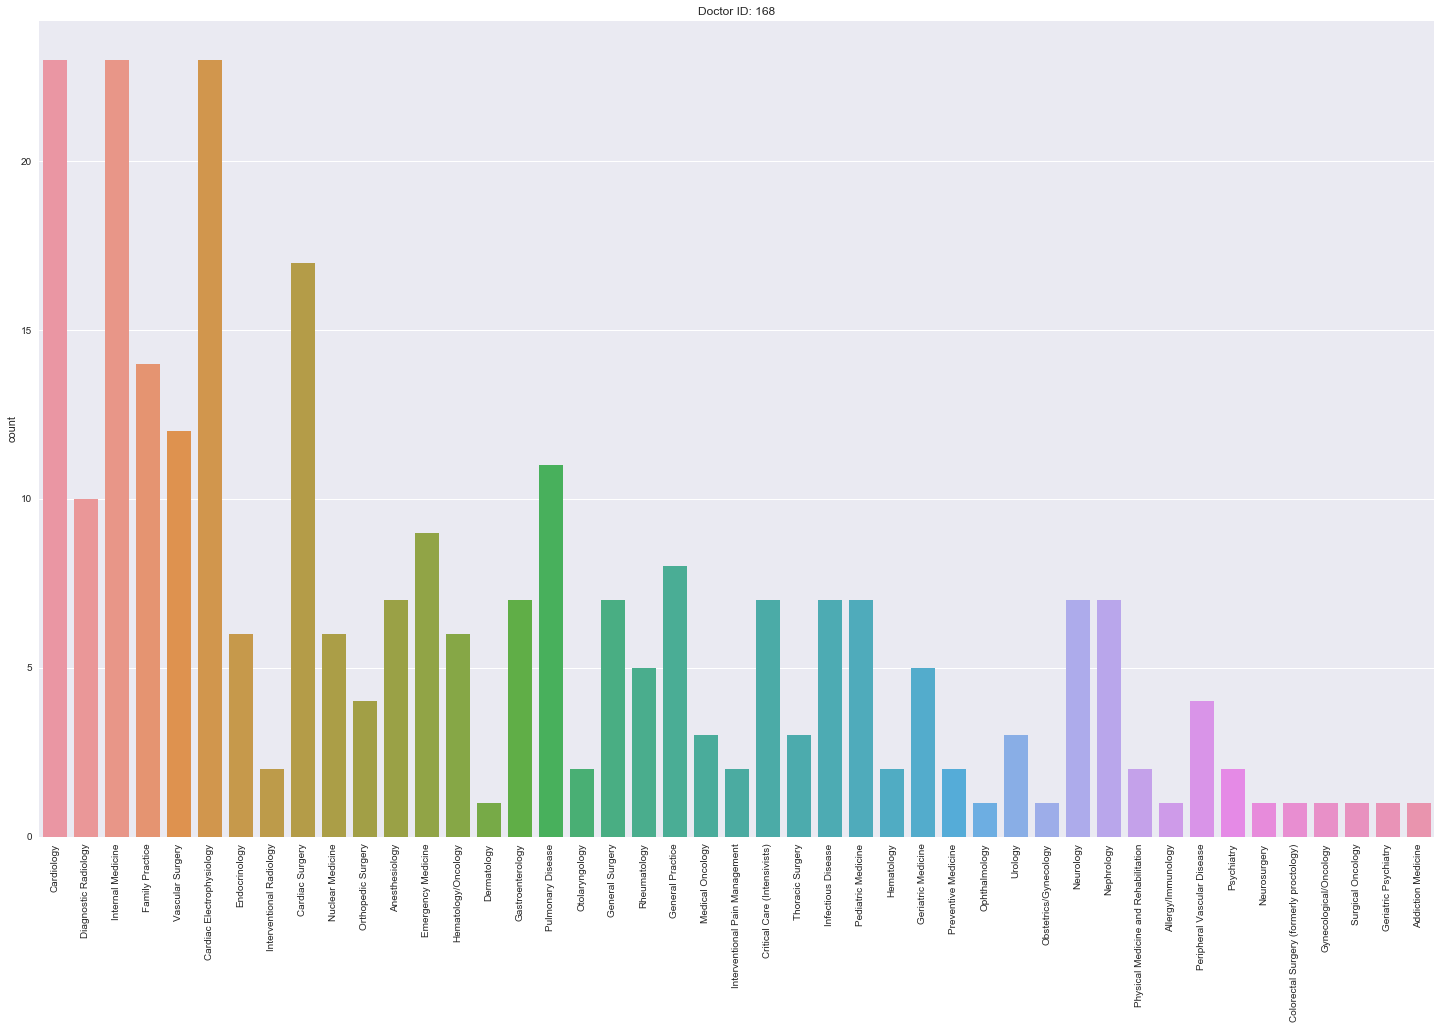

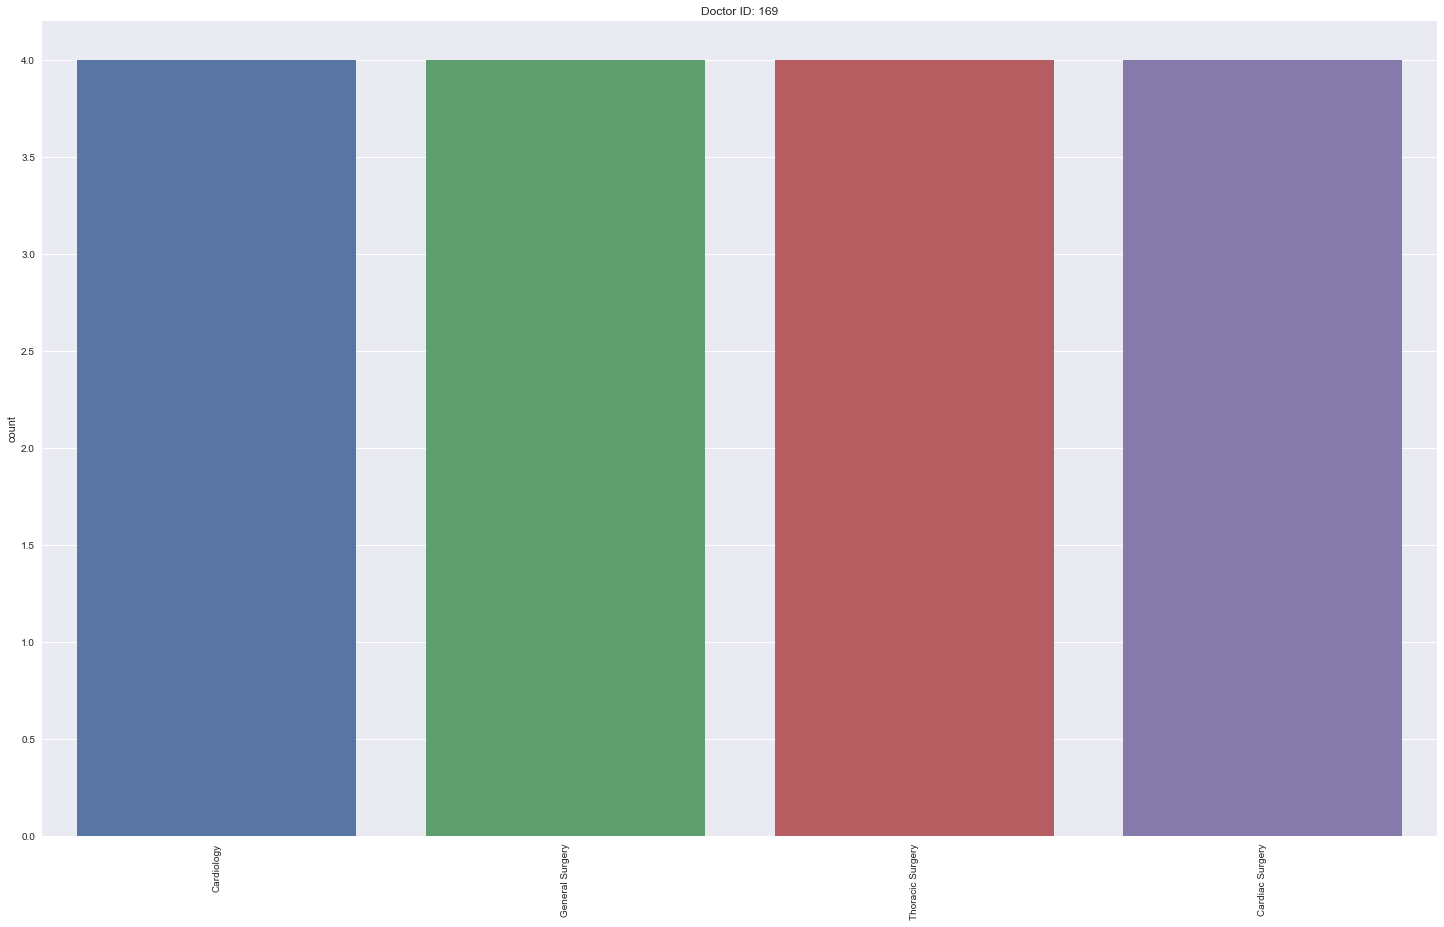

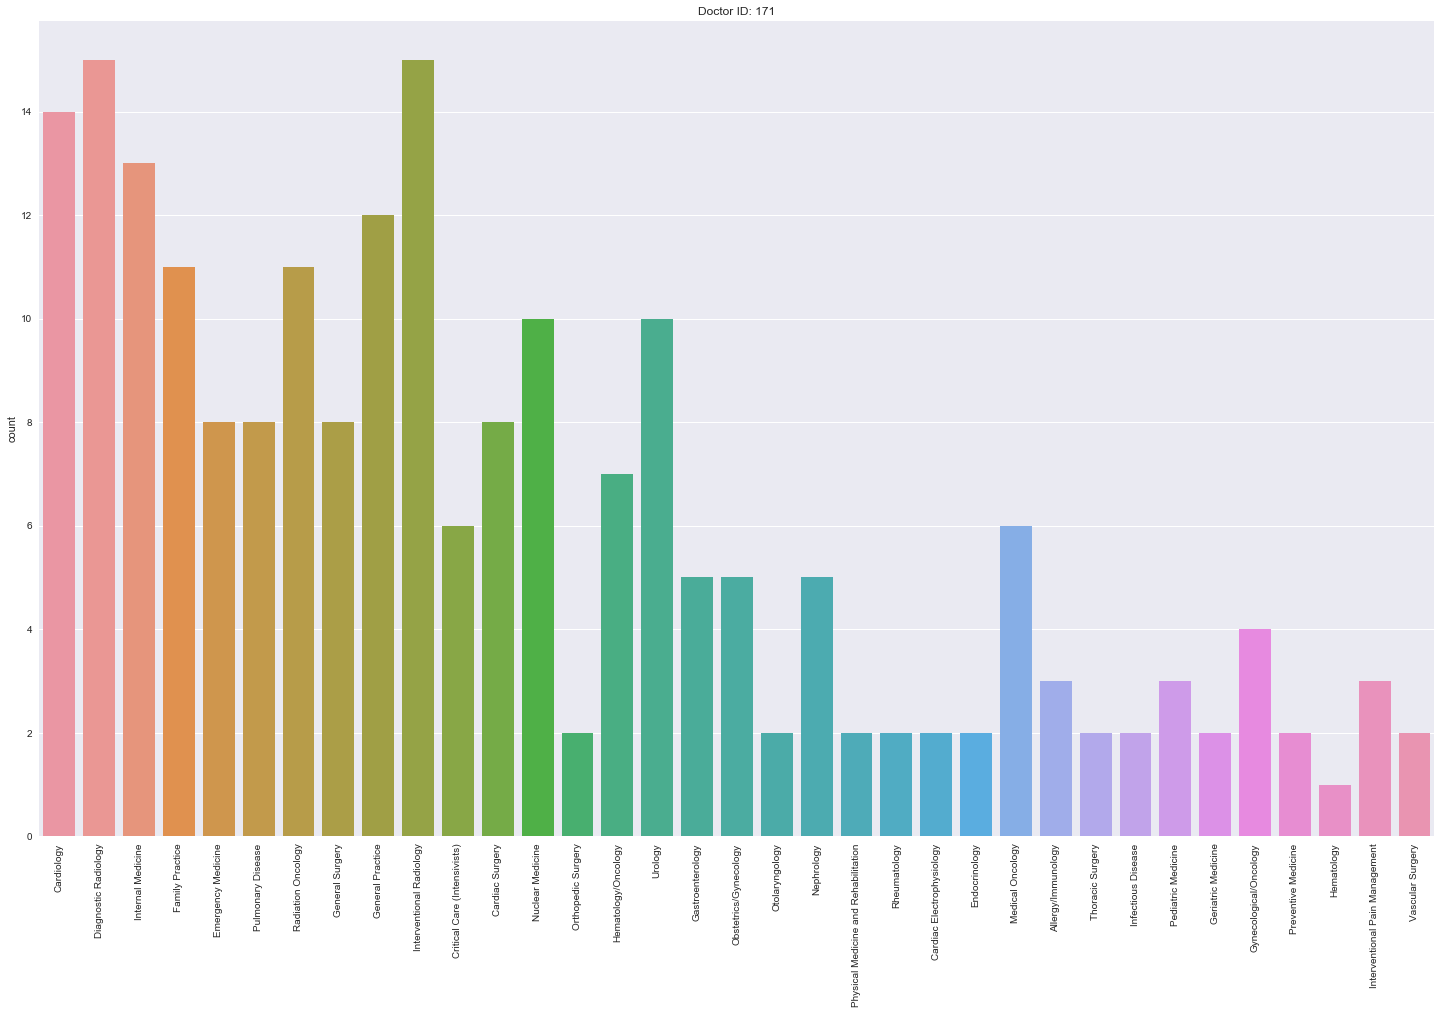

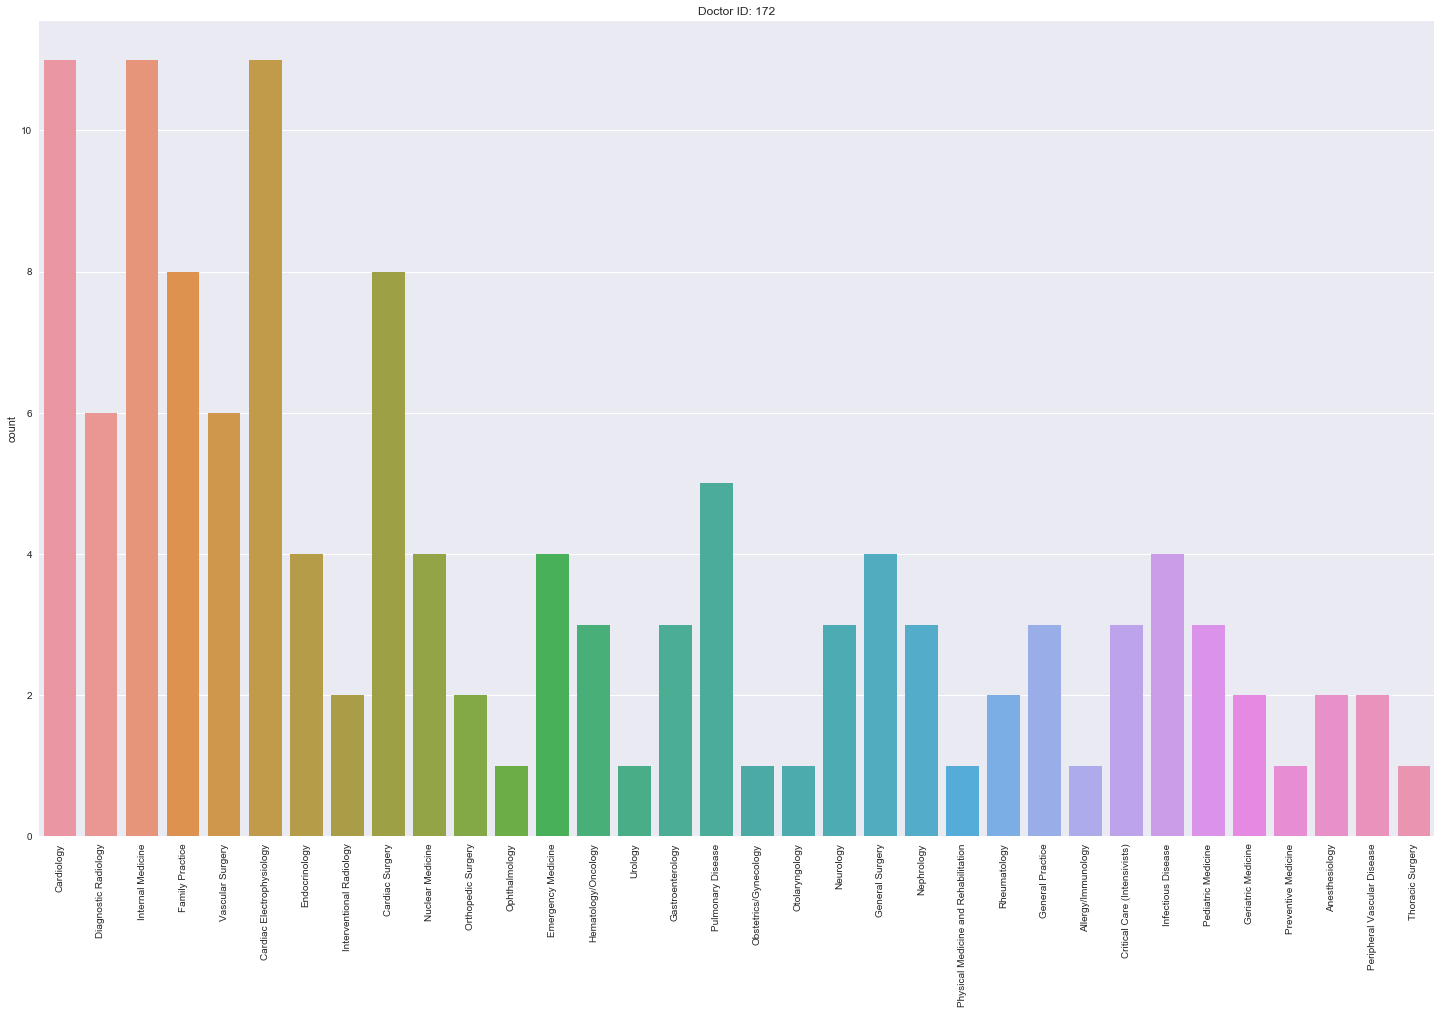

In [35]:
for key in dee.keys():
    plt.figure(figsize=(25,15))
    plt.title('Doctor ID: {}'.format(key))
    sns_plot = sns.countplot(dee[key]).get_figure()
    plt.xticks(rotation=90)
    filename= 'Doctor_ID_{}'.format(key)
    sns_plot.savefig(str(filename))
    #plt.show()

In [143]:
nx.closeness_centrality(g)['93015']

0.0

In [149]:
nx.shortest_path(g,target='93015')

{'93015': ['93015'],
 'Cardiac Electrophysiology': ['Cardiac Electrophysiology', '93015'],
 'Cardiac Surgery': ['Cardiac Surgery', '93015'],
 'Cardiology': ['Cardiology', '93015'],
 'Diagnostic Radiology': ['Diagnostic Radiology', '93015'],
 'Family Practice': ['Family Practice', '93015'],
 'Internal Medicine': ['Internal Medicine', '93015'],
 'Vascular Surgery': ['Vascular Surgery', '93015']}

In [165]:
sample_dict={'a':1, 'b':3, 'c':15}

In [166]:
sum(list(sample_dict.values()))

19

In [167]:
sample_dict['a']/sum(list(sample_dict.values()))

0.05263157894736842

In [168]:
dee

{1: ['Cardiology',
  'Diagnostic Radiology',
  'Internal Medicine',
  'Family Practice',
  'Orthopedic Surgery',
  'Anesthesiology',
  'Emergency Medicine',
  'Urology',
  'Gastroenterology',
  'Otolaryngology',
  'Neurology',
  'Radiation Oncology',
  'General Surgery',
  'Nephrology',
  'Physical Medicine and Rehabilitation',
  'Vascular Surgery',
  'Rheumatology',
  'Endocrinology',
  'General Practice',
  'Interventional Pain Management',
  'Interventional Radiology',
  'Pain Management',
  'Hand Surgery',
  'Pediatric Medicine',
  'Surgical Oncology',
  'Sports Medicine',
  'Physician Assistant',
  'Cardiology',
  'Diagnostic Radiology',
  'Internal Medicine',
  'Family Practice',
  'Orthopedic Surgery',
  'Anesthesiology',
  'Emergency Medicine',
  'Urology',
  'Gastroenterology',
  'Otolaryngology',
  'Neurology',
  'Radiation Oncology',
  'General Surgery',
  'Nephrology',
  'Physical Medicine and Rehabilitation',
  'Vascular Surgery',
  'Rheumatology',
  'Endocrinology',
  'Ge

In [211]:
all_uns = merged_not_typically_only_un.physician_id.unique()

In [213]:
len(all_uns)

10150

In [248]:
final={}
for un in all_uns:
    for proc in merged_not_typically_only_un.iloc[un]['procedure_code']:
        if un not in final.keys():
            final[un] = undirected_g.neighbors(proc)
        if un in final.keys():
            final[un] += undirected_g.neighbors(proc)

NetworkXError: The node 0 is not in the graph.

In [250]:
0 in merged_not_typically_only_un.procedure_code

True

In [249]:
merged_not_typically_only_un[merged_not_typically_only_un.procedure_code==0]

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
